In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('classic')

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 600)
# %config InlineBackend.figure_format = 'svg'
# %matplotlib inline

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import math

# Data load

## Monitoring data

### AScore

In [5]:
df = pd.read_csv("D:/Tan/3. Reports/Data/scorecard_monitoring_data.csv", low_memory = False)

In [6]:
df.head()

Application_Number Customer_Number  CMS_ACCOUNTID Current_Status  \
0       APPL00920168    CUST00900207     21936409.0            NaN   
1       APPL00920405    CUST00900444            NaN            NaN   
2       APPL00920466    CUST00900505            NaN            NaN   
3       APPL00920510    CUST00900549     21947126.0            NaN   
4       APPL00920590    CUST00900629     21947167.0            NaN   

                  Credit_card_type  Request_Limit  Approved_limit  \
0                     MORTGAGECARD            NaN      40000000.0   
1  THE VAY KHONG CHUNG TU THU NHAP            NaN             NaN   
2                         AUTOCARD            NaN             NaN   
3                         FASTCARD            NaN     100000000.0   
4  THE VAY KHONG CHUNG TU THU NHAP            NaN      15000000.0   

   Region_Code STATUS_DATE            Received_Date Received_Month  \
0            6  2022-06-06  2022-06-03 00:00:00.000        2022-06   
1            3  2022-06-03  2022-06-03 00:00:00.000        2022-06   
2            6  2022-06-03  2022-06-03 00:00:00.000        2022-06   
3            3  2022-06-04  2022-06-03 00:00:00.000        2022-06   
4            4  2022-06-06  2022-06-03 00:00:00.000        2022-06   

  AppLastStatus Card_type_group Reject_Group Reject_Group_UW Reject_Code  \
0       Approve    MORTGAGECARD          NaN             NaN         NaN   
1        Reject     ExpressCard      Scoring         Scoring          D9   
2        Cancel        AUTOCARD          NaN             NaN         NaN   
3       Approve        FASTCARD          NaN             NaN         NaN   
4       Approve     ExpressCard          NaN             NaN         NaN   

     Score_Type  Score  Ranking_Score         Score_range Scored_flag  \
0  9. CIC_SCore    1.0            NaN                 NaN      Scored   
1  1. AEX072001  695.0           11.0  682 <= Score < 704      Scored   
2  9. CIC_SCore    NaN            NaN                 NaN      Scored   
3  9. CIC_SCore    1.0            NaN                 NaN      Scored   
4  1. AEX072001  778.0           15.0  770 <= Score < 792      Scored   

    open_date WO_DATE_EOM first_txn_date_by_acct  first_txn_amount_by_acct  \
0  2022-06-06  2024-01-31             2022-06-09                 1000000.0   
1         NaN         NaN                    NaN                       NaN   
2         NaN         NaN                    NaN                       NaN   
3  2022-06-04         NaN             2022-06-09                 3000000.0   
4  2022-06-06         NaN             2022-06-08                 3000000.0   

  min_date_CIC_R18  max_MOB max_bucket_type  TARGET_1M  TARGET_1M_wCIC  \
0       2023-01-31     23.0          14. WO        0.0             0.0   
1              NaN      NaN             NaN        NaN             NaN   
2              NaN      NaN             NaN        NaN             NaN   
3              NaN     23.0         01. 1a1        0.0             0.0   
4       2023-03-31     23.0          05. 1b        0.0             0.0   

   TARGET_at1M  TARGET_at1M_wCIC  TARGET_1M_OBS  TARGET_1M_wCIC_OBS  \
0          0.0               0.0            1.0                 1.0   
1          NaN               NaN            NaN                 NaN   
2          NaN               NaN            NaN                 NaN   
3          0.0               0.0            1.0                 1.0   
4          0.0               0.0            1.0                 1.0   

    Balance_1M  TARGET_2M  TARGET_2M_wCIC  TARGET_at2M  TARGET_at2M_wCIC  \
0   39613900.0        0.0             0.0          0.0               0.0   
1          NaN        NaN             NaN          NaN               NaN   
2          NaN        NaN             NaN          NaN               NaN   
3  105500000.0        0.0             0.0          0.0               0.0   
4   15000000.0        0.0             0.0          0.0               0.0   

   TARGET_2M_OBS  TARGET_2M_wCIC_OBS   Balance_2M  

In [7]:
df.columns

Index(['Application_Number', 'Customer_Number', 'CMS_ACCOUNTID',
       'Current_Status', 'Credit_card_type', 'Request_Limit', 'Approved_limit',
       'Region_Code', 'STATUS_DATE', 'Received_Date',
       ...
       'TARGET_11M_OBS', 'TARGET_11M_wCIC_OBS', 'Balance_11M', 'TARGET_12M',
       'TARGET_12M_wCIC', 'TARGET_at12M', 'TARGET_at12M_wCIC',
       'TARGET_12M_OBS', 'TARGET_12M_wCIC_OBS', 'Balance_12M'],
      dtype='object', length=112)

In [11]:
df_check = df[df['Card_type_group'] == 'StudentsCard'].groupby(by = 'Received_Month').agg(
    MOB_3 = ('TARGET_3M_wCIC_OBS', 'sum'),
    NUM_BAD_3 = ('TARGET_3M_wCIC', 'sum'),
    
    MOB_6 = ('TARGET_6M_wCIC_OBS', 'sum'),
    NUM_BAD_6 = ('TARGET_6M_wCIC', 'sum'),

    MOB_12 = ('TARGET_12M_wCIC_OBS', 'sum'),
    NUM_BAD_12 = ('TARGET_12M_wCIC', 'sum'),
    
)

In [12]:
df_check['DR_3'] = df_check['NUM_BAD_3']/df_check['MOB_3']*100
df_check['DR_6'] = df_check['NUM_BAD_6']/df_check['MOB_6']*100
df_check['DR_12'] = df_check['NUM_BAD_12']/df_check['MOB_12']*100

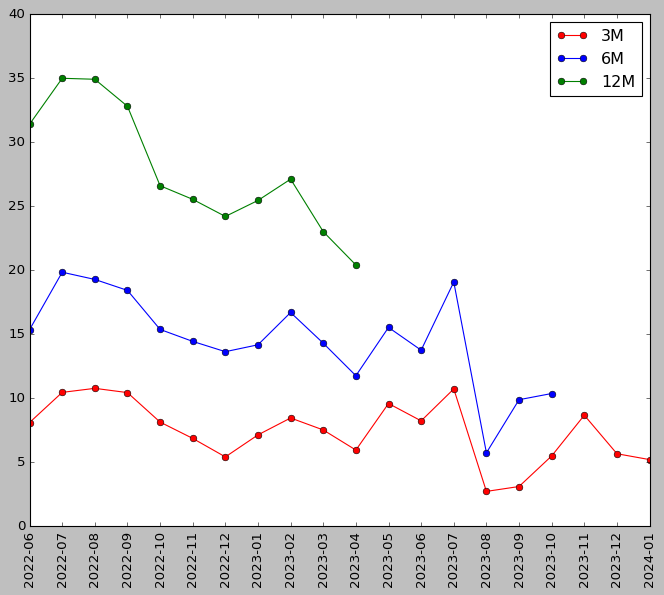

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

ax.plot(df_check['DR_3'], marker = 'o', color = 'red', label = '3M')
ax.plot(df_check['DR_6'], marker = 'o', color = 'blue', label = '6M')
ax.plot(df_check['DR_12'], marker = 'o', color = 'green', label = '12M')
ax.set_xticklabels(df_check.index.tolist(), rotation = 90)

ax_1 = ax.twinx()
ax_1.bar()

ax.legend()

### CScore_6M (Old)

In [8]:
df_cscore = pd.read_csv('D:/Tan/3. Reports/Data/cscore_monitoring_data.csv', header = None)

In [9]:
cols = [
    'ACCOUNT_NUMBER',
    'STATUS_DATE',
    'AMT_CRD_LIMIT',
    'CARD_TYPE_GROUP',
    'LEN_FIRST_TXN_DAYS',
    '[MODE(collect.MODE_PERSON_CONTACT_6)]',
    '[SUM(collect.CNT_CALL_COLLEX_3)]',
    '[SUM(payment_3.RATIO_POS_AMT_3)]',
    'MOB6_1A2_NGANHNGHE',
    'AVAILABLE_BALANCE',
    'SCR_AMT_CRD_LIMIT',
    'SCR_LEN_FIRST_TXN_DAYS',
    'SCR_MEAN_CNT_CALL_COLLEX_3',
    'SCR_MEAN_RATIO_POS_AMT_3',
    'SCR_MOB6_1A2_NGANHNGHE',
    'SCR_RATIO_AVAI_BAL_LIM',
    'SCR_CARD_TYPE_GROUP',
    'SCR_MODE_collect_MODE_PERSON_CON',
    'Score',
    'Score_range',
    'Ranking_Score',
    'Date_Score',
    'INVOICE_DATE',
    'DATE_SCORE_ACTUAL',
    
    'open_date',
    'open_month',
	'WO_DATE_EOM',
	'first_txn_date_by_acct',
    'first_txn_amount_by_acct',
    'First_transaction_date_NULL',
    'Check_trans_date',
	'min_date_CIC_R18',
    'min_MOB',
	'max_MOB',
    'Balance',
    'Flag_Outstanding',
    'bucket_type',
	'max_bucket_type',
    
    'TARGET_1M',
	'TARGET_1M_wCIC',
	'TARGET_at1M',
	'TARGET_at1M_wCIC',
	'TARGET_1M_OBS',
    'TARGET_1M_wCIC_OBS',
	'Balance_1M',
    
    'TARGET_2M',
	'TARGET_2M_wCIC',
	'TARGET_at2M',
	'TARGET_at2M_wCIC',
	'TARGET_2M_OBS',
    'TARGET_2M_wCIC_OBS',
	'Balance_2M',
    
    'TARGET_3M',
	'TARGET_3M_wCIC',
	'TARGET_at3M',
	'TARGET_at3M_wCIC',
	'TARGET_3M_OBS',
    'TARGET_3M_wCIC_OBS',
	'Balance_3M',
	
    'TARGET_4M',
	'TARGET_4M_wCIC',
	'TARGET_at4M',
	'TARGET_at4M_wCIC',
	'TARGET_4M_OBS',
	'TARGET_4M_wCIC_OBS',
	'Balance_4M',

    'TARGET_6M',
	'TARGET_6M_wCIC',
	'TARGET_at6M',
	'TARGET_at6M_wCIC',
	'TARGET_6M_OBS',
	'TARGET_6M_wCIC_OBS',
	'Balance_6M' 
]


df_cscore.columns = cols
df_cscore['Date_Score']= pd.to_datetime(df_cscore['Date_Score'])

In [10]:
df_cscore.head()

ACCOUNT_NUMBER STATUS_DATE  AMT_CRD_LIMIT CARD_TYPE_GROUP  \
0        21339127  2020-07-03      4000000.0     ExpressCard   
1        21426709  2020-09-21     19500000.0     ExpressCard   
2        21625751  2021-03-01     54500000.0     ExpressCard   
3        21633384  2021-02-19     42000000.0     ExpressCard   
4        21638839  2021-03-02     42000000.0     ExpressCard   

   LEN_FIRST_TXN_DAYS  [MODE(collect.MODE_PERSON_CONTACT_6)]  \
0                 1.0                                    NaN   
1                 5.0                                    NaN   
2                11.0                                    NaN   
3                 3.0                                    NaN   
4                 3.0                                    NaN   

   [SUM(collect.CNT_CALL_COLLEX_3)]  [SUM(payment_3.RATIO_POS_AMT_3)]  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                          0.376867   
3                               NaN                          1.148098   
4                               NaN                          0.443350   

   MOB6_1A2_NGANHNGHE  AVAILABLE_BALANCE  SCR_AMT_CRD_LIMIT  \
0                 NaN          4000000.0                122   
1                 NaN         19500000.0                103   
2                 NaN         15497042.0                103   
3                 NaN          5622482.0                103   
4                 NaN            34685.0                103   

   SCR_LEN_FIRST_TXN_DAYS  SCR_MEAN_CNT_CALL_COLLEX_3  \
0                     103                         157   
1                     111                         157   
2                     123                         157   
3                     111                         157   
4                     111                         157   

   SCR_MEAN_RATIO_POS_AMT_3  SCR_MOB6_1A2_NGANHNGHE  SCR_RATIO_AVAI_BAL_LIM  \
0                        95                     102                     237   
1                        95                     102                     237   
2                        95                     102                     108   
3                        95                     102                     108   
4                        95                     102                      75   

   SCR_CARD_TYPE_GROUP  SCR_MODE_collect_MODE_PERSON_CON  Score  \
0                   99                               115   1030   
1                   99                               115   1019   
2                   99                               115    902   
3                   99                               115    890   
4                   99                               115    857   

                       Score_range  Ranking_Score Date_Score INVOICE_DATE  \
0  1006 <= SCORECARD_POINTS < 1035             14 2023-10-31   2023-10-12   
1  1006 <= SCORECARD_POINTS < 1035             14 2023-10-31   2023-10-12   
2    890 <= SCORECARD_POINTS < 919             10 2023-10-31   2023-10-12   
3    890 <= SCORECARD_POINTS < 919             10 2023-10-31   2023-10-12   
4    832 <= SCORECARD_POINTS < 861              8 2023-10-31   2023-10-12   

  DATE_SCORE_ACTUAL   open_date  open_month WO_DATE_EOM  \
0        2023-10-12  2020-07-03      202007         NaN   
1        2023-10-12  2020-09-21      202009         NaN   
2        2023-10-12  2021-03-01      202103         NaN   
3        2023-10-12  2021-02-19      202102         NaN   
4        2023-10-12  2021-03-02      202103         NaN   

  first_txn_date_by_acct  first_txn_amount_by_acct  \
0             2020-07-05                 3000000.0   
1             2020-09-26                 3000000.0   
2             2021-03-12                 3000000.0   
3             2021-02-22                 3000000.0   
4             2021-03-06                 3000000.0   

   First_transaction_date_NULL  Check_trans_date mi

### CScore122023 (New)

In [11]:
df_cscore122023 = pd.read_csv('D:/Tan/3. Reports/Data/cscore122023_monitoring_data.csv')

In [12]:
df_cscore122023['DATE_30D_PLUS']= pd.to_datetime(df_cscore122023['DATE_30D_PLUS'])

In [13]:
df_cscore122023.head()

APPLICATION_NUMBER  account_number    account_id DATE_30D_PLUS  \
0       APPL00881565        21892324  700001900504    2023-10-15   
1       APPL00859200        21869923  700001881675    2023-10-15   
2       APPL00897554        21913261  700001917399    2023-10-15   
3       APPL00846313        21856351  700001868028    2023-10-15   
4       APPL00841493        21857836  700001864005    2023-10-15   

  DATE_30D_PLUS_MONTH   open_date RECOVERY_DATE  RECOVERY_PERIOD  \
0             2023-10  2022-03-25           NaN              NaN   
1             2023-10  2022-01-20    2023-10-19              4.0   
2             2023-10  2022-04-27           NaN              NaN   
3             2023-10  2021-12-27    2023-10-16              1.0   
4             2023-10  2021-12-17    2023-10-18              3.0   

   flag_recovery_bf_wo FIRST_DATE_GET_TO_1B  NR_OF_DAYS_GET_TO_1B WO_DATE_EOM  \
0                  NaN           2023-12-26                  72.0         NaN   
1                  1.0                  NaN                   NaN         NaN   
2                  NaN           2023-12-26                  72.0         NaN   
3                  1.0                  NaN                   NaN         NaN   
4                  1.0                  NaN                   NaN         NaN   

   max_DOB MIN_BUCKET_TYPE  TARGET_30D  TARGET_AT_30D  Balance_30D  \
0       75     02. GROUP 2         1.0              1          NaN   
1       75     01. GROUP 1         0.0              1   15029081.0   
2       75     02. GROUP 2         1.0              1          NaN   
3       75     01. GROUP 1         0.0              1   18998539.0   
4       75     01. GROUP 1         0.0              1   15520414.0   

   TARGET_60D  TARGET_AT_60D  Balance_60D  TARGET_75D  TARGET_AT_75D  \
0         1.0              1          NaN         1.0              1   
1         0.0              1   15029081.0         0.0              1   
2         1.0              1          NaN         1.0              1   
3         0.0              1   18998539.0         0.0              1   
4         0.0              1   15520414.0         0.0              1   

   Balance_75D  TARGET_30D_OBS  TARGET_60D_OBS  TARGET_75D_OBS  \
0          NaN               1               1               1   
1   15029081.0               1               1               1   
2          NaN               1               1               1   
3   18998539.0               1               1               1   
4   15520414.0               1               1               1   

  COMB_DSLP_CNTNBD3M  DAYS_SINCE_LAST_PAYMENT  CNT_NOBODY_3M  \
0                3#2                     61.0             24   
1                3#3                     58.0             50   
2                2#2                     52.0             22   
3                3#3                     60.0             31   
4                1#2                     25.0             22   

   MEAN_PAYMENT_OVER_OUTSTANDING_PRINCIPAL_6M  MAX_CIC_DEBT_GROUP  \
0                                      0.0645                   1   
1                                      0.0662                   1   
2                                      0.0545                   2   
3                                      0.2021                   2   
4                                      0.0547                   1   

   RATIO_LOST_CONTACT_TOTAL_CALL_1M  \
0                            0.9200   
1                            0.6774   
2                            0.8889   
3                            0.7500   
4                            0.8636   

   RATIO_MAIN_CONTACT_OVER_CONNECTED_CALL_1M Company_type  \
0                                        0.5          PSU   
1                                        0.3    LTDLIAPRT   
2                                        0.0          PSU   
3                                        0.0    LTDLIAPRT   
4                                        0.0    LTDLIAPRT   

   NR_OF_DAYS_FROM_LAST_PAID_MAD_DATE  \
0  

### Score range

In [14]:
def add_period(received_month, add):
    received_month_split = received_month.split('-')
    fund = int(received_month_split[0]) * 12 + int(received_month_split[1]) + add
    if fund % 12 < 10:
        return str(fund // 12) + '-0' + str(fund % 12)
    else:
        return str(fund // 12) + '-' + str(fund % 12)

In [15]:
monitoring_period = '2024-04'

In [16]:
add_period(monitoring_period, -3)

'2024-01'

In [17]:
add_period(monitoring_period, -5)

'2023-11'

In [18]:
risk_7_score_range = pd.read_csv("D:/Tan/3. Reports/Data/Risk_7_Score_Range.csv", low_memory = False)

In [19]:
risk_7_score_range

Score_range  Ranking_Score   So_Acc  So_GOOD   So_BAD  \
0               Score < 484              1       10        1        9   
1        484 <= Score < 506              2       37        4       33   
2        506 <= Score < 528              3       97       19       78   
3        528 <= Score < 550              4      225       41      184   
4        550 <= Score < 572              5      476       97      379   
5        572 <= Score < 594              6      934      216      718   
6        594 <= Score < 616              7     1445      439     1006   
7        616 <= Score < 638              8     2034      753     1281   
8        638 <= Score < 660              9     2751     1203     1548   
9        660 <= Score < 682             10     3112     1542     1570   
10       682 <= Score < 704             11     3657     2106     1551   
11       704 <= Score < 726             12     3768     2384     1384   
12       726 <= Score < 748             13     3690     2615     1075   
13       748 <= Score < 770             14     3612     2773      839   
14       770 <= Score < 792             15     3034     2515      519   
15       792 <= Score < 814             16     2397     2083      314   
16       814 <= Score < 836             17     1502     1378      124   
17       836 <= Score < 858             18      859      802       57   
18       858 <= Score < 880             19      359      349       10   
19              Score >=880             20      127      125        2   
20       440 <= Score < 461              1        1        0        1   
21       461 <= Score < 482              2        5        2        3   
22       482 <= Score < 503              3        5        5        0   
23       503 <= Score < 524              4       34       28        6   
24       524 <= Score < 545              5      100       65       35   
25       545 <= Score < 566              6      230      178       52   
26       566 <= Score < 587              7      476      398       78   
27       587 <= Score < 608              8     1029      877      152   
28       608 <= Score < 629              9     2069     1825      244   
29       629 <= Score < 650             10     4472     4075      397   
30       650 <= Score < 671             11     6123     5664      459   
31       671 <= Score < 692             12     5181     4841      340   
32       692 <= Score < 713             13     3636     3435      201   
33       713 <= Score < 734             14     3019     2893      126   
34       734 <= Score < 755             15     2692     2598       94   
35       755 <= Score < 776             16     1983     1929       54   
36       776 <= Score < 797             17     1093     1074       19   
37       797 <= Score < 818             18      325      322        3   
38       818 <= Score < 839             19       37       36        1   
39       839 <= Score < 860             20        1        1        0   
40              Score < 588              1      732      180      552   
41       588 <= Score < 603              2      669      201      468   
42       603 <= Score < 617              3     1080      390      690   
43       617 <= Score < 632              4     1701      663     1038   
44       632 <= Score < 647              5     2374      982     1392   
45       647 <= Score < 662              6     3173     1489     1684   
46       662 <= Score < 676              7     3610     1815     1795   
47       676 <= Score < 691              8     4418     2507     1911   
48       691 <= Score < 706              9     4734     2867     1867   
49       706 <= Score < 721             10     5094     3312     1782   
50       721 <= Score < 735             11     4737     3268     1469   
51       735 <= Score < 750             12     4970     3677     1293   
52       750 <= Score < 765             13     4770     3639     1131   
53       765 <= Score < 779             14     3996     3200      796   
5

# List of production scorecards

In [20]:
def prepare_df(df,
               index = ['Received_Month', 'Score_Type', 'Card_type_group'],
               include_NS = False):
    
    if include_NS == False:
        pvt = pd.pivot_table(df[
            ~((df['Score_Type'] == '10. No Score') 
            & (df['Reject_Group_UW'] == 'Appraisal Rejected')
             )
        ], index = index, values='Application_Number', aggfunc='count').reset_index().rename(columns={'Application_Number':'Count'})
    elif include_NS == True:
        pvt = pd.pivot_table(df, 
                             index = index, values='Application_Number', aggfunc='count').reset_index().rename(columns={'Application_Number':'Count'})

    
    monthly_counts = pd.pivot_table(pvt, index='Received_Month', values='Count', aggfunc='sum').reset_index().rename(columns={'Count':'Monthly count'})
    monthly_shares = pvt.merge(monthly_counts, how='left', on='Received_Month')

    monthly_shares['Monthly share'] = round(monthly_shares['Count'] / monthly_shares['Monthly count'] * 100, 2)
    return(monthly_shares)

In [21]:
from itertools import islice, cycle

In [22]:
def plot_distribution(monthly_shares,
               index = 'Received_Month',
               columns = 'Score_Type',
               values = 'Count'):
    
    base = pd.pivot_table(monthly_shares, 
                          index = index, 
                          columns = columns, 
                          values = values, 
                          aggfunc = 'sum')
    base = base.round(2)
    base.plot(kind = 'area',
            color = list(islice(cycle([
            'darkcyan',
            'darkslategray',
            'slategray',
            'wheat',
            'midnightblue',
            'plum',
            'seagreen',
            'indianred',
            'darkorange',
            'rebeccapurple'
            ]), None, len(base.columns))),
              figsize = (15, 8)
             )

    plt.ylabel('Counts of obs', fontsize = 10)
    
    if values == 'Monthly share':
        plt.ylim((0,100))
        plt.ylabel('Share of obs', fontsize = 10)
    
    plt.legend(loc='upper right', 
               bbox_to_anchor=[1.2, 1.015],
               fontsize = 10)

    plt.show()

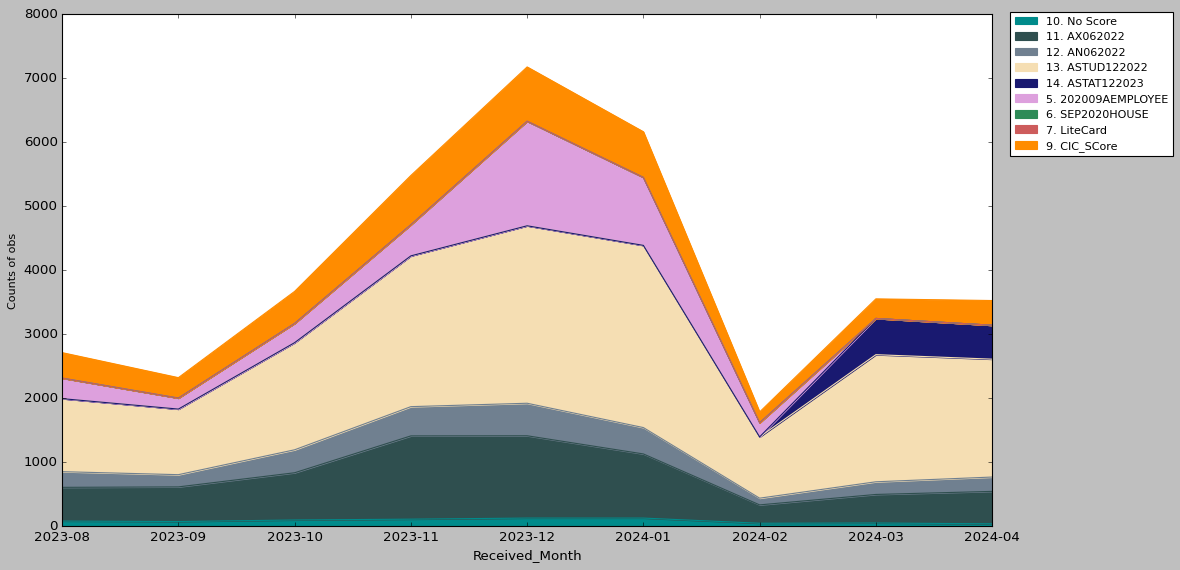

In [23]:

monthly_shares = prepare_df(df[(df['Score_Type'] != '1. AEX072001')
                              &(df['Score_Type'] != '2. AEN072001')
                              &(df['Score_Type'] != '3. ASX072001')
                              &(df['Score_Type'] != '4. ASN072001')
                              &(df['Received_Month'] >= '2023-08')],
                            index = ['Received_Month', 'Score_Type', 'Card_type_group'],
                            include_NS = False)

plot_distribution(monthly_shares,
            values = 'Count')


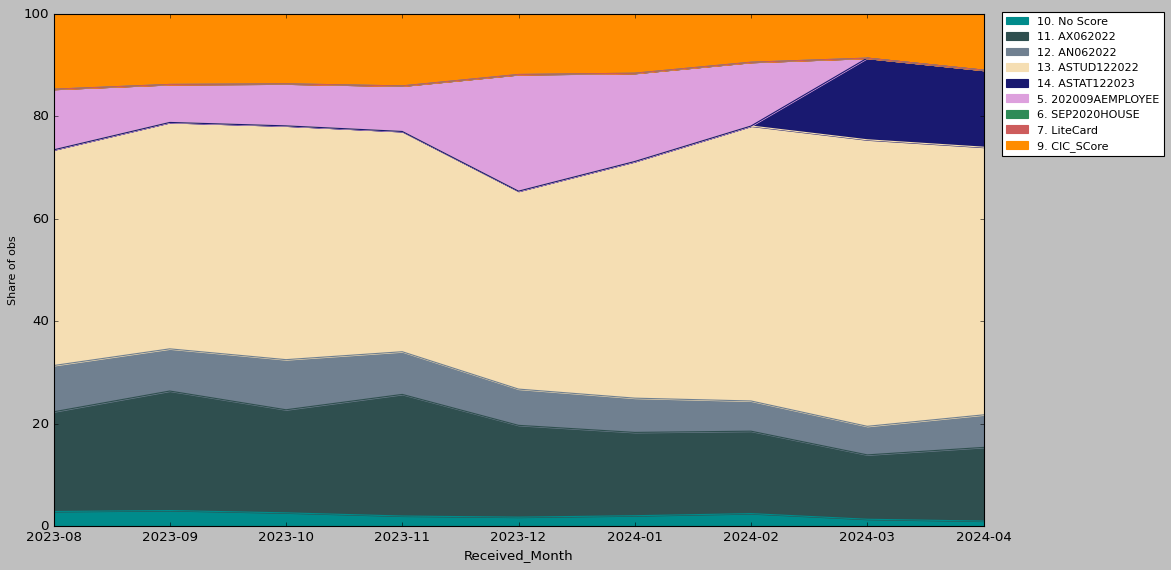

In [24]:

plot_distribution(monthly_shares,
            values = 'Monthly share')


In [25]:
pd.pivot_table(monthly_shares[(monthly_shares['Received_Month'] >= '2023-08')
                             &(monthly_shares['Received_Month'] <= '2024-04')], 
               index = 'Received_Month',
               columns = 'Score_Type',
               values = 'Count', 
               aggfunc = 'sum',
               margins = True).round(2)

Score_Type      10. No Score  11. AX062022  12. AN062022  13. ASTUD122022  \
Received_Month                                                              
2023-08                 77.0         527.0         245.0           1141.0   
2023-09                 70.0         541.0         191.0           1025.0   
2023-10                 94.0         738.0         359.0           1674.0   
2023-11                107.0        1301.0         457.0           2356.0   
2023-12                124.0        1286.0         508.0           2773.0   
2024-01                124.0        1002.0         412.0           2847.0   
2024-02                 43.0         287.0         105.0            957.0   
2024-03                 47.0         446.0         198.0           1986.0   
2024-04                 34.0         507.0         224.0           1842.0   
All                    720.0        6635.0        2699.0          16601.0   

Score_Type      14. ASTAT122023  5. 202009AEMPLOYEE  6. SEP2020HOUSE  \
Received_Month                                                         
2023-08                     NaN               321.0              NaN   
2023-09                     NaN               172.0              NaN   
2023-10                     NaN               301.0              NaN   
2023-11                     NaN               487.0              NaN   
2023-12                     NaN              1634.0              NaN   
2024-01                     NaN              1061.0              1.0   
2024-02                     NaN               222.0              NaN   
2024-03                   566.0                 NaN              NaN   
2024-04                   530.0                 NaN              NaN   
All                      1096.0              4198.0              1.0   

Score_Type      7. LiteCard  9. CIC_SCore    All  
Received_Month                                    
2023-08                 NaN         398.0   2709  
2023-09                 NaN         319.0   2318  
2023-10                 NaN         500.0   3666  
2023-11                 NaN         769.0   5477  
2023-12                 1.0         847.0   7173  
2024-01                 NaN         713.0   6160  
2024-02                 NaN         168.0   1782  
2024-03                 NaN         306.0   3549  
2024-04                 NaN         386.0   3523  
All                     1.0        4406.0  36357

In [26]:
pd.pivot_table(monthly_shares[(monthly_shares['Received_Month'] >= '2023-08')
                             &(monthly_shares['Received_Month'] <= '2024-04')], 
               index = 'Received_Month',
               columns = 'Score_Type',
               values = 'Monthly share', 
               aggfunc = 'sum').round(2)

Score_Type      10. No Score  11. AX062022  12. AN062022  13. ASTUD122022  \
Received_Month                                                              
2023-08                 2.84         19.46          9.04            42.12   
2023-09                 3.02         23.34          8.24            44.22   
2023-10                 2.57         20.13          9.79            45.66   
2023-11                 1.95         23.75          8.34            43.02   
2023-12                 1.73         17.93          7.08            38.66   
2024-01                 2.01         16.27          6.69            46.22   
2024-02                 2.42         16.10          5.90            53.70   
2024-03                 1.32         12.57          5.58            55.96   
2024-04                 0.96         14.39          6.36            52.28   

Score_Type      14. ASTAT122023  5. 202009AEMPLOYEE  6. SEP2020HOUSE  \
Received_Month                                                         
2023-08                     NaN               11.85              NaN   
2023-09                     NaN                7.42              NaN   
2023-10                     NaN                8.21              NaN   
2023-11                     NaN                8.89              NaN   
2023-12                     NaN               22.78              NaN   
2024-01                     NaN               17.22             0.02   
2024-02                     NaN               12.46              NaN   
2024-03                   15.95                 NaN              NaN   
2024-04                   15.04                 NaN              NaN   

Score_Type      7. LiteCard  9. CIC_SCore  
Received_Month                             
2023-08                 NaN         14.69  
2023-09                 NaN         13.77  
2023-10                 NaN         13.63  
2023-11                 NaN         14.04  
2023-12                0.01         11.80  
2024-01                 NaN         11.57  
2024-02                 NaN          9.43  
2024-03                 NaN          8.62  
2024-04                 NaN         10.95

In [27]:
def plot_bar(monthly_shares, 
             time_col = 'Received_Month',
             criteria = 'AppLastStatus',
             values = 'Count'):
    def addlabels(x, y1, y2, y3, y4):
        if len(y4) != 0:
            for i in range(len(x)):
                plt.text(i, y1[i]//2, y1[i], ha = 'center', fontsize = 10)
                plt.text(i, y1[i] + y2[i]//2, y2[i], ha = 'center', fontsize = 10)
                plt.text(i, y1[i] + y2[i] + y3[i]//2, y3[i], ha = 'center', fontsize = 10)
                plt.text(i, y1[i] + y2[i] + y3[i] + y4[i]//2, y4[i], ha = 'center', fontsize = 10)
        else:
            for i in range(len(x)):
                plt.text(i, y1[i]//2, y1[i], ha = 'center', fontsize = 10)
                plt.text(i, y1[i] + y2[i]//2, y2[i], ha = 'center', fontsize = 10)
                plt.text(i, y1[i] + y2[i] + y3[i]//2, y3[i], ha = 'center', fontsize = 10)
        
    plt.figure(figsize = (13, 8.3))
    dist = monthly_shares[criteria].unique()
    
    x = monthly_shares[time_col].unique()
    y1 = monthly_shares.loc[monthly_shares[criteria] == dist[0], values].values
    y2 = monthly_shares.loc[monthly_shares[criteria] == dist[1], values].values
    y3 = monthly_shares.loc[monthly_shares[criteria] == dist[2], values].values
    
    plt.bar(x, y1, label = dist[0], alpha = 0.8, color = 'mediumseagreen',)
    plt.bar(x, y2, bottom = y1, label = dist[1], alpha = 0.8, color = 'lightslategray',)
    plt.bar(x, y3, bottom = y1 + y2, label = dist[2], alpha = 0.8, color = 'mediumturquoise',)

    
    if criteria != 'Reject_Group_UW':
        y4 = monthly_shares.loc[monthly_shares[criteria] == dist[3], values].values
        plt.bar(x, y4, bottom = y1 + y2 + y3, label = dist[3], alpha = 0.8, color = 'rosybrown' )
    else:
        y4 = []
    
    plt.legend(loc='lower center', 
               bbox_to_anchor=[0.5, -0.3],
               ncol=4,
               fontsize = 12)
    if values == 'Monthly share':
        plt.ylabel('Share of obs')
        plt.ylim((0,110))
    elif values == 'Count':
        plt.ylabel('Counts of obs')
    
    plt.xlabel('Month')
    plt.xticks(rotation = 90)
    addlabels(x, y1, y2, y3, y4)

        
    plt.show()

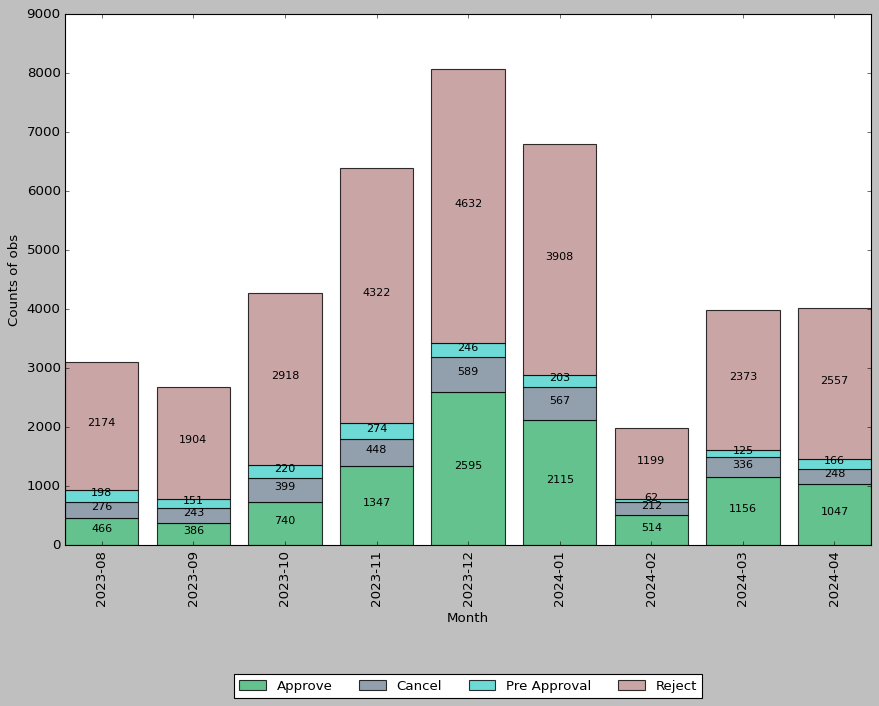

In [28]:

monthly_shares = prepare_df(df[(df['Score_Type'] != '1. AEX072001')
                              &(df['Score_Type'] != '2. AEN072001')
                              &(df['Score_Type'] != '3. ASX072001')
                              &(df['Score_Type'] != '4. ASN072001')
                              &(df['Received_Month'] >= '2023-08')],
                            index = ['Received_Month', 'AppLastStatus'],
                            include_NS = True)

plot_bar(monthly_shares,
         time_col = 'Received_Month',
         criteria = 'AppLastStatus',
         values = 'Count')


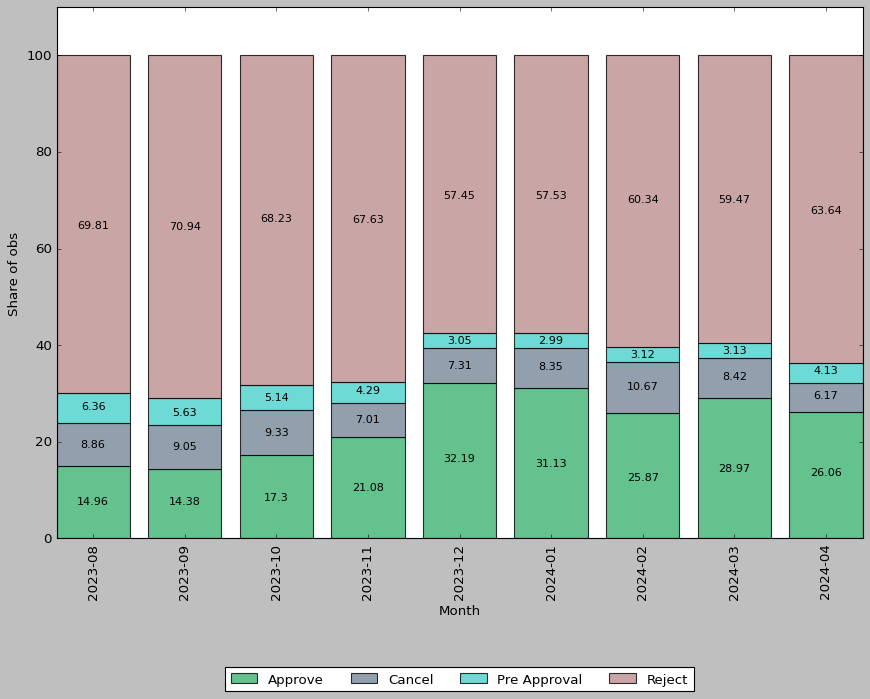

In [29]:

plot_bar(monthly_shares,
         time_col = 'Received_Month',
         criteria = 'AppLastStatus',
         values = 'Monthly share')


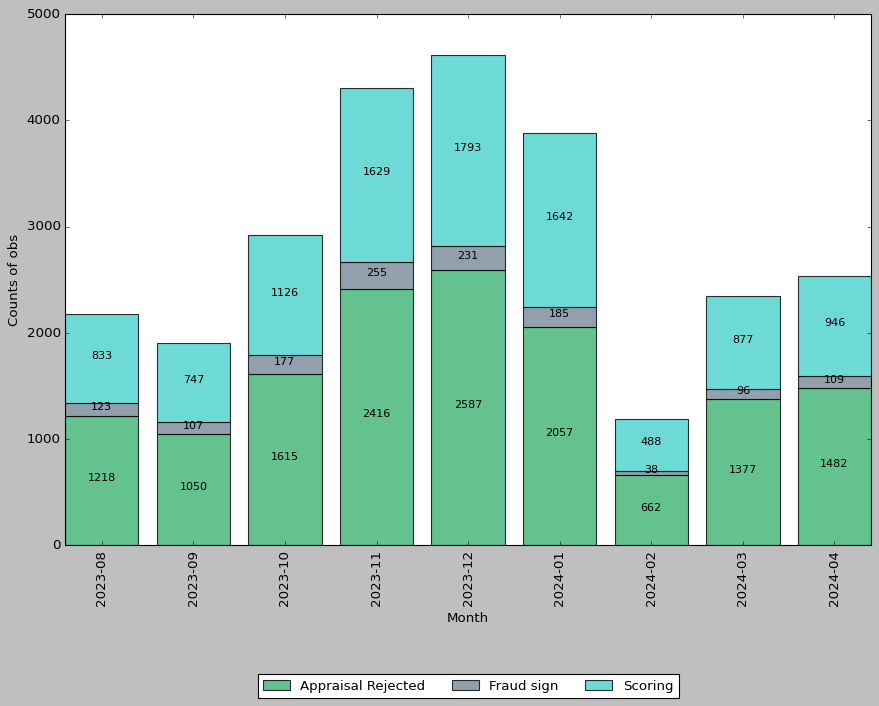

In [30]:

monthly_shares = prepare_df(df[(df['Score_Type'] != '1. AEX072001')
                              &(df['Score_Type'] != '2. AEN072001')
                              &(df['Score_Type'] != '3. ASX072001')
                              &(df['Score_Type'] != '4. ASN072001')
                              &(df['Received_Month'] >= '2023-08')],
                            index = ['Received_Month', 'Reject_Group_UW'],
                            include_NS = True)

plot_bar(monthly_shares,
         time_col = 'Received_Month',
         criteria = 'Reject_Group_UW',
         values = 'Count')


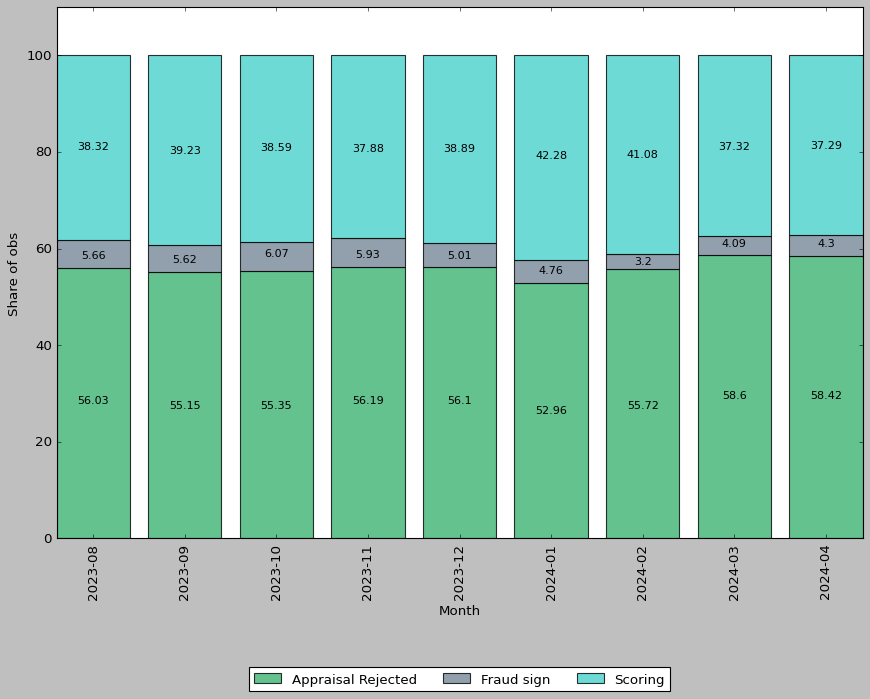

In [31]:

plot_bar(monthly_shares,
         time_col = 'Received_Month',
         criteria = 'Reject_Group_UW',
         values = 'Monthly share')


# KRI threshold definition

In [32]:
KS_threshold = 18.0
PSI_threshold = 0.25

# Class definition

attributes:
scorecard name <- 
score type filter <- 
product_segments <- NULLable
scoring script data set filepath
score column name

methods:
stability_check 
performance_check
mismatch_rate_check


-------
summary dataset -> KRI evaluation

In [33]:
class ScoreMonitoringSegment:
    def __init__(self, name, score_type_filter, product_segment, sc_script_data_path, sc_script_score_colname, warnings):
        self.name = name
        self.score_type_filter = score_type_filter
        self.product_segment = product_segment
        self.sc_script_data_path = sc_script_data_path
        self.sc_script_score_colname = sc_script_score_colname
        self.warnings = warnings
        
    def performance_check_table(self, targets, product=None):
        
        def mean_cust(x):
            try:
                return x.mean()
            except:
                return float('nan')
        
        def gini_calc(true_labels, predicted_prob, obs_flag):
            from sklearn.metrics import roc_auc_score

            frame = {'true':true_labels, 'pred':predicted_prob, 'obs':obs_flag}
            df = pd.DataFrame(frame)
            df = df[df['obs'] == 1]

            if (len(df) > 0) and (df['true'].nunique() > 1):
                return (2*roc_auc_score(df['true'], df['pred'])-1) * 100
            else:
                return float('nan')

        def ks_calc(true_labels, predicted_prob, obs_flag):
            from scipy.stats import ks_2samp

            frame = {'true':true_labels, 'pred':predicted_prob, 'obs':obs_flag}
            df = pd.DataFrame(frame)
            df = df[df['obs'] == 1]

            if (len(df) > 0) and (df['true'].nunique() > 1):
                return ks_2samp(df.loc[df['true']==0, 'pred'], df.loc[df['true']==1, 'pred']).statistic * 100
            else:
                return float('nan')
        
        if product is None:
            df_calc = df[df['Score_Type'] == self.score_type_filter]
        else:
            df_calc = df[
                (df['Score_Type'] == self.score_type_filter)
                & (df['Card_type_group'] == product)
            ]
            
        pvt_tb = df_calc.groupby('Received_Month').agg(
            count = ('Application_Number', 'count'),
            mean = ('Score', mean_cust),
        )
        pvt_tb.loc['All'] = [df_calc['Application_Number'].count(), mean_cust(df['Score'])]
            
        for target in targets:
            pvt_tb_gini = df_calc.groupby('Received_Month').agg(
                target_obs_sum = (target[1], 'sum'),
                target_sum = (target[0], 'sum')
            )
            pvt_tb_gini.columns = [target[1], target[0]]
            pvt_tb_gini.loc['All'] = pvt_tb_gini.sum(axis=0)

            pvt_tb_gini['Gini '+target[0]] = df_calc.groupby('Received_Month').apply(lambda x: gini_calc(x[target[0]], x['Score'], x[target[1]]))
            gini_total = gini_calc(df_calc[target[0]], df_calc['Score'], df_calc[target[1]])
            if gini_total < 0:
                pvt_tb_gini['Gini '+target[0]] = - pvt_tb_gini['Gini '+target[0]]
            pvt_tb_gini['KS '+target[0]] = df_calc.groupby('Received_Month').apply(lambda x: ks_calc(x[target[0]], x['Score'], x[target[1]]))

            pvt_tb = pvt_tb.join(pvt_tb_gini, how='left')
            pvt_tb.loc['All', 'Gini '+target[0]] = abs(gini_total)
            pvt_tb.loc['All', 'KS '+target[0]] = ks_calc(df_calc[target[0]], df_calc['Score'], df_calc[target[1]])
            
        return pvt_tb
    
    def performance_check_visualize(self, targets, product=None):
        import matplotlib.pyplot as plt
        import math
        
        tbl_perf = self.performance_check_table(targets, product)
        tbl = tbl_perf[tbl_perf.index != 'All']
        
        if tbl_perf.loc[tbl_perf.index == 'All', [tar[0] for tar in targets]].sum().sum() > 0.0:

            ind = range(len(tbl.index.tolist()))

            #define subplots
            plt.style.use('classic')
            fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
            ax[0].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
            ax[0].set_xticks(ind)
            ax[0].set_xticklabels(tbl.index.tolist(), rotation = 45)
            ax[0].set_xlabel('Month', fontsize=14)
            ax[0].set_ylabel('Counts of obs.', fontsize=14)
            if product is None:
                ax[0].set_title('Gini performance' + ' - ' + self.name)
            else:
                ax[0].set_title('Gini performance' + ' - ' + self.name + ' - ' + product)

            ax0_twinx = ax[0].twinx()
            
            blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
            for tar in enumerate(targets):
                clr = blues[tar[0]%len(blues)]
                ax0_twinx.plot(ind, tbl['Gini ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])
                
            ax0_twinx.axhline(y=25.0, color='black', linestyle='--')
            ax0_twinx.set_ylabel('Gini (%)', fontsize=14)
            gini_max = tbl.loc[:, ['Gini '+tar[0] for tar in targets]].max().max()
            gini_min = tbl.loc[:, ['Gini '+tar[0] for tar in targets]].min().min()
            ax0_twinx.set_ylim([min(0, math.floor(gini_max/10)*10), math.ceil(gini_max/10)*10])
            ax0_twinx.legend(prop={'size': 8})

            ax[1].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
            ax[1].set_xticks(ind)
            ax[1].set_xticklabels(tbl.index.tolist(), rotation = 45)
            ax[1].set_xlabel('Month', fontsize=14)
            ax[1].set_ylabel('Counts of obs. / defaults', fontsize=14)
            if product is None:
                ax[1].set_title('KS performance' + ' - ' + self.name)
            else:
                ax[1].set_title('KS performance' + ' - ' + self.name + ' - ' + product)

            ax1_twinx = ax[1].twinx()
            
            blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
            for tar in enumerate(targets):
                clr = blues[tar[0]%len(blues)]
                ax1_twinx.plot(ind, tbl['KS ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])
                
            ax1_twinx.axhline(y=18.0, color='black', linestyle='--')
            ax1_twinx.set_ylabel('KS (%)', fontsize=14)
            ks_max = tbl.loc[:, ['KS '+tar[0] for tar in targets]].max().max()
            ax1_twinx.set_ylim([0, math.ceil(ks_max/10)*10])
            ax1_twinx.legend(prop={'size': 8})
            plt.show()
        else:
            print('No data to display!')
            
    def KS_last_three_months(self, target, product=None):
        
        def ks_calc(true_labels, predicted_prob, obs_flag):
            from scipy.stats import ks_2samp

            frame = {'true':true_labels, 'pred':predicted_prob, 'obs':obs_flag}
            df = pd.DataFrame(frame)
            df = df[df['obs'] == 1]

            if (len(df) > 0) and (df['true'].nunique() > 1):
                return ks_2samp(df.loc[df['true']==0, 'pred'], df.loc[df['true']==1, 'pred']).statistic * 100
            else:
                return float('nan')
        
        if product is None:
            df_calc = df[df['Score_Type'] == self.score_type_filter]
        else:
            df_calc = df[
                (df['Score_Type'] == self.score_type_filter)
                & (df['Card_type_group'] == product)
                & (df['Received_Month'] >= add_period(monitoring_period, -5))
            ]
        
        return ks_calc(df_calc[target[0]], df_calc['Score'], df_calc[target[1]])

    def stability_score_table(self, product=None):
        def mr(x):
            return x.isnull().sum() / len(x)

        def mean_cust(x):
            try:
                return x.mean()
            except:
                return float('nan')
            
        def psi(expected_perc, actual_perc):
            def sub_psi(e_perc, a_perc):
                '''Calculate the actual PSI value from comparing the values.
                   Update the actual value to a very small number if equal to zero
                '''
                if a_perc == 0:
                    a_perc = 0.0001
                if e_perc == 0:
                    e_perc = 0.0001

                value = (e_perc - a_perc) * np.log(e_perc / a_perc)
                return(value)

            frame = { 'expected': expected_perc, 'actual': actual_perc }
            df = pd.DataFrame(frame)
            frame['psi'] = df.apply(lambda x: sub_psi(x.expected, x.actual), axis=1)
            psi_value = frame['psi'].sum()

            return(psi_value)
            
        if product is None:
            df_calc = df[df['Score_Type'] == self.score_type_filter]
        else:
            df_calc = df[
                (df['Score_Type'] == self.score_type_filter)
                & (df['Card_type_group'] == product)
            ]

        pvt_tb_basic = df_calc.groupby('Received_Month').agg(
            count = ('Score', 'size'),
            mean = ('Score', mean_cust),
            mr = ('Score', mr)
        )
          
        breakpoints = risk_7_score_range[
            risk_7_score_range['Score_Type'] == self.score_type_filter
        ]['range_min']
        breakpoints_cleaned = [float('-inf')] + [x for x in breakpoints if ~np.isnan(x)] + [float('inf')]
        cols = ['(' + str(breakpoints_cleaned[i]) + ', ' + str(breakpoints_cleaned[i+1]) + ']' for i in range(len(breakpoints_cleaned)-1)]

        expected = risk_7_score_range[
            risk_7_score_range['Score_Type'] ==  self.score_type_filter
        ]['So_Acc']

        expected_perc = expected / expected.sum()
        expected_perc
        expected_perc.index = cols

        df_calc_sc = df_calc[['Application_Number', 'Received_Month', 'Score']].copy()
        df_calc_sc['score_bin'] = pd.cut(df_calc_sc['Score'], breakpoints_cleaned, include_lowest=True, duplicates='drop')

        pvt_tb_psi = pd.pivot_table(df_calc_sc, index = 'Received_Month', columns = 'score_bin', values = 'Application_Number', aggfunc = 'count')
        pvt_tb_psi.columns = [str(col) for col in pvt_tb_psi.columns]
        pvt_tb_psi = pd.concat([pd.DataFrame(columns=cols), pvt_tb_psi]).fillna(0)

        pvt_tb_psi = pvt_tb_psi.div(pvt_tb_psi.sum(axis='columns'), axis='rows')
        pvt_tb_psi['PSI'] = pvt_tb_psi.apply(lambda x: psi(expected_perc, x), axis=1)

        result = pvt_tb_basic.join(pvt_tb_psi, how='left')

        return result
    
    def stability_score_visualize(self, product=None):
        import matplotlib.pyplot as plt
        import math
        
        stab_summary_tbl = self.stability_score_table(product)
        ind = range(len(stab_summary_tbl.index.tolist()))

        #define subplots
        plt.style.use('classic')
        fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

        ax[0].plot(ind, stab_summary_tbl['mean'], color='steelblue', marker='o', linewidth=2)
        ax[0].set_xticks(ind)
        ax[0].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
        ax[0].set_xlabel('Month', fontsize=14)
        ax[0].set_ylabel('Mean', color='steelblue', fontsize=14)
        if product is None:
            ax[0].set_title('Score mean and MR' + ' - ' + self.name)
        else:
            ax[0].set_title('Score mean and MR' + ' - ' + self.name + ' - ' + product)

        ax0_twinx = ax[0].twinx()
        ax0_twinx.plot(ind, stab_summary_tbl['mr'], color='red', marker='o', linewidth=2)
        ax0_twinx.set_ylabel('MR', color='red', fontsize=14)
        ax0_twinx.set_ylim([0,1])

        ax[1].bar(ind, tbl['count'], color='peachpuff', width=0.4)
        ax[1].set_xticks(ind)
        ax[1].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
        ax[1].set_xlabel('Month', fontsize=14)
        ax[1].set_ylabel('Counts of obs.', color='black', fontsize=14)
        
        ax1_twinx = ax[1].twinx()
        ax1_twinx.plot(ind, stab_summary_tbl['PSI'], color='black', marker='o', linewidth=2)
        # ax1_twinx.set_ylim([0,1])
        ax1_twinx.axhline(y = 0.1, color = 'darkorange', linestyle = 'dashed')
        ax1_twinx.axhline(y = 0.25, color = 'r', linestyle = 'dashed')
        ax1_twinx.legend(['PSI'], prop={'size': 8})
        if product is None:
            ax[1].set_title('Score PSI' + ' - ' + self.name)
        else:
            ax[1].set_title('Score PSI' + ' - ' + self.name + ' - ' + product)
                                  
        plt.show()
        
    def ar_score_rejection_table(self, product=None):
        if product is None:
            df_calc = df[df['Score_Type'] == self.score_type_filter].copy()
        else:
            df_calc = df[
                (df['Score_Type'] == self.score_type_filter)
                & (df['Card_type_group'] == product)
            ].copy()
        
        df_calc['FLAG_APPROVED'] = np.where(df_calc['AppLastStatus'] == 'Approve', 1, 0)
        df_calc['FLAG_SCORE_REJ'] = np.where(df_calc['Reject_Group'] == 'Scoring', 1, 0)
        
        pvt = df_calc.groupby('Received_Month').agg(
            Count = ('Application_Number', 'count'),
            Count_approved = ('FLAG_APPROVED', 'sum'),
            Count_score_rej = ('FLAG_SCORE_REJ', 'sum'),
            TARGET_3M_OBS = ('TARGET_3M_OBS', 'sum'),
            TARGET_3M_wCIC_OBS = ('TARGET_3M_wCIC_OBS', 'sum'),
            TARGET_3M_wCIC = ('TARGET_3M_wCIC', 'sum'),
            TARGET_3M = ('TARGET_3M', 'sum'),
            TARGET_at3M = ('TARGET_at3M', 'sum'),
            TARGET_2M_OBS = ('TARGET_2M_OBS', 'sum'),
            TARGET_2M_wCIC_OBS = ('TARGET_2M_wCIC_OBS', 'sum'),
            TARGET_2M_wCIC = ('TARGET_2M_wCIC', 'sum'),
            TARGET_2M = ('TARGET_2M', 'sum'),
            TARGET_at2M = ('TARGET_at2M', 'sum')
        )

        pvt['AR'] = pvt['Count_approved'] / pvt['Count'] * 100
        pvt['SCORE_REJECT'] = pvt['Count_score_rej'] / pvt['Count'] * 100

        pvt['DR_TARGET_3M_wCIC'] = pvt['TARGET_3M_wCIC'] / pvt['TARGET_3M_wCIC_OBS'] * 100
        pvt['DR_TARGET_3M'] = pvt['TARGET_3M'] / pvt['TARGET_3M_OBS'] * 100
        pvt['DR_TARGET_at3M'] = pvt['TARGET_at3M'] / pvt['TARGET_3M_OBS'] * 100
        pvt['DR_TARGET_2M_wCIC'] = pvt['TARGET_2M_wCIC'] / pvt['TARGET_2M_wCIC_OBS'] * 100
        pvt['DR_TARGET_2M'] = pvt['TARGET_2M'] / pvt['TARGET_2M_OBS'] * 100
        pvt['DR_TARGET_at2M'] = pvt['TARGET_at2M'] / pvt['TARGET_2M_OBS'] * 100
    
        return pvt
    
    def ar_score_rejection_visualize(self, product=None):
        import matplotlib.pyplot as plt
        import math
        
        ar_summary_tbl = self.ar_score_rejection_table(product)
        ind = range(len(ar_summary_tbl.index.tolist()))
        
        plt.style.use('classic')
        fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

        ax.bar(ind, ar_summary_tbl['Count'], color='peachpuff', width=0.6)
        ax.set_xticks(ind)
        ax.set_xticklabels(ar_summary_tbl.index.tolist(), rotation = 45)
        ax.set_xlabel('Month', fontsize=14)
        ax.set_ylabel('Counts of obs.', fontsize=16)

        ax0_twinx = ax.twinx()
        ax0_twinx.plot(ind, ar_summary_tbl['AR'], color='red', marker='o', linewidth=2, label='Approval rate (%)')
        ax0_twinx.plot(ind, ar_summary_tbl['SCORE_REJECT'], color='darkred', marker='o', linewidth=2, label='Score rejection rate (%)')
        ax0_twinx.plot(ind, ar_summary_tbl['DR_TARGET_at3M'], color='lightsteelblue', marker='o', linewidth=2, label='TARGET_at3M')
        ax0_twinx.plot(ind, ar_summary_tbl['DR_TARGET_3M'], color='cornflowerblue', marker='o', linewidth=2, label='TARGET_3M')
        ax0_twinx.plot(ind, ar_summary_tbl['DR_TARGET_3M_wCIC'], color='royalblue', marker='o', linewidth=2, label='TARGET_3M_wCIC')
        ax0_twinx.set_ylabel('Rate(%)', fontsize=16)
        val_max = ar_summary_tbl[['AR', 'SCORE_REJECT', 'DR_TARGET_at3M', 'DR_TARGET_3M', 'DR_TARGET_3M_wCIC']].max().max()
        ax0_twinx.set_ylim([0, math.ceil(val_max/10)*10])
        ax0_twinx.legend(bbox_to_anchor=(1.3, 1.00))
        plt.show()
        
    def mismatch_rate_table(self, product=None):
        if product is None:
            df_calc = df[df['Score_Type'] == self.score_type_filter].copy()
        else:
            df_calc = df[
                (df['Score_Type'] == self.score_type_filter)
                & (df['Card_type_group'] == product)
            ].copy()
        
        
        df_sc_cript = pd.read_csv(self.sc_script_data_path, low_memory = False, nrows = 100)
        if df_sc_cript.shape[1] == 1:
            df_sc_cript = pd.read_csv(self.sc_script_data_path, low_memory = False, sep = '\t')
        else:
            df_sc_cript = pd.read_csv(self.sc_script_data_path, low_memory = False)
        

        
        df_calc = df_calc.merge(df_sc_cript[['Application_Number', self.sc_script_score_colname]], how='left', on='Application_Number')
        df_calc = df_calc[df_calc['Score'] > 1]
        
        df_calc['FLAG_APPROVED'] = np.where(df_calc['AppLastStatus'] == 'Approve', 1, 0)
        df_calc['FLAG_SCORE_REJ'] = np.where(df_calc['Reject_Group'] == 'Scoring', 1, 0)
        df_calc['SCORE_PROD_DIFF'] = abs(df_calc['Score'] - df_calc[self.sc_script_score_colname])
        df_calc['FLAG_MISMATCH'] = np.where(df_calc['SCORE_PROD_DIFF'] > 0, 1, 0)
        
        pvt = df_calc.groupby('Received_Month').agg(
            Count = ('Application_Number', 'count'),
            
            Count_approved = ('FLAG_APPROVED', 'sum'),
            Count_score_rej = ('FLAG_SCORE_REJ', 'sum'),

            Mean_score_uw = ('Score', 'mean'),
            Mean_score_manual = (self.sc_script_score_colname, 'mean'),
            Mean_mismatch = ('SCORE_PROD_DIFF', 'mean'),

            
            Count_mismatch = ('FLAG_MISMATCH', 'sum')
        )
        
        pvt['Mismatch_rate'] = pvt['Count_mismatch'] / pvt['Count'] * 100
        
        return pvt
    
    def mismatch_rate_visualize(self, product=None):
        import matplotlib.pyplot as plt
        import math
        
        mr_tbl = self.mismatch_rate_table(product)
        ind = range(len(mr_tbl.index.tolist()))
        
        plt.style.use('classic')
        fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(30,8))

        ax[0].bar(ind, mr_tbl['Count'], color='peachpuff', width=0.6)
        ax[0].set_xticks(ind)
        ax[0].set_xticklabels(mr_tbl.index.tolist(), rotation = 45)
        ax[0].set_xlabel('Month', fontsize=14)
        ax[0].set_ylabel('Counts of obs.', fontsize=16)

        ax0_twinx = ax[0].twinx()
        ax0_twinx.plot(ind, mr_tbl['Mismatch_rate'], color='red', marker='o', linewidth=2, label='Mismatch rate (%)')
        ax0_twinx.axhline(y = 10, color = 'r', linestyle = 'dashed')
        ax0_twinx.set_ylabel('Rate(%)', fontsize=16)
        ax0_twinx.set_ylim([0, 100])
        ax0_twinx.legend(bbox_to_anchor=(1.3, 1.00))

        ax[1].plot(ind, mr_tbl['Mean_mismatch'], color = 'red', marker = 'o', linewidth=2, label='Mean diff')
        ax[1].set_xticklabels(mr_tbl.index.tolist(), rotation = 45)
        ax[1].set_ylabel('Points', fontsize=16)
        ax[1].legend(bbox_to_anchor=(1.3, 1.00))

        ax1_twinx = ax[1].twinx()
        ax1_twinx.plot(mr_tbl['Mean_score_uw'], color='blue', linewidth=2, linestyle = 'dashed', label='Mean_score_uw')
        ax1_twinx.plot(mr_tbl['Mean_score_manual'], color='orange', linewidth=2, linestyle = 'dashed', label='Mean_score_manual')
        ax1_twinx.set_ylabel('Points', fontsize=16)
        ax1_twinx.legend(bbox_to_anchor=(1.3, 1.00))

        
        plt.show()
        

In [34]:
score_monitoring_segments = []

In [35]:
targets = [('TARGET_3M_wCIC', 'TARGET_3M_wCIC_OBS'), ('TARGET_6M_wCIC', 'TARGET_6M_wCIC_OBS'), ('TARGET_12M_wCIC', 'TARGET_12M_wCIC_OBS')]
kri_target = ('TARGET_3M_wCIC', 'TARGET_3M_wCIC_OBS')

# Scorecard metrics evaluation

## CScore_6M

#### Performance check (KRI1)

In [36]:
df_calc = df_cscore[(df_cscore['bucket_type'] == '01. 1a1')
                    & (~df_cscore['first_txn_date_by_acct'].isnull())
                    # & (df_cscore['Date_Score'] <= '2023-11-30')
                    & (df_cscore['min_date_CIC_R18'].isnull() | (df_cscore['min_date_CIC_R18'] > df_cscore['Date_Score']
                                                                ))]

In [37]:
df_calc['Date_Score'].max()

Timestamp('2024-04-30 00:00:00')

In [38]:
def mean_cust(x):
    try:
        return x.mean()
    except:
        return float('nan')

def gini_calc(true_labels, predicted_prob, obs_flag):
    from sklearn.metrics import roc_auc_score

    frame = {'true':true_labels, 'pred':predicted_prob, 'obs':obs_flag}
    df = pd.DataFrame(frame)
    df = df[df['obs'] == 1]

    if (len(df) > 0) and (df['true'].nunique() > 1):
        return (2*roc_auc_score(df['true'], df['pred'])-1) * 100
    else:
        return float('nan')

def ks_calc(true_labels, predicted_prob, obs_flag):
    from scipy.stats import ks_2samp

    frame = {'true':true_labels, 'pred':predicted_prob, 'obs':obs_flag}
    df = pd.DataFrame(frame)
    df = df[df['obs'] == 1]

    if (len(df) > 0) and (df['true'].nunique() > 1):
        return ks_2samp(df.loc[df['true']==0, 'pred'], df.loc[df['true']==1, 'pred']).statistic * 100
    else:
        return float('nan')



pvt_tb = df_calc.groupby('Date_Score').agg(
    count = ('ACCOUNT_NUMBER', 'count'),
    mean = ('Score', mean_cust),
)
pvt_tb.loc['All'] = [df_calc['ACCOUNT_NUMBER'].count(), mean_cust(df_calc['Score'])]

for target in [('TARGET_3M_wCIC', 'TARGET_3M_OBS')]:
    pvt_tb_gini = df_calc.groupby('Date_Score').agg(
        target_obs_sum = (target[1], 'sum'),
        target_sum = (target[0], 'sum')
    )
    pvt_tb_gini.columns = [target[1], target[0]]
    pvt_tb_gini.loc['All'] = pvt_tb_gini.sum(axis=0)

    pvt_tb_gini['Gini '+target[0]] = df_calc.groupby('Date_Score').apply(lambda x: gini_calc(x[target[0]], x['Score'], x[target[1]]))
    gini_total = gini_calc(df_calc[target[0]], df_calc['Score'], df_calc[target[1]])
    if gini_total < 0:
        pvt_tb_gini['Gini '+target[0]] = - pvt_tb_gini['Gini '+target[0]]
    pvt_tb_gini['KS '+target[0]] = df_calc.groupby('Date_Score').apply(lambda x: ks_calc(x[target[0]], x['Score'], x[target[1]]))

    pvt_tb = pvt_tb.join(pvt_tb_gini, how='left')
    pvt_tb.loc['All', 'Gini '+target[0]] = abs(gini_total)
    pvt_tb.loc['All', 'KS '+target[0]] = ks_calc(df_calc[target[0]], df_calc['Score'], df_calc[target[1]])

In [39]:
pvt_tb

count        mean  TARGET_3M_OBS  TARGET_3M_wCIC  \
Date_Score                                                                  
2023-07-31 00:00:00   168924.0  941.919775         163658           11455   
2023-08-31 00:00:00   162049.0  947.146363         157059           10118   
2023-09-30 00:00:00   161418.0  952.320212         156596            9237   
2023-10-31 00:00:00   158964.0  954.156941         154281            8321   
2023-11-30 00:00:00   156658.0  956.765413         153074            8034   
2023-12-31 00:00:00   154586.0  957.737499         150683            7516   
2024-01-31 00:00:00   153920.0  961.208284         149847            7530   
2024-02-29 00:00:00   116250.0  960.720292              0            3883   
2024-03-31 00:00:00   144758.0  963.845059              0            2897   
2024-04-30 00:00:00   112267.0  967.566970              0             460   
All                  1489794.0  955.646222        1085198           69451   

                     Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  
Date_Score                                                   
2023-07-31 00:00:00            45.332033          33.919755  
2023-08-31 00:00:00            50.551907          37.423877  
2023-09-30 00:00:00            53.128491          39.657759  
2023-10-31 00:00:00            54.595091          41.151862  
2023-11-30 00:00:00            56.180078          42.062143  
2023-12-31 00:00:00            55.987450          42.471836  
2024-01-31 00:00:00            55.939895          42.100530  
2024-02-29 00:00:00                  NaN                NaN  
2024-03-31 00:00:00                  NaN                NaN  
2024-04-30 00:00:00                  NaN                NaN  
All                            53.063573          39.804168

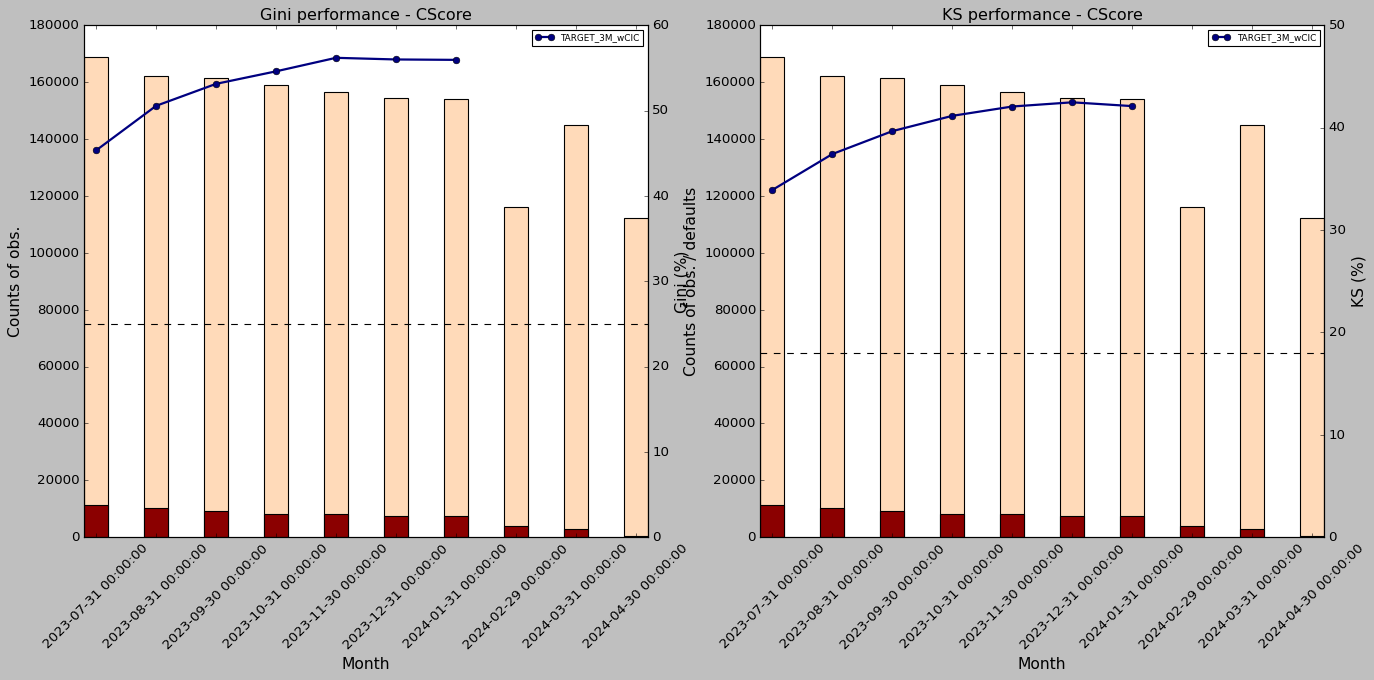

In [40]:
tbl = pvt_tb[pvt_tb.index != 'All']

if pvt_tb.loc[pvt_tb.index == 'All', [tar[0] for tar in targets[0:1]]].sum().sum() > 0.0:

    ind = range(len(tbl.index.tolist()))

    #define subplots
    plt.style.use('classic')
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    ax[0].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
    ax[0].bar(ind, tbl[tbl.columns[3]], color='darkred', width=0.4)
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(tbl.index.tolist(), rotation = 45)
    ax[0].set_xlabel('Month', fontsize=14)
    ax[0].set_ylabel('Counts of obs.', fontsize=14)

    ax[0].set_title('Gini performance' + ' - ' + 'CScore')

    ax0_twinx = ax[0].twinx()

    blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
    for tar in enumerate(targets[0:1]):
        clr = blues[tar[0]%len(blues)]
        ax0_twinx.plot(ind, tbl['Gini ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])

    ax0_twinx.axhline(y=25.0, color='black', linestyle='--')
    ax0_twinx.set_ylabel('Gini (%)', fontsize=14)
    gini_max = tbl.loc[:, ['Gini '+tar[0] for tar in targets[0:1]]].max().max()
    gini_min = tbl.loc[:, ['Gini '+tar[0] for tar in targets[0:1]]].min().min()
    ax0_twinx.set_ylim([min(0, math.floor(gini_max/10)*10), math.ceil(gini_max/10)*10])
    ax0_twinx.legend(prop={'size': 8})

    ax[1].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
    ax[1].bar(ind, tbl[tbl.columns[3]], color='darkred', width=0.4)
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(tbl.index.tolist(), rotation = 45)
    ax[1].set_xlabel('Month', fontsize=14)
    ax[1].set_ylabel('Counts of obs. / defaults', fontsize=14)
    ax[1].set_title('KS performance' + ' - ' + 'CScore')

    ax1_twinx = ax[1].twinx()

    blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
    for tar in enumerate(targets[0:1]):
        clr = blues[tar[0]%len(blues)]
        ax1_twinx.plot(ind, tbl['KS ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])

    ax1_twinx.axhline(y=18.0, color='black', linestyle='--')
    ax1_twinx.set_ylabel('KS (%)', fontsize=14)
    ks_max = tbl.loc[:, ['KS '+tar[0] for tar in targets[0:1]]].max().max()
    ax1_twinx.set_ylim([0, math.ceil(ks_max/10)*10])
    ax1_twinx.legend(prop={'size': 8})
    plt.show()

#### Stability check (KRI2)

In [41]:

def mr(x):
    return x.isnull().sum() / len(x)

def mean_cust(x):
    try:
        return x.mean()
    except:
        return float('nan')

def psi(expected_perc, actual_perc):
    def sub_psi(e_perc, a_perc):
        '''Calculate the actual PSI value from comparing the values.
           Update the actual value to a very small number if equal to zero
        '''
        if a_perc == 0:
            a_perc = 0.0001
        if e_perc == 0:
            e_perc = 0.0001

        value = (e_perc - a_perc) * np.log(e_perc / a_perc)
        return(value)

    frame = { 'expected': expected_perc, 'actual': actual_perc }
    df = pd.DataFrame(frame)
    frame['psi'] = df.apply(lambda x: sub_psi(x.expected, x.actual), axis=1)
    psi_value = frame['psi'].sum()

    return(psi_value)

pvt_tb_basic = df_calc.groupby('Date_Score').agg(
    count = ('Score', 'size'),
    mean = ('Score', mean_cust),
    mr = ('Score', mr)
)


breakpoints = risk_7_score_range[
    risk_7_score_range['Score_Type'] == 'Cscore'
]['range_min']

breakpoints_cleaned = [float('-inf')] + [x for x in breakpoints if ~np.isnan(x)] + [float('inf')]
cols = ['(' + str(breakpoints_cleaned[i]) + ', ' + str(breakpoints_cleaned[i+1]) + ']' for i in range(len(breakpoints_cleaned)-1)]


expected = risk_7_score_range[
    risk_7_score_range['Score_Type'] ==  'Cscore'
]['So_Acc']

expected_perc = expected / expected.sum()
expected_perc
expected_perc.index = cols

df_calc_sc = df_calc[['ACCOUNT_NUMBER', 'Date_Score', 'Score', 'TARGET_3M_OBS', 'TARGET_3M_wCIC']].copy()
df_calc_sc['score_bin'] = pd.cut(df_calc_sc['Score'], breakpoints_cleaned, include_lowest=True, duplicates='drop')

pvt_tb_psi = pd.pivot_table(df_calc_sc, index = 'Date_Score', columns = 'score_bin', values = 'ACCOUNT_NUMBER', aggfunc = 'count')
pvt_tb_psi.columns = [str(col) for col in pvt_tb_psi.columns]
pvt_tb_psi = pd.concat([pd.DataFrame(columns=cols), pvt_tb_psi]).fillna(0)

pvt_tb_psi = pvt_tb_psi.div(pvt_tb_psi.sum(axis='columns'), axis='rows')
pvt_tb_psi['PSI'] = pvt_tb_psi.apply(lambda x: psi(expected_perc, x), axis=1)

result = pvt_tb_basic.join(pvt_tb_psi, how='left')
    


In [42]:
result

count        mean   mr  (-inf, 658.0]  (658.0, 687.0]  \
Date_Score                                                           
2023-07-31  168924  941.919775  0.0            0.0        0.000533   
2023-08-31  162049  947.146363  0.0            0.0        0.000673   
2023-09-30  161418  952.320212  0.0            0.0        0.000620   
2023-10-31  158964  954.156941  0.0            0.0        0.000730   
2023-11-30  156658  956.765413  0.0            0.0        0.000798   
2023-12-31  154586  957.737499  0.0            0.0        0.000815   
2024-01-31  153920  961.208284  0.0            0.0        0.000715   
2024-02-29  116250  960.720292  0.0            0.0        0.000809   
2024-03-31  144758  963.845059  0.0            0.0        0.000504   
2024-04-30  112267  967.566970  0.0            0.0        0.000365   

            (687.0, 716.0]  (716.0, 745.0]  (745.0, 774.0]  (774.0, 803.0]  \
Date_Score                                                                   
2023-07-31        0.003013        0.003238        0.008300        0.008163   
2023-08-31        0.008201        0.007596        0.010287        0.008331   
2023-09-30        0.006976        0.008209        0.009132        0.008388   
2023-10-31        0.006071        0.006656        0.008908        0.007725   
2023-11-30        0.005113        0.006390        0.007915        0.007105   
2023-12-31        0.005033        0.006559        0.008021        0.007006   
2024-01-31        0.004834        0.006848        0.008348        0.007192   
2024-02-29        0.004499        0.005875        0.007682        0.006529   
2024-03-31        0.004242        0.004995        0.007164        0.006349   
2024-04-30        0.003322        0.004222        0.006404        0.005478   

            (803.0, 832.0]  (832.0, 861.0]  (861.0, 890.0]  (890.0, 919.0]  \
Date_Score                                                                   
2023-07-31        0.013639        0.087329        0.252019        0.138684   
2023-08-31        0.013588        0.066943        0.182562        0.153521   
2023-09-30        0.011195        0.061053        0.163532        0.154791   
2023-10-31        0.010524        0.063341        0.159294        0.143693   
2023-11-30        0.008764        0.059716        0.143395        0.153449   
2023-12-31        0.009128        0.060135        0.147594        0.146016   
2024-01-31        0.008491        0.055665        0.135512        0.148350   
2024-02-29        0.008516        0.058710        0.137712        0.147673   
2024-03-31        0.008953        0.053254        0.131813        0.148655   
2024-04-30        0.007838        0.045214        0.127428        0.148218   

            (919.0, 948.0]  (948.0, 977.0]  (977.0, 1006.0]  (1006.0, 1035.0]  \
Date_Score                                                                      
2023-07-31        0.076881        0.038047         0.030363          0.147883   
2023-08-31        0.108301        0.056242         0.028072          0.159217   
2023-09-30        0.114219        0.059677         0.030083          0.141397   
2023-10-31        0.116586        0.065304         0.028365          0.154488   
2023-11-30        0.128924        0.063814         0.027697          0.146300   
2023-12-31        0.121505        0.057295         0.027072          0.160836   
2024-01-31        0.122382        0.061012         0.028125          0.134258   
2024-02-29        0.120929        0.057591         0.030538          0.148206   
2024-03-31        0.115020        0.058511         0.029138          0.155183   
2024-04-30        0.116357        0.059884         0.027755          0.157695   

            (1035.0, 1064.0]  (1064.0, 1093.0]  (1093.0, 1122.0]  \
Date_Score                                                         
2023-07-31          0.133202          0.045304          0.011177   
2023-08-31          0.134101          0.048140          0.012015   
2023-09-30          0.156947          0.056636       

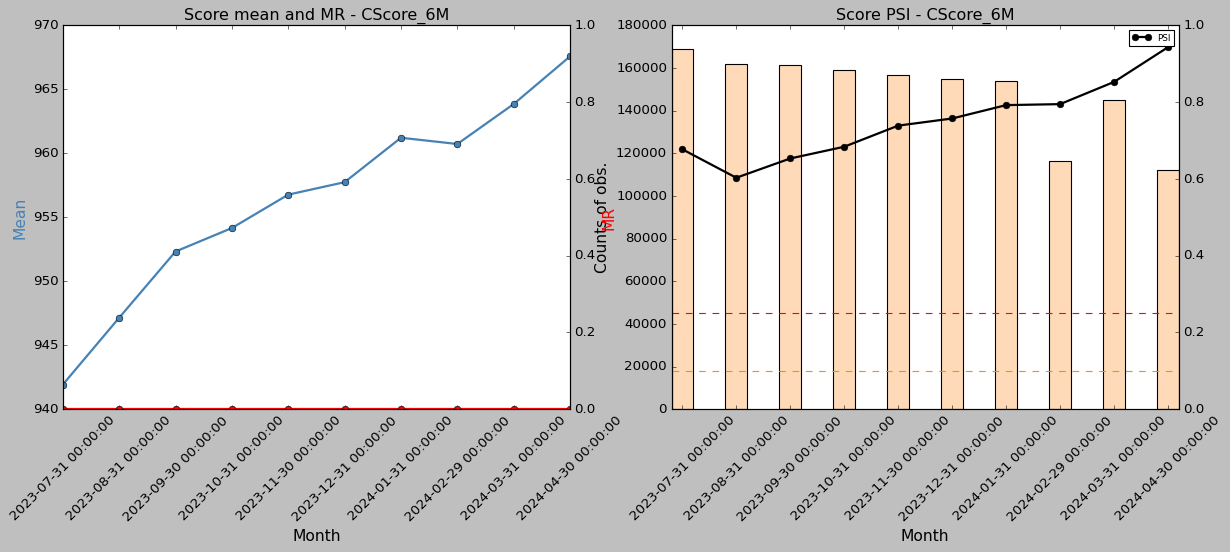

In [43]:
import matplotlib.pyplot as plt
import math

stab_summary_tbl = result.copy()
ind = range(len(stab_summary_tbl.index.tolist()))

#define subplots
plt.style.use('classic')
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

ax[0].plot(ind, stab_summary_tbl['mean'], color='steelblue', marker='o', linewidth=2)
ax[0].set_xticks(ind)
ax[0].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
ax[0].set_xlabel('Month', fontsize=14)
ax[0].set_ylabel('Mean', color='steelblue', fontsize=14)

ax[0].set_title('Score mean and MR' + ' - ' + 'CScore_6M')

ax0_twinx = ax[0].twinx()
ax0_twinx.plot(ind, stab_summary_tbl['mr'], color='red', marker='o', linewidth=2)
ax0_twinx.set_ylabel('MR', color='red', fontsize=14)
ax0_twinx.set_ylim([0,1])

ax[1].bar(ind, tbl['count'], color='peachpuff', width=0.4)
ax[1].set_xticks(ind)
ax[1].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
ax[1].set_xlabel('Month', fontsize=14)
ax[1].set_ylabel('Counts of obs.', color='black', fontsize=14)

ax1_twinx = ax[1].twinx()
ax1_twinx.plot(ind, stab_summary_tbl['PSI'], color='black', marker='o', linewidth=2)
ax1_twinx.set_ylim([0,1])
ax1_twinx.axhline(y = 0.1, color = 'darkorange', linestyle = 'dashed')
ax1_twinx.axhline(y = 0.25, color = 'r', linestyle = 'dashed')
ax1_twinx.legend(['PSI'], prop={'size': 8})
ax[1].set_title('Score PSI' + ' - ' + 'CScore_6M')

plt.show()


#### Score_range risk

In [44]:
ref_range = risk_7_score_range[risk_7_score_range['Score_Type'] == 'Cscore'][['Score_range', 'Ranking_Score', 'So_Acc', 'So_BAD']]
ref_range.columns = ['Score_range', 'Ranking_Score', 'Train Count', 'Train Event']

ref_range['Train Distribution (%)'] = ref_range['Train Count']/ref_range['Train Count'].sum()*100
ref_range['DR Forecast (%)'] = ref_range['Train Event']/ref_range['Train Count']*100

In [45]:
df_sum = df_calc_sc[df_calc_sc['Date_Score'] == '2024-01-31'].groupby(by = 'score_bin').agg(
                            count = ('ACCOUNT_NUMBER', 'count'),
                            TARGET_3M_wCIC_OBS = ('TARGET_3M_OBS', 'sum'),
                            TARGET_3M_wCIC = ('TARGET_3M_wCIC', 'sum'),
            )

In [46]:
ref_range[['Count', 'TARGET_3M_OBS', 'TARGET_3M_wCIC']] = df_sum.values

ref_range['Distribution (%)'] = ref_range['Count']/ref_range['Count'].sum()*100
ref_range['DR TARGET_3M_wCIC (%)'] = ref_range['TARGET_3M_wCIC']/ref_range['TARGET_3M_OBS']*100

In [47]:
ref_range.sort_values(by = 'Ranking_Score', ascending = False).style.background_gradient(subset=['DR Forecast (%)', 'DR TARGET_3M_wCIC (%)'], 
                                                                                         cmap = 'RdYlGn_r',
                                                                                         axis = None)

## CScore122023

#### Performance check (KRI1)

In [48]:
from pandas.tseries.offsets import MonthEnd

In [49]:
df_calc = df_cscore122023

In [50]:
df_calc['Month'] = pd.to_datetime(df_calc['DATE_30D_PLUS'], format="%Y%m") + MonthEnd(1)

In [51]:
cscore122023_targets =  [('TARGET_75D', 'TARGET_75D_OBS'), 
                         # ('TARGET_30D', 'TARGET_30D_OBS')
                        ]

In [52]:

pvt_tb = df_calc.groupby('Month').agg(
    count = ('account_number', 'count'),
    mean = ('CSCORE', mean_cust),
)
pvt_tb.loc['All'] = [df_calc['account_number'].count(), mean_cust(df_calc['CSCORE'])]

for target in cscore122023_targets:
    pvt_tb_gini = df_calc.groupby('Month').agg(
        target_obs_sum = (target[1], 'sum'),
        target_sum = (target[0], 'sum')
    )
    pvt_tb_gini.columns = [target[1], target[0]]
    pvt_tb_gini.loc['All'] = pvt_tb_gini.sum(axis=0)

    pvt_tb_gini['Gini '+target[0]] = df_calc.groupby('Month').apply(lambda x: gini_calc(x[target[0]], x['CSCORE'], x[target[1]]))
    gini_total = gini_calc(df_calc[target[0]], df_calc['CSCORE'], df_calc[target[1]])
    if gini_total < 0:
        pvt_tb_gini['Gini '+target[0]] = - pvt_tb_gini['Gini '+target[0]]
    pvt_tb_gini['KS '+target[0]] = df_calc.groupby('Month').apply(lambda x: ks_calc(x[target[0]], x['CSCORE'], x[target[1]]))

    pvt_tb = pvt_tb.join(pvt_tb_gini, how='left')
    pvt_tb.loc['All', 'Gini '+target[0]] = abs(gini_total)
    pvt_tb.loc['All', 'KS '+target[0]] = ks_calc(df_calc[target[0]], df_calc['CSCORE'], df_calc[target[1]])

In [53]:
pvt_tb

count        mean  TARGET_75D_OBS  TARGET_75D  \
Month                                                                  
2023-09-30 00:00:00   2862.0  570.942697          2817.0      2377.0   
2023-10-31 00:00:00   2587.0  565.822961          2550.0      2141.0   
2023-11-30 00:00:00   1433.0  563.729239          1408.0      1019.0   
2023-12-31 00:00:00   1284.0  565.312305          1256.0       921.0   
2024-01-31 00:00:00   1097.0  566.105743          1076.0       767.0   
2024-02-29 00:00:00   1007.0  573.957299           985.0       677.0   
2024-03-31 00:00:00   1554.0  569.633205             0.0         0.0   
2024-04-30 00:00:00   1261.0  570.109437             0.0         0.0   
All                  13085.0  568.178678         10092.0      7902.0   

                     Gini TARGET_75D  KS TARGET_75D  
Month                                                
2023-09-30 00:00:00        43.900734      34.942345  
2023-10-31 00:00:00        46.422335      35.178818  
2023-11-30 00:00:00        46.439248      37.829567  
2023-12-31 00:00:00        46.389227      33.860988  
2024-01-31 00:00:00        45.255123      36.290680  
2024-02-29 00:00:00        43.993267      37.617257  
2024-03-31 00:00:00              NaN            NaN  
2024-04-30 00:00:00              NaN            NaN  
All                        44.101748      33.998676

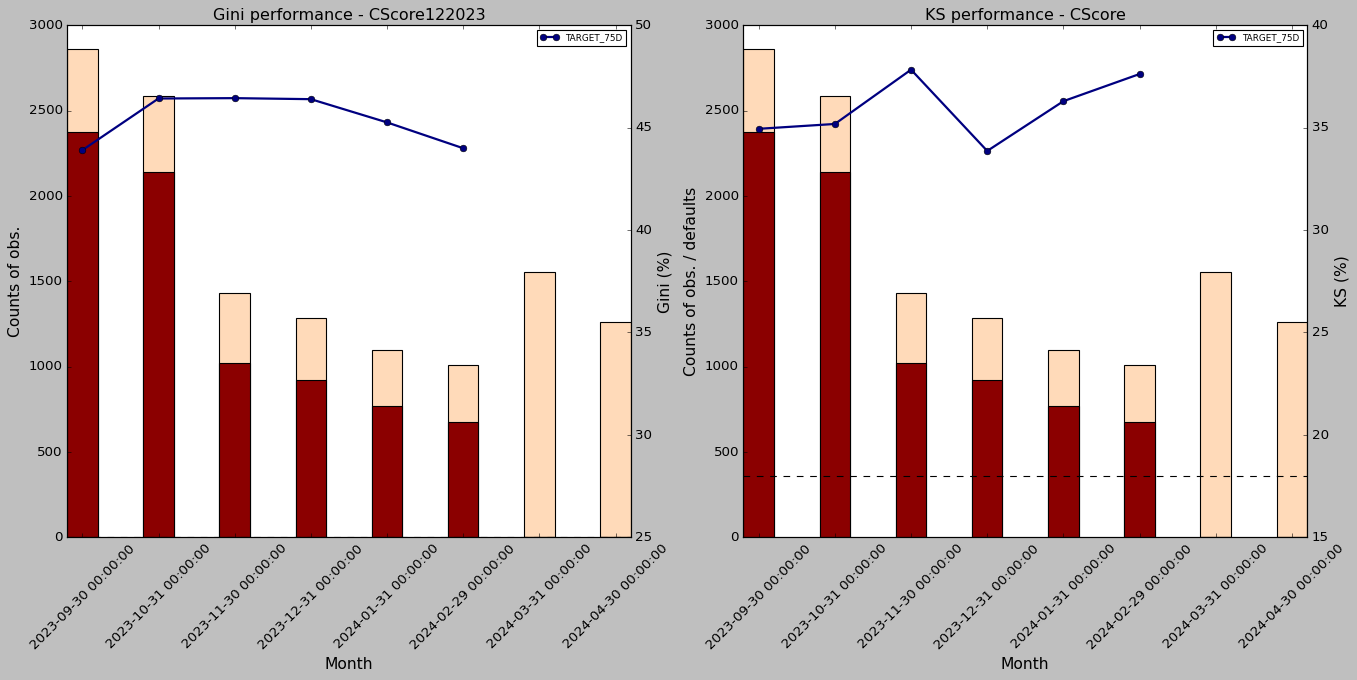

In [54]:
tbl = pvt_tb[pvt_tb.index != 'All']

if pvt_tb.loc[pvt_tb.index == 'All', [tar[0] for tar in cscore122023_targets]].sum().sum() > 0.0:

    ind = range(len(tbl.index.tolist()))

    #define subplots
    plt.style.use('classic')
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    ax[0].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
    ax[0].bar(ind, tbl[tbl.columns[3]], color='darkred', width=0.4)
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(tbl.index.tolist(), rotation = 45)
    ax[0].set_xlabel('Month', fontsize=14)
    ax[0].set_ylabel('Counts of obs.', fontsize=14)

    ax[0].set_title('Gini performance' + ' - ' + 'CScore122023')

    ax0_twinx = ax[0].twinx()

    blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
    for tar in enumerate(cscore122023_targets):
        clr = blues[tar[0]%len(blues)]
        ax0_twinx.plot(ind, tbl['Gini ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])

    ax0_twinx.axhline(y=25.0, color='black', linestyle='--')
    ax0_twinx.set_ylabel('Gini (%)', fontsize=14)
    gini_max = tbl.loc[:, ['Gini '+tar[0] for tar in cscore122023_targets[0:1]]].max().max()
    gini_min = tbl.loc[:, ['Gini '+tar[0] for tar in cscore122023_targets[0:1]]].min().min()
    # ax0_twinx.set_ylim([min(0, math.floor(gini_max/10)*10), math.ceil(gini_max/10)*10])
    ax0_twinx.legend(prop={'size': 8})

    ax[1].bar(ind, tbl[tbl.columns[0]], color='peachpuff', width=0.4)
    ax[1].bar(ind, tbl[tbl.columns[3]], color='darkred', width=0.4)
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(tbl.index.tolist(), rotation = 45)
    ax[1].set_xlabel('Month', fontsize=14)
    ax[1].set_ylabel('Counts of obs. / defaults', fontsize=14)
    ax[1].set_title('KS performance' + ' - ' + 'CScore')

    ax1_twinx = ax[1].twinx()

    blues = ['navy', 'mediumblue', 'royalblue', 'lightblue']    
    for tar in enumerate(cscore122023_targets):
        clr = blues[tar[0]%len(blues)]
        ax1_twinx.plot(ind, tbl['KS ' + tar[1][0]], color=clr, marker='o', linewidth=2, label=tar[1][0])

    ax1_twinx.axhline(y=18.0, color='black', linestyle='--')
    ax1_twinx.set_ylabel('KS (%)', fontsize=14)
    # ks_max = tbl.loc[:, ['KS '+tar[0] for tar in cscore122023_targets[0:1]]].max().max()
    # ax1_twinx.set_ylim([0, math.ceil(ks_max/10)*10])
    ax1_twinx.legend(prop={'size': 8})
    plt.show()

#### Stability check (KRI2)

In [55]:

pvt_tb_basic = df_calc.groupby('Month').agg(
    count = ('CSCORE', 'size'),
    mean = ('CSCORE', mean_cust),
    mr = ('CSCORE', mr)
)

breakpoints = risk_7_score_range[
    risk_7_score_range['Score_Type'] == 'CSCORE122023'
]['range_min']

breakpoints_cleaned = [float('-inf')] + [x for x in breakpoints if ~np.isnan(x)] + [float('inf')]
cols = ['(' + str(breakpoints_cleaned[i]) + ', ' + str(breakpoints_cleaned[i+1]) + ']' for i in range(len(breakpoints_cleaned)-1)]


expected = risk_7_score_range[
    risk_7_score_range['Score_Type'] ==  'CSCORE122023'
]['So_Acc']

expected_perc = expected / expected.sum()
expected_perc
expected_perc.index = cols

df_calc_sc = df_calc[['account_number', 'Month', 'CSCORE', 'TARGET_75D_OBS', 'TARGET_75D', 'TARGET_30D_OBS', 'TARGET_30D']].copy()
df_calc_sc['score_bin'] = pd.cut(df_calc_sc['CSCORE'], breakpoints_cleaned, include_lowest=True, duplicates='drop')

pvt_tb_psi = pd.pivot_table(df_calc_sc, index = 'Month', columns = 'score_bin', values = 'account_number', aggfunc = 'count')
pvt_tb_psi.columns = [str(col) for col in pvt_tb_psi.columns]
pvt_tb_psi = pd.concat([pd.DataFrame(columns=cols), pvt_tb_psi]).fillna(0)

pvt_tb_psi = pvt_tb_psi.div(pvt_tb_psi.sum(axis='columns'), axis='rows')
pvt_tb_psi['PSI'] = pvt_tb_psi.apply(lambda x: psi(expected_perc, x), axis=1)

result = pvt_tb_basic.join(pvt_tb_psi, how='left')
    

In [56]:
result

count        mean   mr  (-inf, 466.0]  (466.0, 478.0]  \
Month                                                               
2023-09-30   2862  570.942697  0.0       0.003843        0.001048   
2023-10-31   2587  565.822961  0.0       0.003479        0.001546   
2023-11-30   1433  563.729239  0.0       0.002791        0.002791   
2023-12-31   1284  565.312305  0.0       0.000779        0.002336   
2024-01-31   1097  566.105743  0.0       0.001823        0.000912   
2024-02-29   1007  573.957299  0.0       0.001986        0.000000   
2024-03-31   1554  569.633205  0.0       0.000644        0.001287   
2024-04-30   1261  570.109437  0.0       0.003172        0.000000   

            (478.0, 491.0]  (491.0, 504.0]  (504.0, 516.0]  (516.0, 529.0]  \
Month                                                                        
2023-09-30        0.012928        0.032844        0.023410        0.112858   
2023-10-31        0.025126        0.059142        0.038655        0.107074   
2023-11-30        0.036985        0.075366        0.059316        0.116539   
2023-12-31        0.029595        0.075545        0.043614        0.102804   
2024-01-31        0.027347        0.063810        0.051960        0.112124   
2024-02-29        0.009930        0.042701        0.018868        0.103277   
2024-03-31        0.010940        0.043758        0.019949        0.095882   
2024-04-30        0.012688        0.049167        0.034893        0.100714   

            (529.0, 542.0]  (542.0, 554.0]  (554.0, 567.0]  (567.0, 580.0]  \
Month                                                                        
2023-09-30        0.148148        0.105521        0.126485        0.109015   
2023-10-31        0.148821        0.102435        0.130267        0.096637   
2023-11-30        0.145848        0.090021        0.103280        0.077460   
2023-12-31        0.133178        0.102025        0.113707        0.109034   
2024-01-31        0.134002        0.105743        0.113036        0.092981   
2024-02-29        0.139027        0.108242        0.110228        0.138034   
2024-03-31        0.169241        0.104247        0.117117        0.126770   
2024-04-30        0.122918        0.094370        0.136400        0.122125   

            (580.0, 592.0]  (592.0, 605.0]  (605.0, 617.0]  (617.0, 630.0]  \
Month                                                                        
2023-09-30        0.057652        0.056604        0.034941        0.031097   
2023-10-31        0.050638        0.047545        0.035176        0.018941   
2023-11-30        0.049546        0.047453        0.022331        0.016050   
2023-12-31        0.042056        0.052181        0.027259        0.023364   
2024-01-31        0.052871        0.043756        0.030994        0.021878   
2024-02-29        0.054618        0.047666        0.034757        0.025819   
2024-03-31        0.052124        0.064994        0.036680        0.025740   
2024-04-30        0.062649        0.066614        0.038065        0.026963   

            (630.0, 643.0]  (643.0, 655.0]  (655.0, 668.0]  (668.0, 681.0]  \
Month                                                                        
2023-09-30        0.033543        0.016073        0.025856        0.028651   
2023-10-31        0.026285        0.020101        0.023966        0.025126   
2023-11-30        0.030705        0.016748        0.027216        0.033496   
2023-12-31        0.035047        0.017134        0.024922        0.035826   
2024-01-31        0.027347        0.014585        0.031905        0.028259   
2024-02-29        0.034757        0.016882        0.033764        0.031778   
2024-03-31        0.027027        0.022523        0.025740        0.027027   
2024-04-30        0.030135        0.019826        0.018239        0.019826   

            (681.0, 693.0]  (693.0, inf]       PSI  
Month                                               
2023-09-30        0.012579      0.026904  0.134114  
2023-10-31        0.013916      0.0251

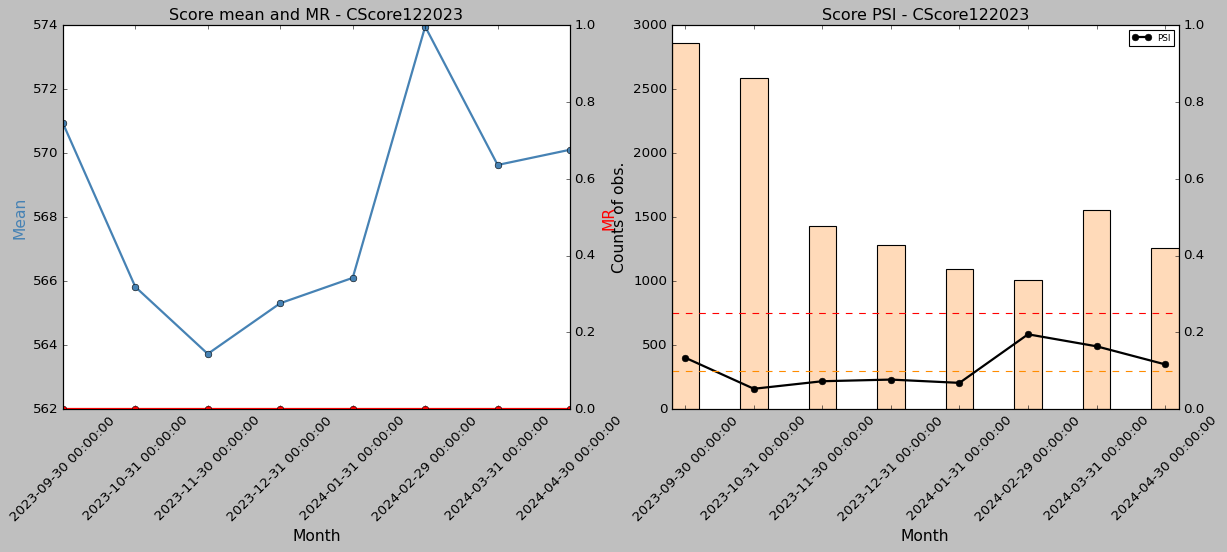

In [57]:
import matplotlib.pyplot as plt
import math

stab_summary_tbl = result.copy()
ind = range(len(stab_summary_tbl.index.tolist()))

#define subplots
plt.style.use('classic')
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

ax[0].plot(ind, stab_summary_tbl['mean'], color='steelblue', marker='o', linewidth=2)
ax[0].set_xticks(ind)
ax[0].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
ax[0].set_xlabel('Month', fontsize=14)
ax[0].set_ylabel('Mean', color='steelblue', fontsize=14)

ax[0].set_title('Score mean and MR' + ' - ' + 'CScore122023')

ax0_twinx = ax[0].twinx()
ax0_twinx.plot(ind, stab_summary_tbl['mr'], color='red', marker='o', linewidth=2)
ax0_twinx.set_ylabel('MR', color='red', fontsize=14)
ax0_twinx.set_ylim([0,1])

ax[1].bar(ind, tbl['count'], color='peachpuff', width=0.4)
ax[1].set_xticks(ind)
ax[1].set_xticklabels(stab_summary_tbl.index.tolist(), rotation = 45)
ax[1].set_xlabel('Month', fontsize=14)
ax[1].set_ylabel('Counts of obs.', color='black', fontsize=14)

ax1_twinx = ax[1].twinx()
ax1_twinx.plot(ind, stab_summary_tbl['PSI'], color='black', marker='o', linewidth=2)
ax1_twinx.set_ylim([0,1])
ax1_twinx.axhline(y = 0.1, color = 'darkorange', linestyle = 'dashed')
ax1_twinx.axhline(y = 0.25, color = 'r', linestyle = 'dashed')
ax1_twinx.legend(['PSI'], prop={'size': 8})
ax[1].set_title('Score PSI' + ' - ' + 'CScore122023')

plt.show()


#### Score_range risk TARGET_75D

In [58]:
ref_range = risk_7_score_range[risk_7_score_range['Score_Type'] == 'CSCORE122023'][['Score_range', 'Ranking_Score', 'So_Acc', 'So_BAD']]
ref_range.columns = ['Score_range', 'Ranking_Score', 'Train Count', 'Train Event']

ref_range['Train Distribution (%)'] = ref_range['Train Count']/ref_range['Train Count'].sum()*100
ref_range['DR Forecast (%)'] = ref_range['Train Event']/ref_range['Train Count']*100

In [59]:
df_sum = df_calc_sc.groupby(by = 'score_bin').agg(
                            count = ('account_number', 'count'),
                            TARGET_75D_OBS = ('TARGET_75D_OBS', 'sum'),
                            TARGET_75D = ('TARGET_75D', 'sum'),
            )

In [60]:
ref_range[['Count', 'TARGET_75D_OBS', 'TARGET_75D']] = df_sum.values

ref_range['Distribution (%)'] = ref_range['Count']/ref_range['Count'].sum()*100
ref_range['DR TARGET_75D (%)'] = ref_range['TARGET_75D']/ref_range['TARGET_75D_OBS']*100

In [61]:
ref_range.sort_values(by = 'Ranking_Score', ascending = False).style.background_gradient(subset=['DR Forecast (%)', 'DR TARGET_75D (%)'], 
                                                                                         cmap = 'RdYlGn_r',
                                                                                         axis = None)

#### Score_range risk TARGET_30D

In [62]:
ref_range = risk_7_score_range[risk_7_score_range['Score_Type'] == 'CSCORE122023'][['Score_range', 'Ranking_Score', 'So_Acc', 'So_BAD']]
ref_range.columns = ['Score_range', 'Ranking_Score', 'Train Count', 'Train Event']

ref_range['Train Distribution (%)'] = ref_range['Train Count']/ref_range['Train Count'].sum()*100
ref_range['DR Forecast (%)'] = ref_range['Train Event']/ref_range['Train Count']*100

In [63]:
df_sum = df_calc_sc.groupby(by = 'score_bin').agg(
                            count = ('account_number', 'count'),
                            TARGET_30D_OBS = ('TARGET_30D_OBS', 'sum'),
                            TARGET_30D = ('TARGET_30D', 'sum'),
            )

In [64]:
ref_range[['Count', 'TARGET_30D_OBS', 'TARGET_30D']] = df_sum.values

ref_range['Distribution (%)'] = ref_range['Count']/ref_range['Count'].sum()*100
ref_range['DR TARGET_30D (%)'] = ref_range['TARGET_30D']/ref_range['TARGET_30D_OBS']*100

In [65]:
ref_range.sort_values(by = 'Ranking_Score', ascending = False).style.background_gradient(subset=['DR Forecast (%)', 'DR TARGET_30D (%)'], 
                                                                                         cmap = 'RdYlGn_r',
                                                                                         axis = None)

## AX062022

### ExpressCard

#### Performance check (KRI1)

In [66]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'AX062022',
    score_type_filter = '11. AX062022',
    product_segment = 'ExpressCard',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/ax062022.csv',
    sc_script_score_colname = 'SC_AX062022',
    warnings = []
)

In [67]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                            
2022-06          1587.0  702.293636               404.0            54.0   
2022-07          5159.0  715.310331              1674.0           202.0   
2022-08          6545.0  714.714744              2030.0           256.0   
2022-09          6916.0  715.833141              2169.0           286.0   
2022-10          7265.0  718.682863              2097.0           284.0   
2022-11          2871.0  730.990944               607.0            58.0   
2022-12           913.0  732.311062                59.0             1.0   
2023-01           255.0  732.827451                16.0             0.0   
2023-02           229.0  726.152838                10.0             0.0   
2023-03           348.0  712.847701                 8.0             1.0   
2023-04           245.0  739.387755                10.0             2.0   
2023-05           260.0  738.846154                 9.0             1.0   
2023-06           245.0  741.820408                20.0             0.0   
2023-07           256.0  734.058594                21.0             0.0   
2023-08           205.0  738.424390                13.0             1.0   
2023-09           159.0  734.301887                 7.0             0.0   
2023-10           282.0  726.262411                26.0             1.0   
2023-11           715.0  736.948252                88.0             8.0   
2023-12           743.0  733.732167                91.0             5.0   
2024-01           603.0  733.825871                68.0             4.0   
2024-02           154.0  732.759740                 0.0             0.0   
2024-03           258.0  739.658915                 0.0             0.0   
2024-04           299.0  744.789298                 0.0             0.0   
All             36512.0  477.583242              9427.0          1164.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-06                   30.365079          27.671958               391.0   
2022-07                   38.905779          29.991525              1646.0   
2022-08                   29.221348          24.660020              1987.0   
2022-09                   32.227624          25.718148              2122.0   
2022-10                   27.591223          20.885156              2045.0   
2022-11                   40.311538          36.166070               584.0   
2022-12                  -29.310345          63.793103                52.0   
2023-01                         NaN                NaN                14.0   
2023-02                         NaN                NaN                10.0   
2023-03                   71.428571          85.714286                 7.0   
2023-04                   56.250000          50.000000                 9.0   
2023-05                   75.000000          87.500000                 9.0   
2023-06                         NaN                NaN                18.0   
2023-07                         NaN                NaN                20.0   
2023-08                  -25.000000          58.333333                11.0   
2023-09                         NaN                NaN                 6.0   
2023-10                   36.000000          68.000000                24.0   
2023-11                   16.718750          25.000000                 0.0   
2023-12                   35.348837          41.860465                 0.0   
2024-01                   29.687500          34.375000                 0.0   
2024-02                         NaN                NaN                 0.0   
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                       33.136310          24.641874              8955.0   

                TARGET_6M_wCIC  Gini T

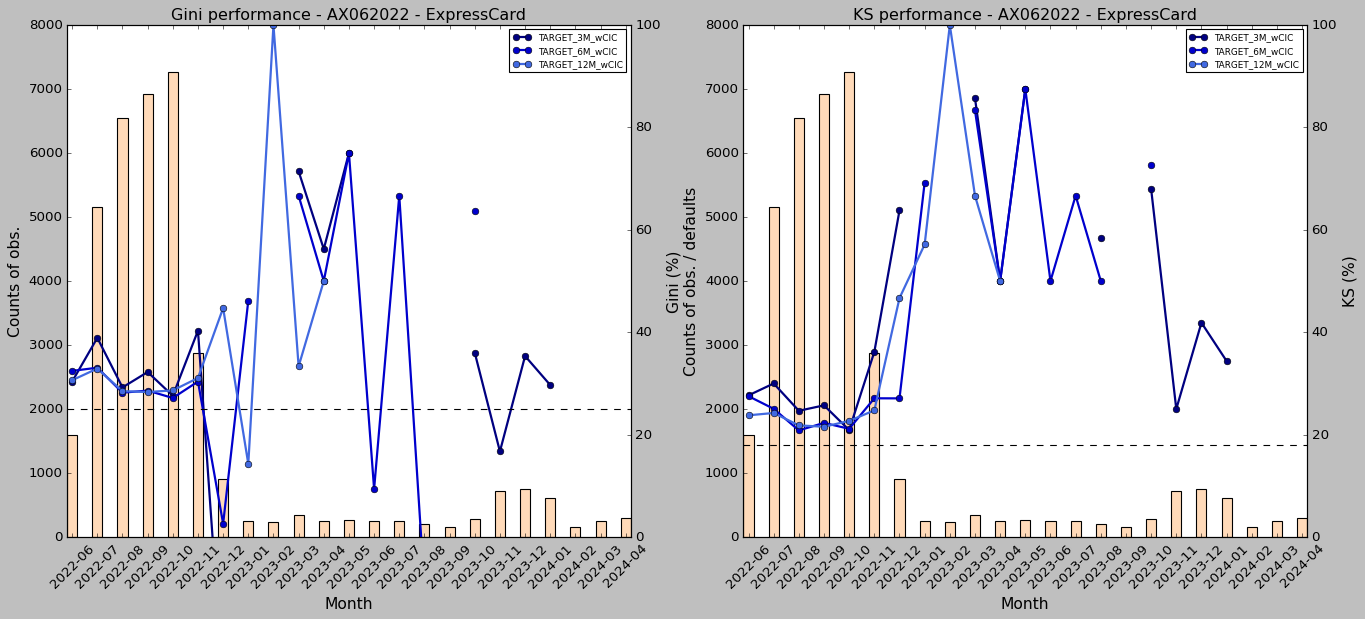

In [68]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [69]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

27.340153452685424

#### Stability check (KRI2)

In [70]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean   mr  (-inf, 588.0]  (588.0, 603.0]  \
Received_Month                                                          
2022-06          1587  702.293636  0.0       0.008822        0.011972   
2022-07          5159  715.310331  0.0       0.009692        0.014344   
2022-08          6545  714.714744  0.0       0.010084        0.014209   
2022-09          6916  715.833141  0.0       0.010700        0.013158   
2022-10          7265  718.682863  0.0       0.009911        0.013352   
2022-11          2871  730.990944  0.0       0.007315        0.007663   
2022-12           913  732.311062  0.0       0.000000        0.002191   
2023-01           255  732.827451  0.0       0.003922        0.000000   
2023-02           229  726.152838  0.0       0.000000        0.000000   
2023-03           348  712.847701  0.0       0.005747        0.005747   
2023-04           245  739.387755  0.0       0.000000        0.000000   
2023-05           260  738.846154  0.0       0.003846        0.000000   
2023-06           245  741.820408  0.0       0.000000        0.004082   
2023-07           256  734.058594  0.0       0.003906        0.003906   
2023-08           205  738.424390  0.0       0.000000        0.009756   
2023-09           159  734.301887  0.0       0.000000        0.000000   
2023-10           282  726.262411  0.0       0.007092        0.000000   
2023-11           715  736.948252  0.0       0.001399        0.004196   
2023-12           743  733.732167  0.0       0.000000        0.006729   
2024-01           603  733.825871  0.0       0.003317        0.004975   
2024-02           154  732.759740  0.0       0.000000        0.000000   
2024-03           258  739.658915  0.0       0.000000        0.003876   
2024-04           299  744.789298  0.0       0.000000        0.003344   

                (603.0, 617.0]  (617.0, 632.0]  (632.0, 647.0]  \
Received_Month                                                   
2022-06               0.026465        0.044739        0.065532   
2022-07               0.023066        0.037604        0.049622   
2022-08               0.023682        0.035141        0.050115   
2022-09               0.019231        0.036148        0.051041   
2022-10               0.020785        0.031246        0.044460   
2022-11               0.016022        0.021595        0.037269   
2022-12               0.008762        0.019715        0.027382   
2023-01               0.011765        0.015686        0.043137   
2023-02               0.004367        0.021834        0.039301   
2023-03               0.017241        0.037356        0.066092   
2023-04               0.004082        0.008163        0.028571   
2023-05               0.003846        0.011538        0.019231   
2023-06               0.004082        0.020408        0.024490   
2023-07               0.003906        0.023438        0.046875   
2023-08               0.000000        0.004878        0.039024   
2023-09               0.012579        0.018868        0.012579   
2023-10               0.010638        0.014184        0.035461   
2023-11               0.012587        0.012587        0.018182   
2023-12               0.009421        0.016151        0.022880   
2024-01               0.008292        0.021559        0.023217   
2024-02               0.006494        0.019481        0.038961   
2024-03               0.007752        0.023256        0.034884   
2024-04               0.003344        0.010033        0.026756   

                (647.0, 662.0]  (662.0, 676.0]  (676.0, 691.0]  \
Received_Month                                                   
2022-06               0.076244        0.118463        0.131695   
2022-07               0.073658        0.082574        0.102345   
2022-08               0.066769        0.076241        0.115355   
2022-09               0.064633        0.077646        0.118710   
2022-10               0.062078        0.073090        0.101583   
2022-11               0.053292        0.060258        0.081505   
2022-12    

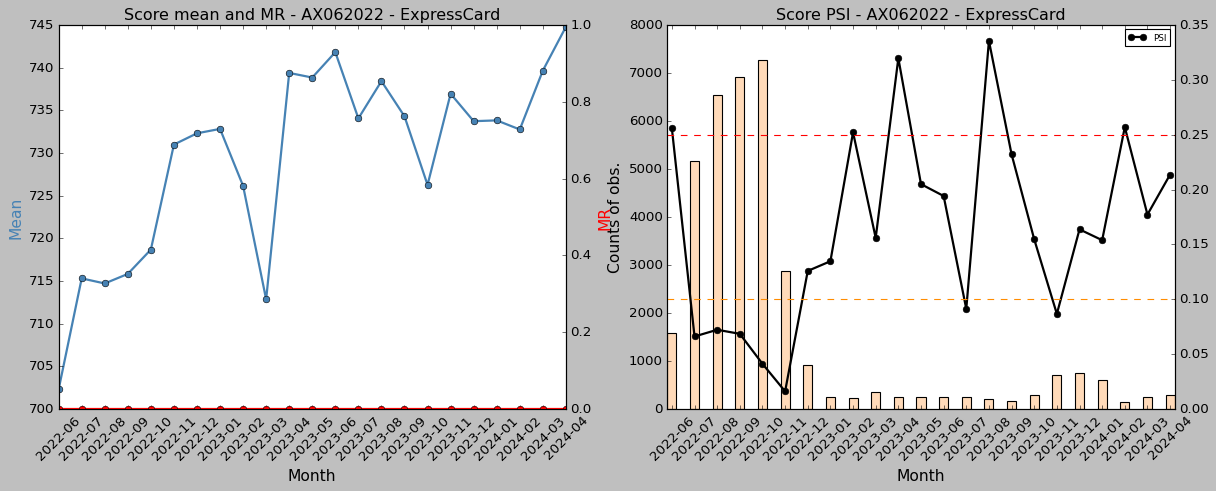

In [71]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [72]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-06          1587             452              738          404.0   
2022-07          5159            1882             2252         1674.0   
2022-08          6545            2277             2895         2030.0   
2022-09          6916            2447             3039         2169.0   
2022-10          7265            2297             3113         2097.0   
2022-11          2871             627             1313          607.0   
2022-12           913              67              655           59.0   
2023-01           255              16              182           16.0   
2023-02           229              10              175           10.0   
2023-03           348               9              280            8.0   
2023-04           245              11              175           10.0   
2023-05           260              10              177            9.0   
2023-06           245              23              162           20.0   
2023-07           256              22              176           21.0   
2023-08           205              15              141           13.0   
2023-09           159              11              115            7.0   
2023-10           282              31              206           26.0   
2023-11           715             101              494           88.0   
2023-12           743             104              548           91.0   
2024-01           603              80              461           69.0   
2024-02           154              19              117            5.0   
2024-03           258              38              180            0.0   
2024-04           299              46              199            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-06                      404.0            54.0       14.0         14.0   
2022-07                     1674.0           202.0       69.0         63.0   
2022-08                     2030.0           256.0      116.0        110.0   
2022-09                     2169.0           286.0      124.0        119.0   
2022-10                     2097.0           284.0      114.0        109.0   
2022-11                      607.0            58.0       22.0         22.0   
2022-12                       59.0             1.0        0.0          0.0   
2023-01                       16.0             0.0        0.0          0.0   
2023-02                       10.0             0.0        0.0          0.0   
2023-03                        8.0             1.0        0.0          0.0   
2023-04                       10.0             2.0        0.0          0.0   
2023-05                        9.0             1.0        0.0          0.0   
2023-06                       20.0             0.0        0.0          0.0   
2023-07                       21.0             0.0        0.0          0.0   
2023-08                       13.0             1.0        1.0          1.0   
2023-09                        7.0             0.0        0.0          0.0   
2023-10                       26.0             1.0        0.0          0.0   
2023-11                       88.0             8.0        5.0          5.0   
2023-12                       91.0             5.0        2.0          2.0   
2024-01                       68.0             4.0        1.0          1.0   
2024-02                        0.0             0.0        0.0          0.0   
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-06                 410.0               410.0            36.0        0.0   

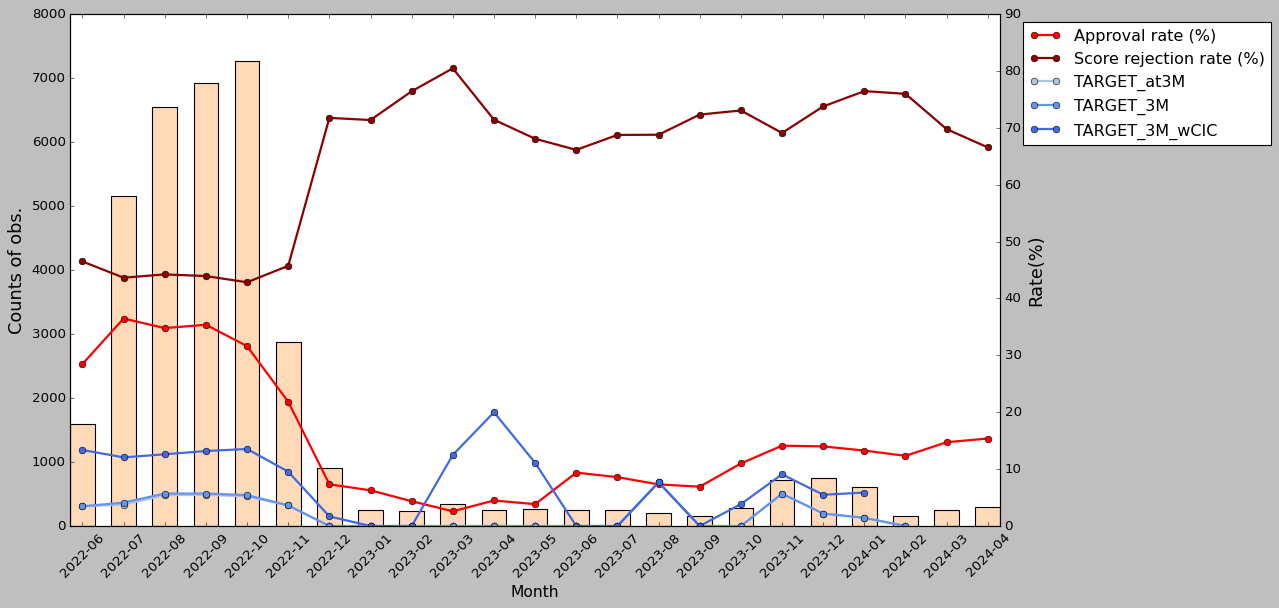

In [73]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [74]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2022-06          1587             452              738     702.293636   
2022-07          5159            1882             2252     715.310331   
2022-08          6545            2277             2895     714.714744   
2022-09          6916            2447             3039     715.833141   
2022-10          7265            2297             3113     718.682863   
2022-11          2871             627             1313     730.990944   
2022-12           913              67              655     732.311062   
2023-01           255              16              182     732.827451   
2023-02           229              10              175     726.152838   
2023-03           348               9              280     712.847701   
2023-04           245              11              175     739.387755   
2023-05           260              10              177     738.846154   
2023-06           245              23              162     741.820408   
2023-07           256              22              176     734.058594   
2023-08           205              15              141     738.424390   
2023-09           159              11              115     734.301887   
2023-10           282              31              206     726.262411   
2023-11           715             101              494     736.948252   
2023-12           743             104              548     733.732167   
2024-01           603              80              461     733.825871   
2024-02           154              19              117     732.759740   
2024-03           258              38              180     739.658915   
2024-04           299              46              199     744.789298   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2022-06                709.135476      13.853812             781   
2022-07                714.414034       1.242877             468   
2022-08                713.767762       1.377846             635   
2022-09                714.878398       1.405581             682   
2022-10                717.855747       1.339436             758   
2022-11                714.861024      16.585510            1570   
2022-12                712.585980      20.031763             581   
2023-01                712.454902      20.811765             168   
2023-02                708.475983      20.890830             206   
2023-03                708.132184       4.738506              51   
2023-04                716.085714      23.595918             174   
2023-05                717.942308      21.073077             174   
2023-06                725.648980      16.416327             143   
2023-07                731.914062       2.207031              28   
2023-08                731.053659       7.409756              59   
2023-09                730.528302       3.823899              25   
2023-10                722.836879       3.609929              43   
2023-11                734.156643       3.032168              96   
2023-12                730.946164       2.877524              91   
2024-01                730.431177       3.394693              78   
2024-02                729.701299       3.292208              19   
2024-03                735.806202       3.852713              38   
2024-04                740.761745       3.926174              45   

                Mismatch_rate  
Received_Month                 
2022-06             49.212350  
2022-07              9.071525  
2022-08              9.702063  
2022-09              9.861191  
2022-10             10.433586  
2022-11             54.684779  
2022-12             63.636364  
2023-01             65.882353  
2023-02             89.956332  
2023-03             14.655172  
2023-04             71.020408  
2023-05             66.923077  
2023-06             58.367347  
2023-07  

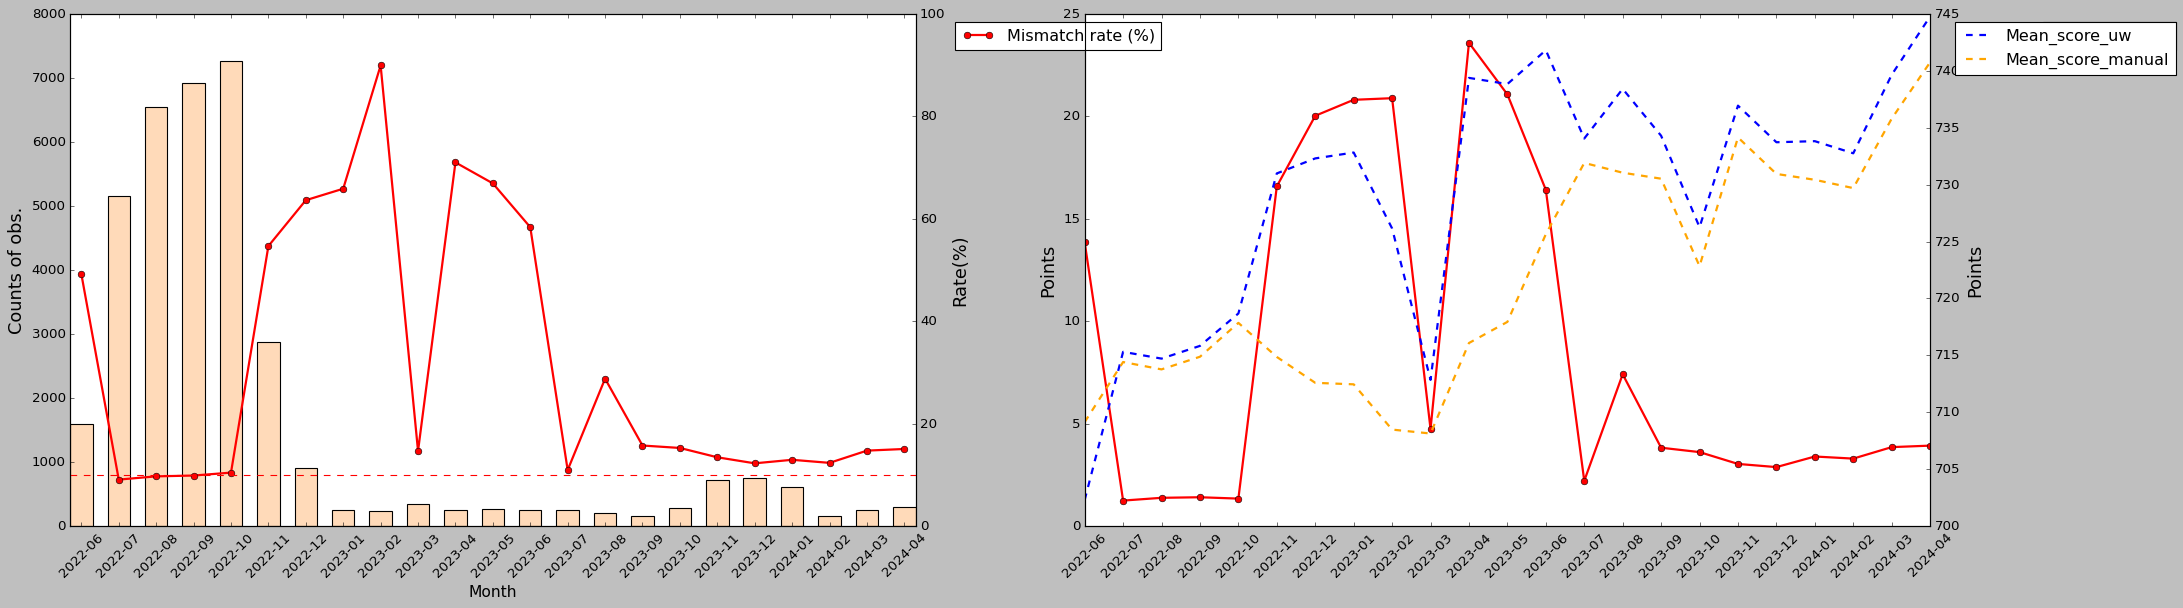

In [75]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [76]:
score_monitoring_segments.append(sc_monitoring_segment)

### SALARYCARD

#### Performance check (KRI1)

In [77]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'AX062022',
    score_type_filter = '11. AX062022',
    product_segment = 'SALARYCARD',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/ax062022.csv',
    sc_script_score_colname = 'SC_AX062022',
    warnings = []
)

In [78]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                            
2022-06           463.0  701.883369               121.0            13.0   
2022-07          1391.0  717.826024               459.0            41.0   
2022-08          1535.0  719.540065               539.0            47.0   
2022-09          1485.0  716.367003               485.0            62.0   
2022-10          1515.0  723.886469               529.0            70.0   
2022-11          1464.0  737.792350               460.0            48.0   
2022-12           511.0  736.485323                49.0             2.0   
2023-01           188.0  734.994681                15.0             1.0   
2023-02           221.0  728.841629                 4.0             0.0   
2023-03           319.0  714.620690                 4.0             0.0   
2023-04           220.0  734.800000                 7.0             0.0   
2023-05           303.0  736.963696                19.0             2.0   
2023-06           320.0  745.153125                32.0             3.0   
2023-07           309.0  732.543689                51.0             9.0   
2023-08           322.0  740.524845                48.0             7.0   
2023-09           382.0  735.060209                55.0             2.0   
2023-10           456.0  731.357456                79.0             9.0   
2023-11           586.0  739.162116               126.0             8.0   
2023-12           543.0  735.421731               105.0            13.0   
2024-01           399.0  731.696742                79.0            10.0   
2024-02           133.0  729.421053                 0.0             0.0   
2024-03           188.0  723.382979                 0.0             0.0   
2024-04           208.0  732.548077                 0.0             0.0   
All             13461.0  477.583242              3266.0           347.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-06                   37.749288          38.675214               118.0   
2022-07                   41.556774          35.179134               450.0   
2022-08                   45.065733          37.977859               525.0   
2022-09                   41.546557          36.410432               467.0   
2022-10                   32.916278          26.716464               509.0   
2022-11                   35.325647          31.796117               439.0   
2022-12                   79.787234          80.851064                45.0   
2023-01                   57.142857          78.571429                14.0   
2023-02                         NaN                NaN                 4.0   
2023-03                         NaN                NaN                 4.0   
2023-04                         NaN                NaN                 7.0   
2023-05                   67.647059          76.470588                17.0   
2023-06                  -12.643678          28.735632                29.0   
2023-07                    9.788360          21.428571                49.0   
2023-08                   15.679443          21.254355                45.0   
2023-09                    9.433962          48.113208                50.0   
2023-10                  -20.634921          29.206349                69.0   
2023-11                   63.347458          64.406780                 0.0   
2023-12                   31.521739          28.846154                 0.0   
2024-01                   17.101449          29.710145                 0.0   
2024-02                         NaN                NaN                 0.0   
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                       35.278949          28.108497              2841.0   

                TARGET_6M_wCIC  Gini T

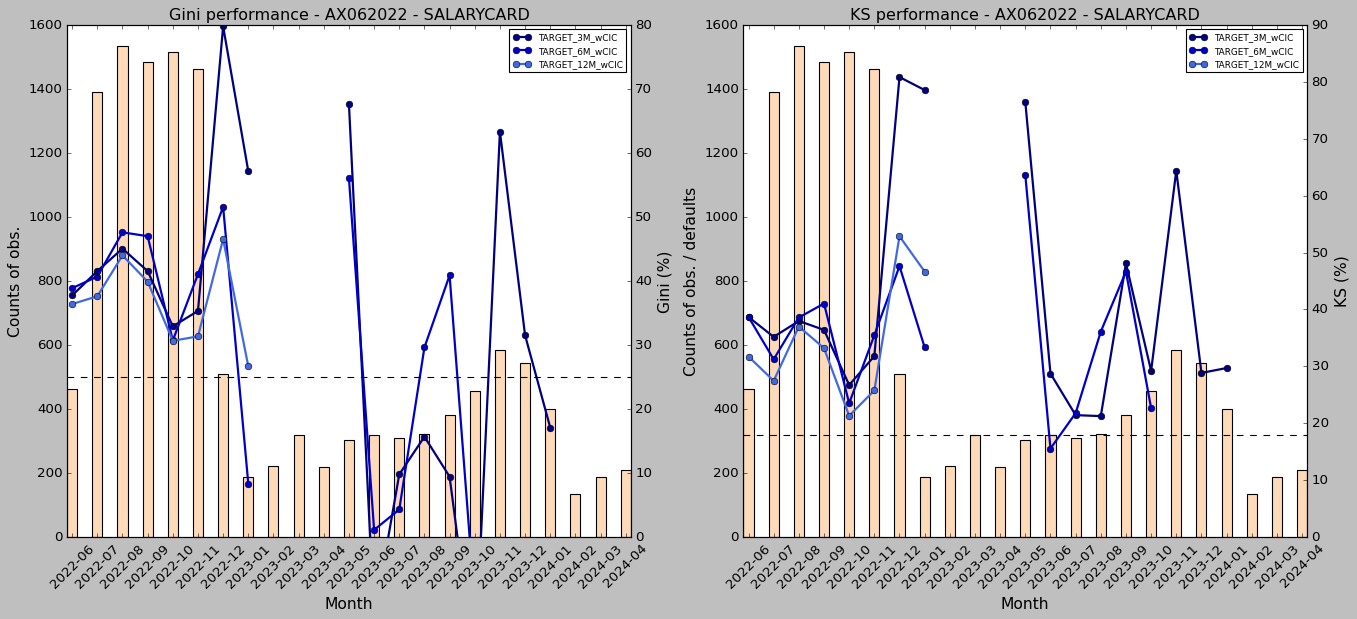

In [79]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [80]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

35.483870967741936

#### Stability check (KRI2)

In [81]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean   mr  (-inf, 588.0]  (588.0, 603.0]  \
Received_Month                                                          
2022-06           463  701.883369  0.0       0.010799        0.021598   
2022-07          1391  717.826024  0.0       0.010065        0.014378   
2022-08          1535  719.540065  0.0       0.005212        0.014984   
2022-09          1485  716.367003  0.0       0.008081        0.016162   
2022-10          1515  723.886469  0.0       0.008581        0.011221   
2022-11          1464  737.792350  0.0       0.005464        0.004781   
2022-12           511  736.485323  0.0       0.000000        0.001957   
2023-01           188  734.994681  0.0       0.000000        0.000000   
2023-02           221  728.841629  0.0       0.009050        0.004525   
2023-03           319  714.620690  0.0       0.003135        0.006270   
2023-04           220  734.800000  0.0       0.000000        0.000000   
2023-05           303  736.963696  0.0       0.003300        0.003300   
2023-06           320  745.153125  0.0       0.000000        0.000000   
2023-07           309  732.543689  0.0       0.000000        0.000000   
2023-08           322  740.524845  0.0       0.000000        0.000000   
2023-09           382  735.060209  0.0       0.000000        0.000000   
2023-10           456  731.357456  0.0       0.000000        0.000000   
2023-11           586  739.162116  0.0       0.003413        0.000000   
2023-12           543  735.421731  0.0       0.001842        0.005525   
2024-01           399  731.696742  0.0       0.002506        0.000000   
2024-02           133  729.421053  0.0       0.000000        0.000000   
2024-03           188  723.382979  0.0       0.005319        0.005319   
2024-04           208  732.548077  0.0       0.000000        0.004808   

                (603.0, 617.0]  (617.0, 632.0]  (632.0, 647.0]  \
Received_Month                                                   
2022-06               0.019438        0.041037        0.049676   
2022-07               0.020129        0.037383        0.046729   
2022-08               0.017590        0.033876        0.048860   
2022-09               0.014815        0.032997        0.048485   
2022-10               0.014521        0.028383        0.034983   
2022-11               0.008880        0.021858        0.028689   
2022-12               0.005871        0.013699        0.039139   
2023-01               0.000000        0.005319        0.031915   
2023-02               0.000000        0.004525        0.027149   
2023-03               0.028213        0.037618        0.037618   
2023-04               0.004545        0.004545        0.031818   
2023-05               0.003300        0.000000        0.033003   
2023-06               0.003125        0.006250        0.012500   
2023-07               0.009709        0.022654        0.035599   
2023-08               0.006211        0.012422        0.012422   
2023-09               0.007853        0.013089        0.028796   
2023-10               0.008772        0.017544        0.017544   
2023-11               0.005119        0.013652        0.022184   
2023-12               0.005525        0.016575        0.029466   
2024-01               0.005013        0.010025        0.020050   
2024-02               0.000000        0.015038        0.037594   
2024-03               0.005319        0.026596        0.026596   
2024-04               0.000000        0.019231        0.019231   

                (647.0, 662.0]  (662.0, 676.0]  (676.0, 691.0]  \
Received_Month                                                   
2022-06               0.084233        0.105832        0.131749   
2022-07               0.068296        0.082674        0.114306   
2022-08               0.059283        0.087948        0.102932   
2022-09               0.061279        0.090236        0.118519   
2022-10               0.060066        0.064026        0.099670   
2022-11               0.038934        0.062158        0.075137   
2022-12    

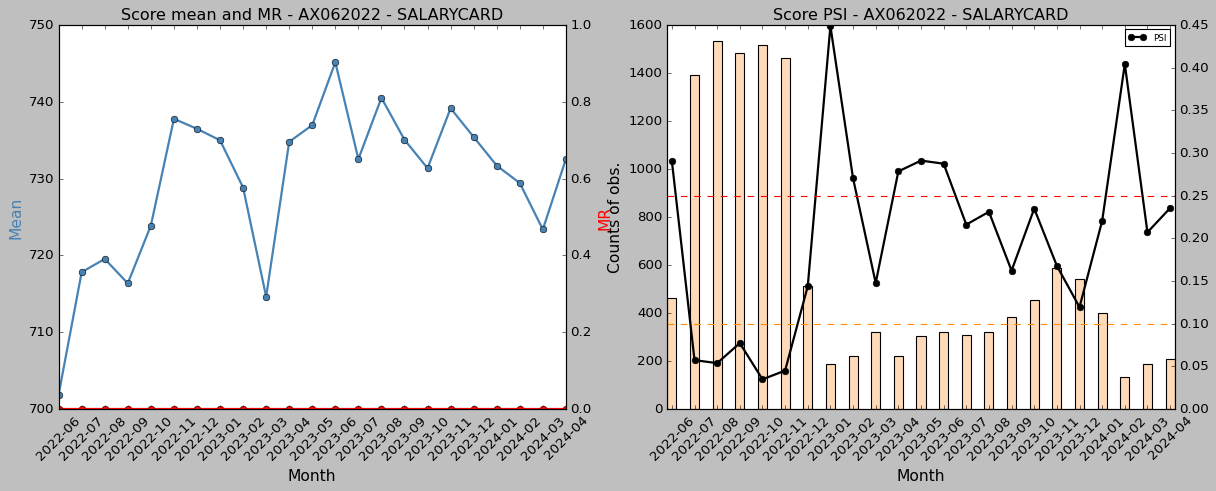

In [82]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [83]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-06           463             148              219          121.0   
2022-07          1391             539              598          459.0   
2022-08          1535             624              642          539.0   
2022-09          1485             576              642          485.0   
2022-10          1515             592              611          529.0   
2022-11          1464             480              546          460.0   
2022-12           511              59              359           49.0   
2023-01           188              15              146           15.0   
2023-02           221               5              166            4.0   
2023-03           319               5              263            4.0   
2023-04           220               8              153            7.0   
2023-05           303              22              212           19.0   
2023-06           320              41              195           32.0   
2023-07           309              54              193           51.0   
2023-08           322              51              186           48.0   
2023-09           382              63              233           55.0   
2023-10           456              86              295           79.0   
2023-11           586             139              349          126.0   
2023-12           543             120              339          105.0   
2024-01           399              90              256           79.0   
2024-02           133              21               93            5.0   
2024-03           188              29              134            0.0   
2024-04           208              34              133            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-06                      121.0            13.0        5.0          5.0   
2022-07                      459.0            41.0       11.0         11.0   
2022-08                      539.0            47.0       20.0         18.0   
2022-09                      485.0            62.0       19.0         16.0   
2022-10                      529.0            70.0       20.0         20.0   
2022-11                      460.0            48.0       19.0         19.0   
2022-12                       49.0             2.0        0.0          0.0   
2023-01                       15.0             1.0        0.0          0.0   
2023-02                        4.0             0.0        0.0          0.0   
2023-03                        4.0             0.0        0.0          0.0   
2023-04                        7.0             0.0        0.0          0.0   
2023-05                       19.0             2.0        1.0          1.0   
2023-06                       32.0             3.0        0.0          0.0   
2023-07                       51.0             9.0        3.0          3.0   
2023-08                       48.0             7.0        4.0          4.0   
2023-09                       55.0             2.0        2.0          2.0   
2023-10                       79.0             9.0        3.0          3.0   
2023-11                      126.0             8.0        3.0          3.0   
2023-12                      105.0            13.0        3.0          3.0   
2024-01                       79.0            10.0        5.0          5.0   
2024-02                        0.0             0.0        1.0          1.0   
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-06                 123.0               123.0            11.0        0.0   

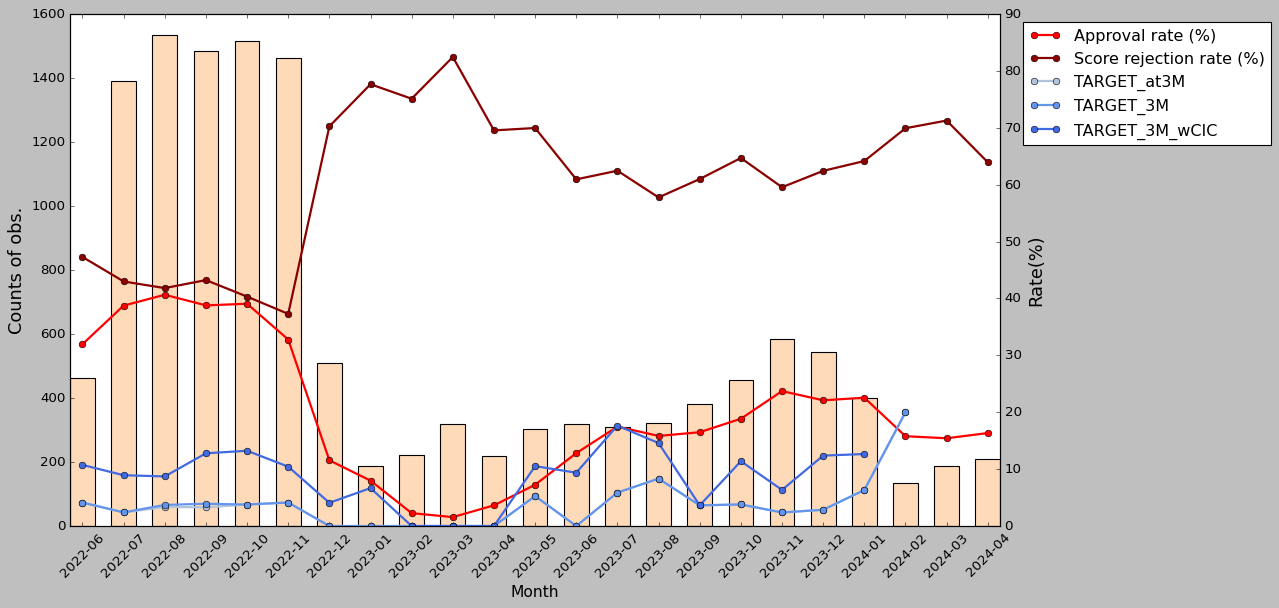

In [84]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [85]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2022-06           463             148              219     701.883369   
2022-07          1391             539              598     717.826024   
2022-08          1535             624              642     719.540065   
2022-09          1485             576              642     716.367003   
2022-10          1515             592              611     723.886469   
2022-11          1464             480              546     737.792350   
2022-12           511              59              359     736.485323   
2023-01           188              15              146     734.994681   
2023-02           221               5              166     728.841629   
2023-03           319               5              263     714.620690   
2023-04           220               8              153     734.800000   
2023-05           303              22              212     736.963696   
2023-06           320              41              195     745.153125   
2023-07           309              54              193     732.543689   
2023-08           322              51              186     740.524845   
2023-09           382              63              233     735.060209   
2023-10           456              86              295     731.357456   
2023-11           586             139              349     739.162116   
2023-12           543             120              339     735.421731   
2024-01           399              90              256     731.696742   
2024-02           133              21               93     729.421053   
2024-03           188              29              134     723.382979   
2024-04           208              34              133     732.548077   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2022-06                707.928726      13.695464             204   
2022-07                716.955428       1.120776             118   
2022-08                718.351792       1.560912             165   
2022-09                715.571044       1.089562             125   
2022-10                723.007921       1.221782             152   
2022-11                718.045082      20.241803             917   
2022-12                712.516634      24.187867             387   
2023-01                710.893617      24.569149             143   
2023-02                710.647059      20.764706             199   
2023-03                710.338558       4.332288              42   
2023-04                710.309091      24.490909             165   
2023-05                713.693069      23.323432             228   
2023-06                726.450000      18.753125             208   
2023-07                728.948220       3.647249              48   
2023-08                732.208075       8.701863             108   
2023-09                730.649215       4.515707              73   
2023-10                727.717105       3.771930              74   
2023-11                736.064957       3.358974              85   
2023-12                732.508287       2.928177              66   
2024-01                728.002506       3.714286              62   
2024-02                725.406015       4.015038              20   
2024-03                719.781915       3.601064              24   
2024-04                727.193237       4.980676              39   

                Mismatch_rate  
Received_Month                 
2022-06             44.060475  
2022-07              8.483106  
2022-08             10.749186  
2022-09              8.417508  
2022-10             10.033003  
2022-11             62.636612  
2022-12             75.733855  
2023-01             76.063830  
2023-02             90.045249  
2023-03             13.166144  
2023-04             75.000000  
2023-05             75.247525  
2023-06             65.000000  
2023-07  

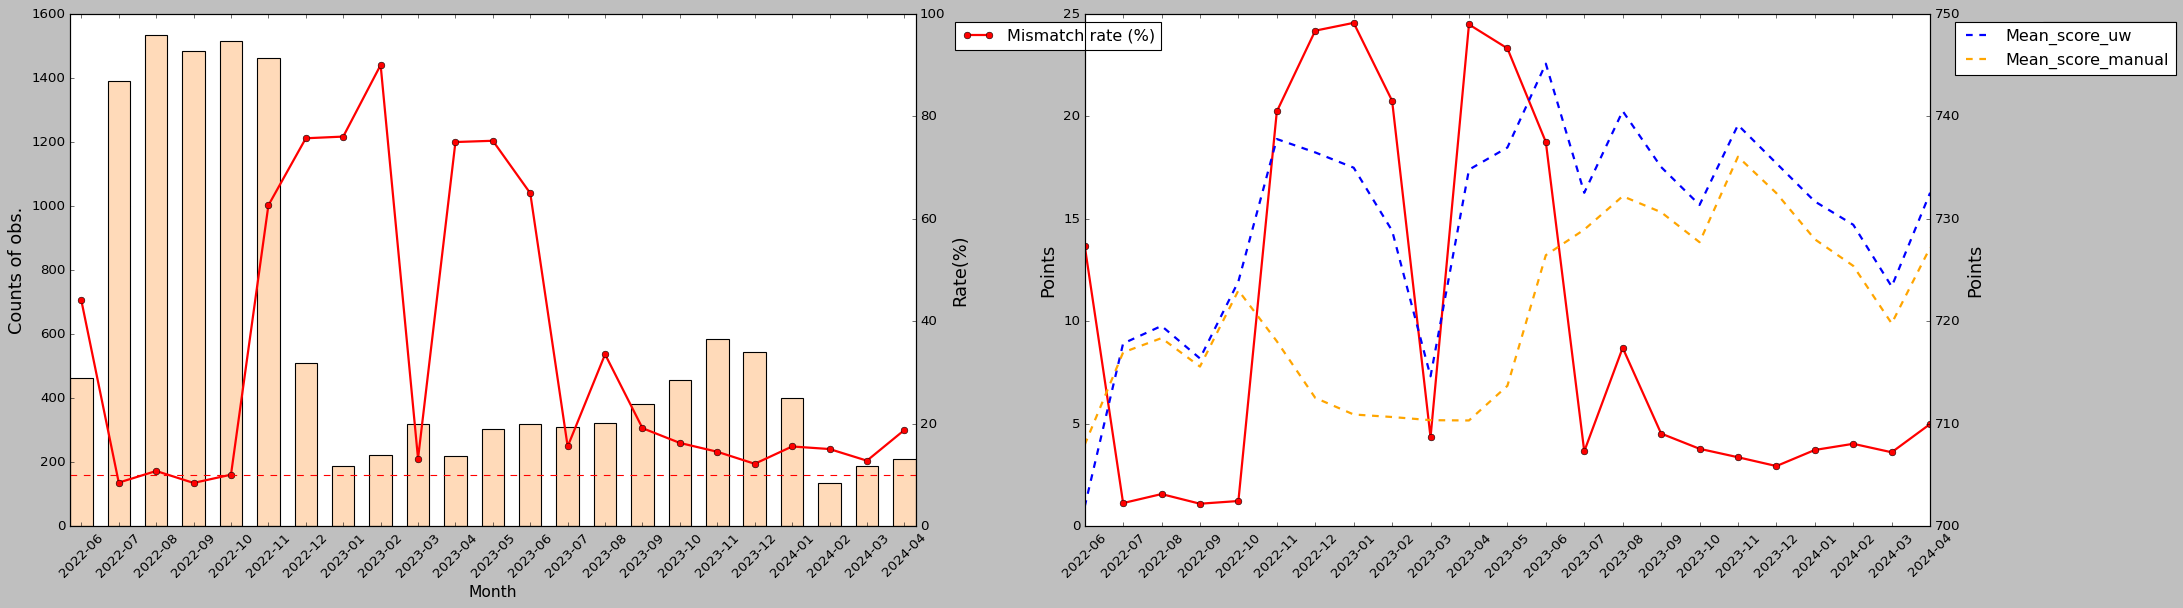

In [86]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [87]:
score_monitoring_segments.append(sc_monitoring_segment)

## AN062022

### ExpressCard

#### Performance check (KRI1)

In [88]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'AN062022',
    score_type_filter = '12. AN062022',
    product_segment = 'ExpressCard',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/an062022.csv',
    sc_script_score_colname = 'SC_AN062022',
    warnings = []
)

In [89]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                            
2022-06           638.0  704.084639               123.0            12.0   
2022-07          2107.0  709.087328               407.0            33.0   
2022-08          2410.0  712.711618               544.0            57.0   
2022-09          2373.0  714.761905               525.0            46.0   
2022-10          2455.0  718.829328               600.0            67.0   
2022-11          1005.0  708.926368               141.0             8.0   
2022-12           321.0  706.021807                 6.0             0.0   
2023-01           137.0  716.175182                 0.0             0.0   
2023-02           121.0  719.289256                 0.0             0.0   
2023-03           104.0  717.250000                 1.0             0.0   
2023-04           109.0  707.788991                 2.0             0.0   
2023-05            96.0  703.458333                 0.0             0.0   
2023-06           120.0  713.800000                 2.0             0.0   
2023-07           141.0  715.822695                11.0             2.0   
2023-08           116.0  711.043103                 9.0             1.0   
2023-09            74.0  707.175676                 7.0             1.0   
2023-10           169.0  708.213018                21.0             2.0   
2023-11           290.0  708.568966                28.0             1.0   
2023-12           325.0  709.215385                36.0             2.0   
2024-01           276.0  708.565217                35.0             2.0   
2024-02            63.0  716.333333                 0.0             0.0   
2024-03           127.0  696.716535                 0.0             0.0   
2024-04           159.0  728.672956                 0.0             0.0   
All             13736.0  477.583242              2498.0           234.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-06                   38.513514          42.567568               118.0   
2022-07                   21.576730          30.392157               401.0   
2022-08                   15.742642          19.993516               540.0   
2022-09                   30.670782          26.386494               519.0   
2022-10                   17.316793          15.779452               580.0   
2022-11                   19.360902          29.229323               132.0   
2022-12                         NaN                NaN                 6.0   
2023-01                         NaN                NaN                 0.0   
2023-02                         NaN                NaN                 0.0   
2023-03                         NaN                NaN                 1.0   
2023-04                         NaN                NaN                 2.0   
2023-05                         NaN                NaN                 0.0   
2023-06                         NaN                NaN                 2.0   
2023-07                   11.111111          33.333333                11.0   
2023-08                  100.000000         100.000000                 9.0   
2023-09                   33.333333          66.666667                 6.0   
2023-10                  -36.842105          63.157895                14.0   
2023-11                  100.000000         100.000000                 0.0   
2023-12                   41.176471          55.882353                 0.0   
2024-01                   -0.000000          36.363636                 0.0   
2024-02                         NaN                NaN                 0.0   
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                       22.075368          17.305050              2341.0   

                TARGET_6M_wCIC  Gini T

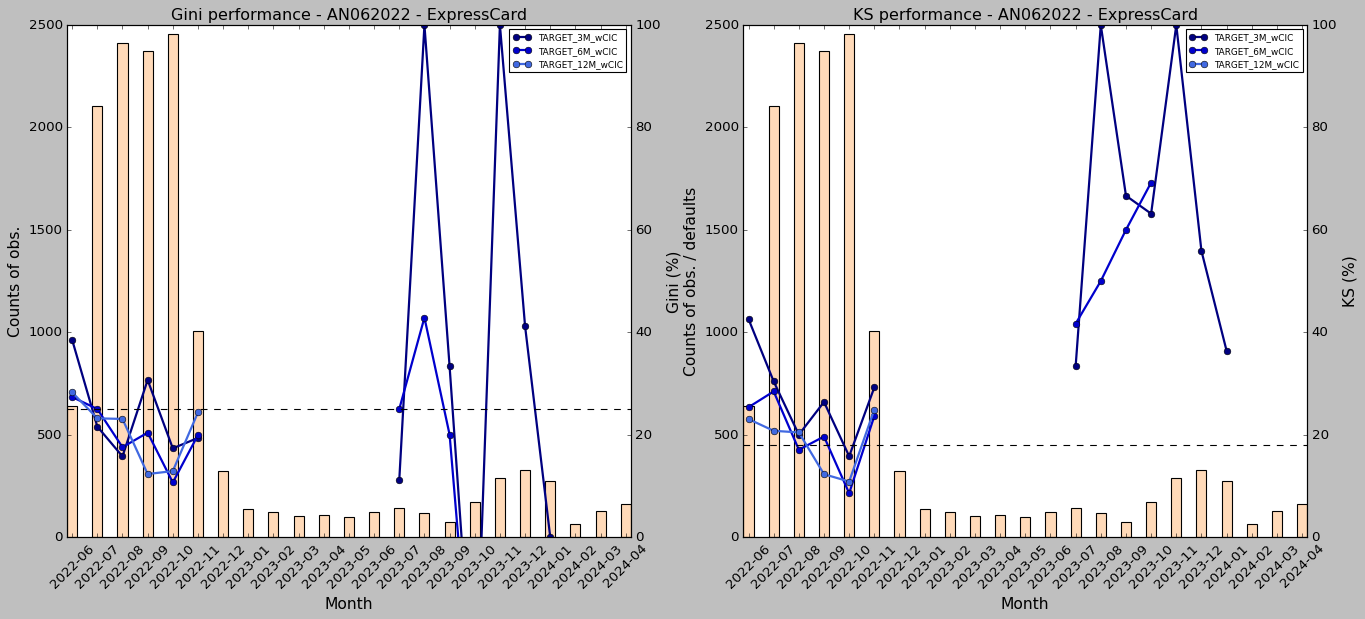

In [90]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [91]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

39.57446808510638

#### Stability check (KRI2)

In [92]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean   mr  (-inf, 634.0]  (634.0, 656.0]  \
Received_Month                                                          
2022-06           638  704.084639  0.0       0.130094        0.081505   
2022-07          2107  709.087328  0.0       0.098244        0.080683   
2022-08          2410  712.711618  0.0       0.088382        0.078838   
2022-09          2373  714.761905  0.0       0.088496        0.078803   
2022-10          2455  718.829328  0.0       0.071283        0.065580   
2022-11          1005  708.926368  0.0       0.117413        0.079602   
2022-12           321  706.021807  0.0       0.109034        0.105919   
2023-01           137  716.175182  0.0       0.094891        0.080292   
2023-02           121  719.289256  0.0       0.016529        0.107438   
2023-03           104  717.250000  0.0       0.125000        0.038462   
2023-04           109  707.788991  0.0       0.110092        0.082569   
2023-05            96  703.458333  0.0       0.135417        0.093750   
2023-06           120  713.800000  0.0       0.083333        0.133333   
2023-07           141  715.822695  0.0       0.085106        0.063830   
2023-08           116  711.043103  0.0       0.094828        0.060345   
2023-09            74  707.175676  0.0       0.108108        0.135135   
2023-10           169  708.213018  0.0       0.088757        0.118343   
2023-11           290  708.568966  0.0       0.124138        0.113793   
2023-12           325  709.215385  0.0       0.092308        0.120000   
2024-01           276  708.565217  0.0       0.101449        0.097826   
2024-02            63  716.333333  0.0       0.031746        0.111111   
2024-03           127  696.716535  0.0       0.133858        0.094488   
2024-04           159  728.672956  0.0       0.062893        0.062893   

                (656.0, 671.0]  (671.0, 683.0]  (683.0, 694.0]  \
Received_Month                                                   
2022-06               0.076803        0.090909        0.068966   
2022-07               0.079260        0.073090        0.078785   
2022-08               0.077178        0.070124        0.067635   
2022-09               0.067004        0.067847        0.076275   
2022-10               0.070468        0.065173        0.072912   
2022-11               0.062687        0.044776        0.061692   
2022-12               0.077882        0.065421        0.074766   
2023-01               0.051095        0.043796        0.072993   
2023-02               0.082645        0.057851        0.041322   
2023-03               0.067308        0.019231        0.067308   
2023-04               0.064220        0.091743        0.082569   
2023-05               0.104167        0.020833        0.052083   
2023-06               0.025000        0.066667        0.083333   
2023-07               0.092199        0.063830        0.049645   
2023-08               0.077586        0.051724        0.068966   
2023-09               0.067568        0.081081        0.054054   
2023-10               0.088757        0.094675        0.029586   
2023-11               0.082759        0.055172        0.089655   
2023-12               0.080000        0.076923        0.080000   
2024-01               0.068841        0.072464        0.076087   
2024-02               0.158730        0.063492        0.079365   
2024-03               0.133858        0.133858        0.055118   
2024-04               0.050314        0.069182        0.062893   

                (694.0, 702.0]  (702.0, 711.0]  (711.0, 719.0]  \
Received_Month                                                   
2022-06               0.065831        0.073668        0.047022   
2022-07               0.064547        0.091599        0.053156   
2022-08               0.064730        0.087552        0.052697   
2022-09               0.065318        0.080910        0.053940   
2022-10               0.052138        0.075356        0.056212   
2022-11               0.063682        0.069652        0.055721   
2022-12    

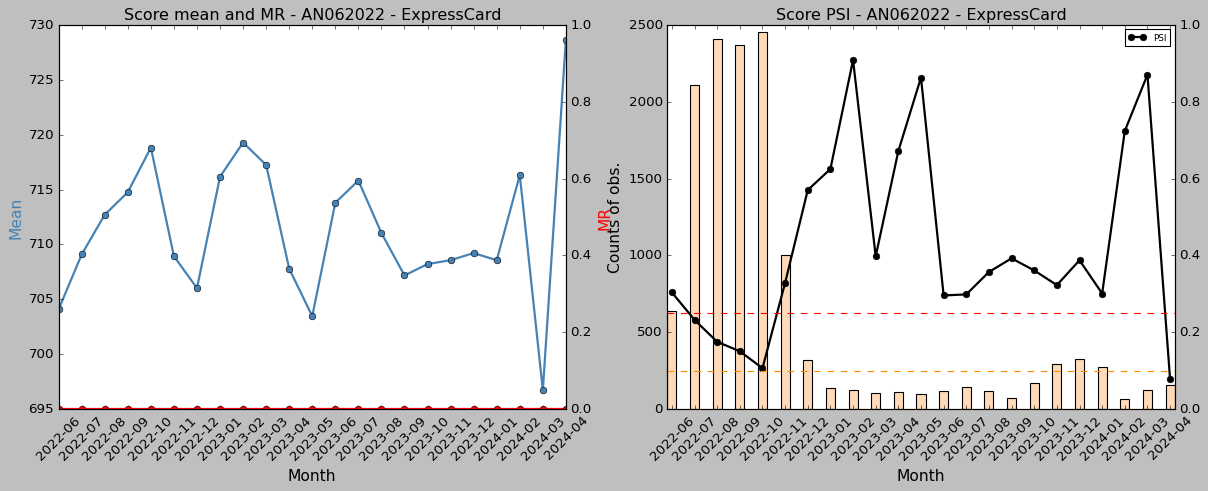

In [93]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [94]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-06           638             137              350          123.0   
2022-07          2107             460             1245          407.0   
2022-08          2410             602             1343          544.0   
2022-09          2373             597             1286          525.0   
2022-10          2455             644             1263          600.0   
2022-11          1005             146              596          141.0   
2022-12           321               7              253            6.0   
2023-01           137               0              101            0.0   
2023-02           121               0               97            0.0   
2023-03           104               1               80            1.0   
2023-04           109               3               79            2.0   
2023-05            96               0               68            0.0   
2023-06           120               2               70            2.0   
2023-07           141              14               87           11.0   
2023-08           116               9               78            9.0   
2023-09            74              10               51            7.0   
2023-10           169              22              119           21.0   
2023-11           290              32              197           28.0   
2023-12           325              39              236           36.0   
2024-01           276              40              198           35.0   
2024-02            63              10               43            3.0   
2024-03           127               6              101            0.0   
2024-04           159              31               92            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-06                      123.0            12.0        7.0          7.0   
2022-07                      407.0            33.0       21.0         17.0   
2022-08                      544.0            57.0       41.0         36.0   
2022-09                      525.0            46.0       31.0         28.0   
2022-10                      600.0            67.0       42.0         41.0   
2022-11                      141.0             8.0        6.0          6.0   
2022-12                        6.0             0.0        0.0          0.0   
2023-01                        0.0             0.0        0.0          0.0   
2023-02                        0.0             0.0        0.0          0.0   
2023-03                        1.0             0.0        0.0          0.0   
2023-04                        2.0             0.0        0.0          0.0   
2023-05                        0.0             0.0        0.0          0.0   
2023-06                        2.0             0.0        0.0          0.0   
2023-07                       11.0             2.0        2.0          1.0   
2023-08                        9.0             1.0        1.0          1.0   
2023-09                        7.0             1.0        0.0          0.0   
2023-10                       21.0             2.0        2.0          2.0   
2023-11                       28.0             1.0        0.0          0.0   
2023-12                       36.0             2.0        2.0          2.0   
2024-01                       35.0             2.0        2.0          2.0   
2024-02                        0.0             0.0        0.0          0.0   
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-06                 123.0               123.0             6.0        0.0   

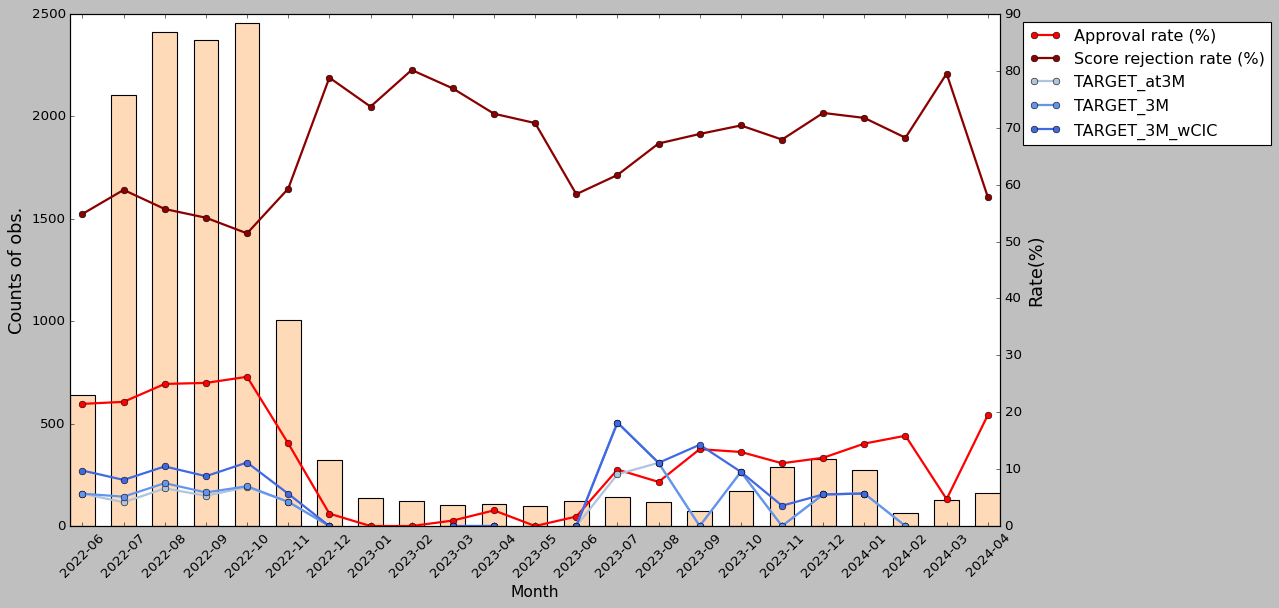

In [95]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [96]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2022-06           638             137              350     704.084639   
2022-07          2107             460             1245     709.087328   
2022-08          2410             602             1343     712.711618   
2022-09          2373             597             1286     714.761905   
2022-10          2455             644             1263     718.829328   
2022-11          1005             146              596     708.926368   
2022-12           321               7              253     706.021807   
2023-01           137               0              101     716.175182   
2023-02           121               0               97     719.289256   
2023-03           104               1               80     717.250000   
2023-04           109               3               79     707.788991   
2023-05            96               0               68     703.458333   
2023-06           120               2               70     713.800000   
2023-07           141              14               87     715.822695   
2023-08           116               9               78     711.043103   
2023-09            74              10               51     707.175676   
2023-10           169              22              119     708.213018   
2023-11           290              32              197     708.568966   
2023-12           325              39              236     709.215385   
2024-01           276              40              198     708.565217   
2024-02            63              10               43     716.333333   
2024-03           127               6              101     696.716535   
2024-04           159              31               92     728.672956   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2022-06                706.675549       6.390282             181   
2022-07                709.350261       2.560987             319   
2022-08                712.522407       2.874689             399   
2022-09                714.981879       2.220818             378   
2022-10                717.659063       3.009776             432   
2022-11                720.438806      18.306468             696   
2022-12                720.968847      21.931464             260   
2023-01                722.350365      29.284672             118   
2023-02                734.041322      30.933884             109   
2023-03                716.269231      14.634615              37   
2023-04                714.917431      25.825688              86   
2023-05                709.395833      24.125000              80   
2023-06                716.716667      20.233333              83   
2023-07                720.801418       6.439716              58   
2023-08                718.344828      12.422414              62   
2023-09                706.986486      12.594595              32   
2023-10                708.988166       7.710059              68   
2023-11                708.644828       8.731034             110   
2023-12                711.440000       7.683077             114   
2024-01                711.137681       9.355072             113   
2024-02                718.904762      15.269841              27   
2024-03                700.700787       9.149606              51   
2024-04                728.679245      10.194969              59   

                Mismatch_rate  
Received_Month                 
2022-06             28.369906  
2022-07             15.140009  
2022-08             16.556017  
2022-09             15.929204  
2022-10             17.596741  
2022-11             69.253731  
2022-12             80.996885  
2023-01             86.131387  
2023-02             90.082645  
2023-03             35.576923  
2023-04             78.899083  
2023-05             83.333333  
2023-06             69.166667  
2023-07  

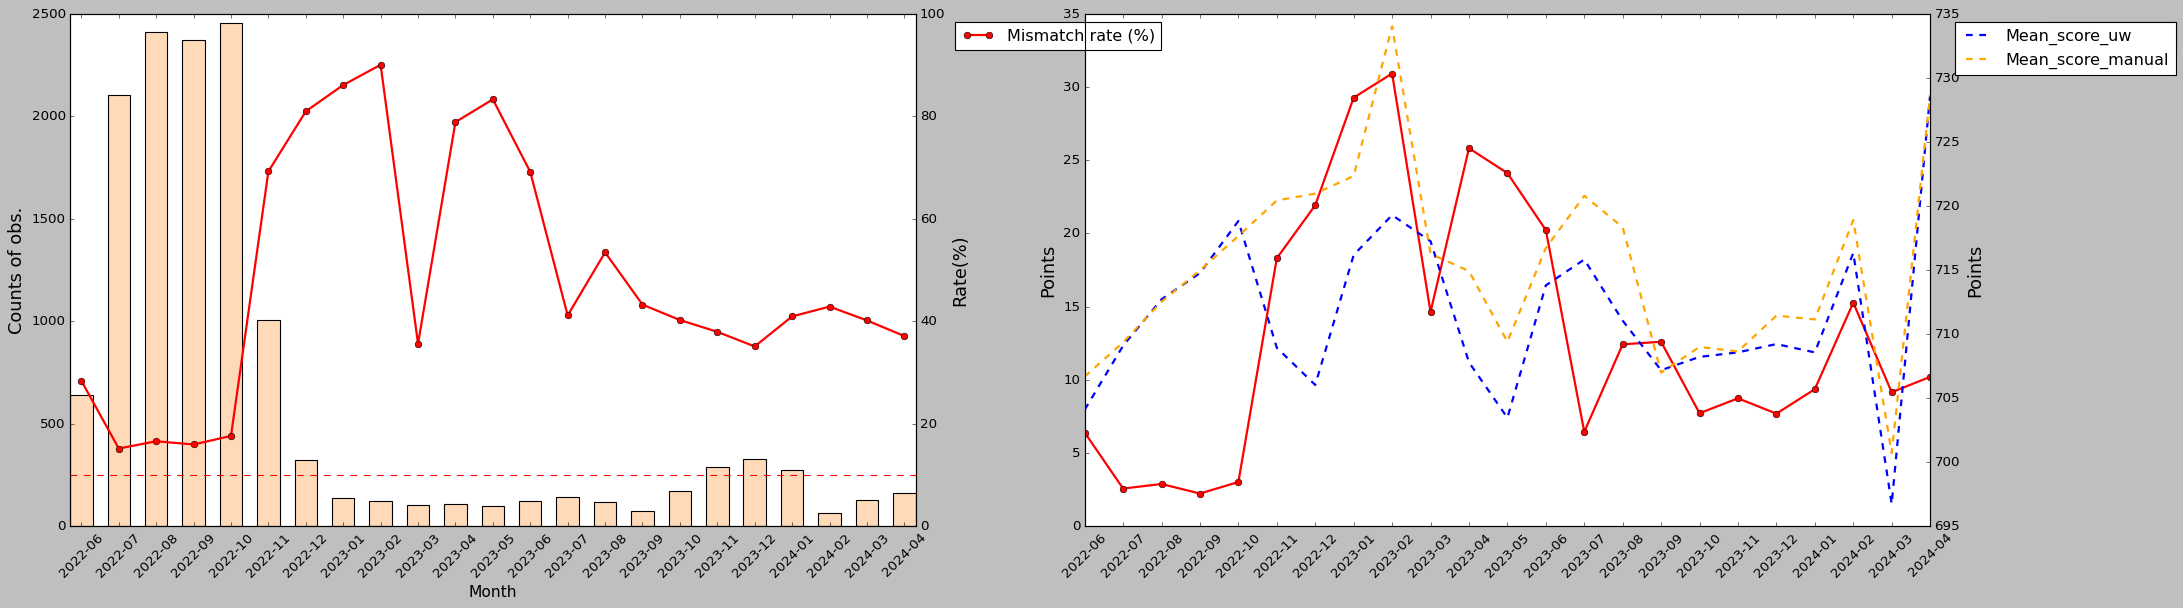

In [97]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [98]:
score_monitoring_segments.append(sc_monitoring_segment)

### SALARYCARD

#### Performance check (KRI1)

In [99]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'AN062022',
    score_type_filter = '12. AN062022',
    product_segment = 'SALARYCARD',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/an062022.csv',
    sc_script_score_colname = 'SC_AN062022',
    warnings = []
)

In [100]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                           
2022-06           99.0  706.060606                23.0             0.0   
2022-07          314.0  717.047771                86.0            11.0   
2022-08          373.0  716.517426               101.0             7.0   
2022-09          322.0  716.565217                86.0            11.0   
2022-10          315.0  721.447619                90.0            10.0   
2022-11          373.0  718.222520                92.0             8.0   
2022-12          143.0  724.223776                 4.0             0.0   
2023-01           61.0  724.933333                 0.0             0.0   
2023-02           72.0  729.069444                 0.0             0.0   
2023-03           97.0  735.711340                 2.0             0.0   
2023-04           55.0  724.890909                 2.0             0.0   
2023-05           83.0  719.012048                 1.0             0.0   
2023-06          104.0  722.500000                 3.0             0.0   
2023-07          103.0  716.116505                 8.0             0.0   
2023-08          129.0  718.062016                 9.0             0.0   
2023-09          117.0  724.538462                11.0             1.0   
2023-10          190.0  720.336842                 7.0             0.0   
2023-11          167.0  727.125749                15.0             2.0   
2023-12          183.0  723.469945                18.0             0.0   
2024-01          136.0  721.411765                 9.0             3.0   
2024-02           42.0  723.595238                 0.0             0.0   
2024-03           71.0  737.422535                 0.0             0.0   
2024-04           65.0  720.876923                 0.0             0.0   
All             3614.0  477.583242               567.0            53.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-06                         NaN                NaN                23.0   
2022-07                   24.848485          36.000000                83.0   
2022-08                   -5.927052          23.404255               100.0   
2022-09                   28.121212          36.484848                81.0   
2022-10                   65.500000          53.750000                86.0   
2022-11                   33.333333          39.880952                87.0   
2022-12                         NaN                NaN                 4.0   
2023-01                         NaN                NaN                 0.0   
2023-02                         NaN                NaN                 0.0   
2023-03                         NaN                NaN                 2.0   
2023-04                         NaN                NaN                 2.0   
2023-05                         NaN                NaN                 1.0   
2023-06                         NaN                NaN                 3.0   
2023-07                         NaN                NaN                 6.0   
2023-08                         NaN                NaN                 8.0   
2023-09                   20.000000          60.000000                 8.0   
2023-10                         NaN                NaN                 7.0   
2023-11                   11.538462          30.769231                 0.0   
2023-12                         NaN                NaN                 0.0   
2024-01                  -22.222222          33.333333                 0.0   
2024-02                         NaN                NaN                 0.0   
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                       28.841495          27.630130               501.0   

                TARGET_6M_wCIC  Gini TARGET_6M_wCIC  KS TARGET_

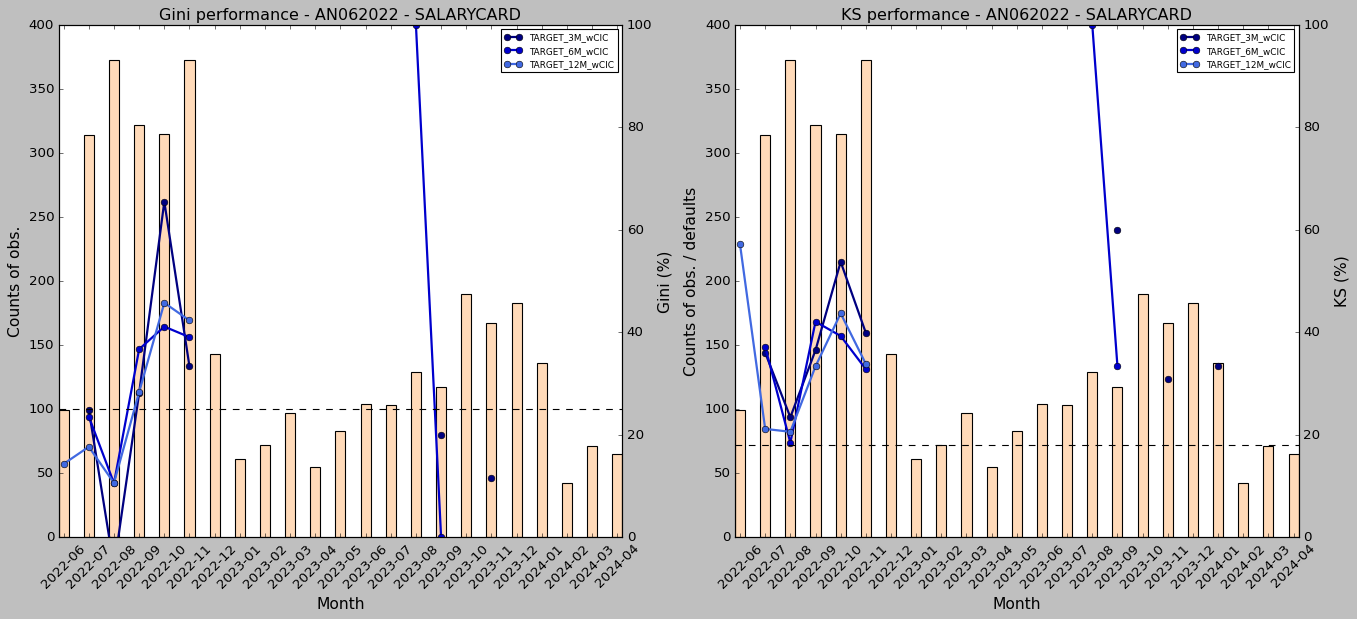

In [101]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [102]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

27.027027027027028

#### Stability check (KRI2)

In [103]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean        mr  (-inf, 634.0]  (634.0, 656.0]  \
Received_Month                                                               
2022-06            99  706.060606  0.000000       0.151515        0.090909   
2022-07           314  717.047771  0.000000       0.095541        0.066879   
2022-08           373  716.517426  0.000000       0.085791        0.096515   
2022-09           322  716.565217  0.000000       0.080745        0.077640   
2022-10           315  721.447619  0.000000       0.069841        0.073016   
2022-11           373  718.222520  0.000000       0.112601        0.058981   
2022-12           143  724.223776  0.000000       0.076923        0.083916   
2023-01            61  724.933333  0.016393       0.066667        0.066667   
2023-02            72  729.069444  0.000000       0.055556        0.069444   
2023-03            97  735.711340  0.000000       0.030928        0.082474   
2023-04            55  724.890909  0.000000       0.090909        0.072727   
2023-05            83  719.012048  0.000000       0.072289        0.144578   
2023-06           104  722.500000  0.000000       0.086538        0.067308   
2023-07           103  716.116505  0.000000       0.077670        0.097087   
2023-08           129  718.062016  0.000000       0.085271        0.100775   
2023-09           117  724.538462  0.000000       0.119658        0.085470   
2023-10           190  720.336842  0.000000       0.078947        0.073684   
2023-11           167  727.125749  0.000000       0.065868        0.071856   
2023-12           183  723.469945  0.000000       0.054645        0.103825   
2024-01           136  721.411765  0.000000       0.051471        0.110294   
2024-02            42  723.595238  0.000000       0.023810        0.119048   
2024-03            71  737.422535  0.000000       0.056338        0.056338   
2024-04            65  720.876923  0.000000       0.092308        0.107692   

                (656.0, 671.0]  (671.0, 683.0]  (683.0, 694.0]  \
Received_Month                                                   
2022-06               0.101010        0.070707        0.040404   
2022-07               0.079618        0.089172        0.044586   
2022-08               0.077748        0.064343        0.067024   
2022-09               0.043478        0.102484        0.083851   
2022-10               0.053968        0.066667        0.063492   
2022-11               0.058981        0.045576        0.053619   
2022-12               0.055944        0.041958        0.062937   
2023-01               0.066667        0.050000        0.066667   
2023-02               0.000000        0.027778        0.041667   
2023-03               0.051546        0.030928        0.082474   
2023-04               0.090909        0.018182        0.072727   
2023-05               0.060241        0.048193        0.072289   
2023-06               0.096154        0.019231        0.048077   
2023-07               0.067961        0.077670        0.038835   
2023-08               0.077519        0.046512        0.046512   
2023-09               0.085470        0.094017        0.034188   
2023-10               0.036842        0.084211        0.084211   
2023-11               0.071856        0.077844        0.041916   
2023-12               0.071038        0.081967        0.032787   
2024-01               0.080882        0.088235        0.066176   
2024-02               0.071429        0.071429        0.047619   
2024-03               0.042254        0.070423        0.028169   
2024-04               0.046154        0.030769        0.046154   

                (694.0, 702.0]  (702.0, 711.0]  (711.0, 719.0]  \
Received_Month                                                   
2022-06               0.050505        0.010101        0.020202   
2022-07               0.038217        0.098726        0.044586   
2022-08               0.034853        0.088472        0.037534   
2022-09               0.065217        0.093168        0.040373   
2022-10           

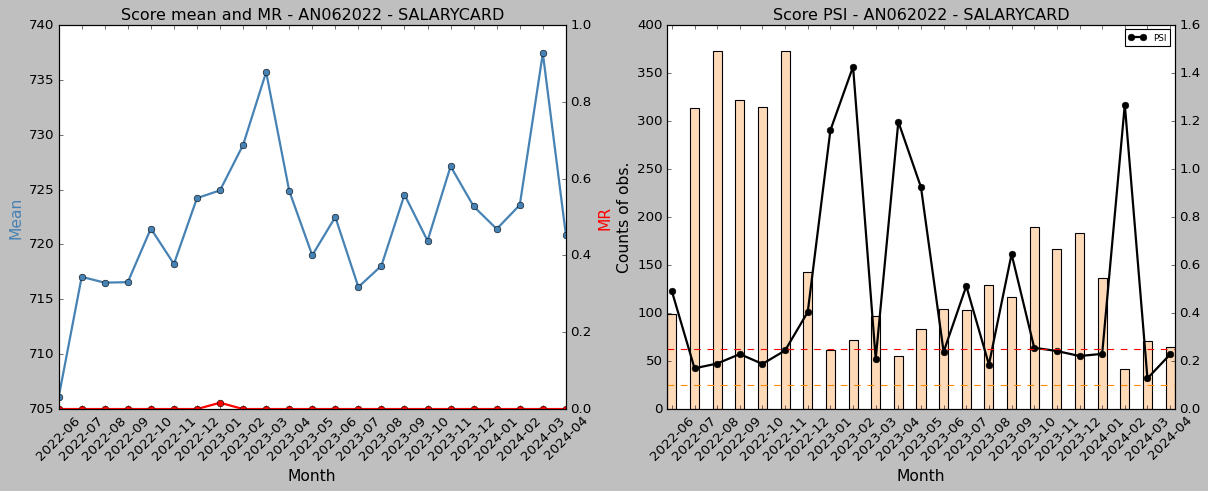

In [104]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [105]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-06            99              27               47           23.0   
2022-07           314             101              168           86.0   
2022-08           373             118              197          101.0   
2022-09           322              96              181           86.0   
2022-10           315             100              149           90.0   
2022-11           373              96              193           92.0   
2022-12           143               4              112            4.0   
2023-01            61               0               38            0.0   
2023-02            72               0               54            0.0   
2023-03            97               2               65            2.0   
2023-04            55               2               35            2.0   
2023-05            83               2               55            1.0   
2023-06           104               3               77            3.0   
2023-07           103               9               83            8.0   
2023-08           129              11               96            9.0   
2023-09           117              13               86           11.0   
2023-10           190               9              140            7.0   
2023-11           167              17              122           15.0   
2023-12           183              20              136           18.0   
2024-01           136              15              100           10.0   
2024-02            42               1               30            0.0   
2024-03            71               9               44            0.0   
2024-04            65               5               45            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-06                       23.0             0.0        0.0          0.0   
2022-07                       86.0            11.0        9.0          9.0   
2022-08                      101.0             7.0        4.0          3.0   
2022-09                       86.0            11.0        4.0          4.0   
2022-10                       90.0            10.0        5.0          5.0   
2022-11                       92.0             8.0        4.0          4.0   
2022-12                        4.0             0.0        0.0          0.0   
2023-01                        0.0             0.0        0.0          0.0   
2023-02                        0.0             0.0        0.0          0.0   
2023-03                        2.0             0.0        0.0          0.0   
2023-04                        2.0             0.0        0.0          0.0   
2023-05                        1.0             0.0        0.0          0.0   
2023-06                        3.0             0.0        0.0          0.0   
2023-07                        8.0             0.0        0.0          0.0   
2023-08                        9.0             0.0        0.0          0.0   
2023-09                       11.0             1.0        1.0          1.0   
2023-10                        7.0             0.0        0.0          0.0   
2023-11                       15.0             2.0        1.0          1.0   
2023-12                       18.0             0.0        0.0          0.0   
2024-01                        9.0             3.0        2.0          2.0   
2024-02                        0.0             0.0        0.0          0.0   
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-06                  24.0                24.0             0.0        0.0   

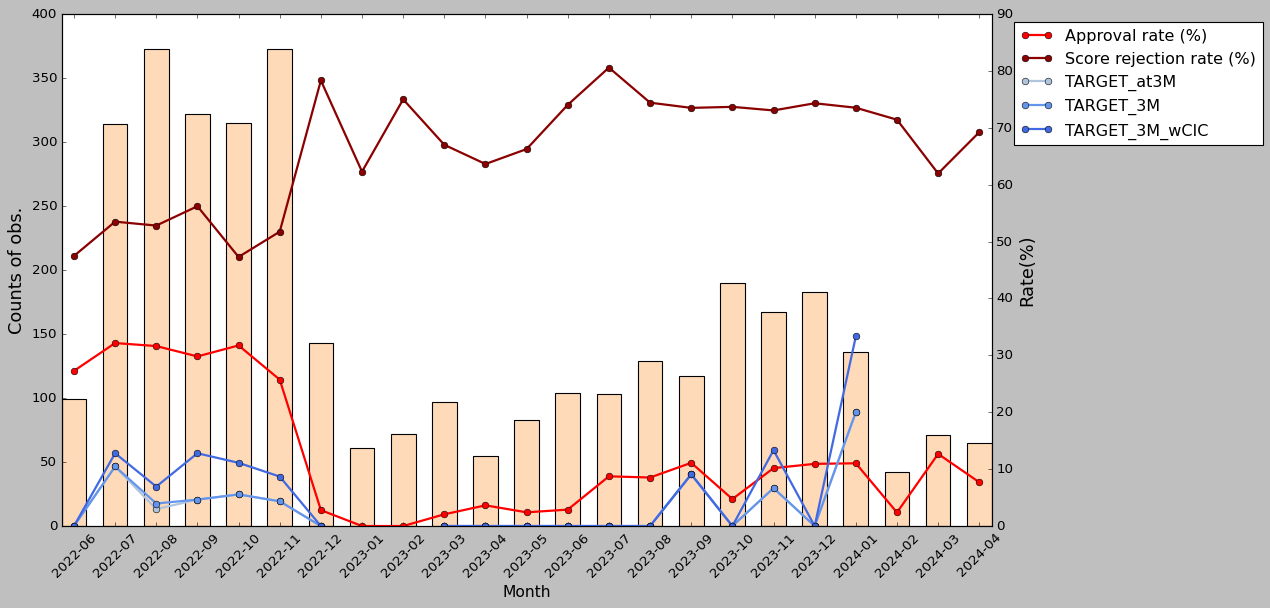

In [106]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [107]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2022-06            99              27               47     706.060606   
2022-07           314             101              168     717.047771   
2022-08           373             118              197     716.517426   
2022-09           322              96              181     716.565217   
2022-10           315             100              149     721.447619   
2022-11           373              96              193     718.222520   
2022-12           143               4              112     724.223776   
2023-01            60               0               38     724.933333   
2023-02            72               0               54     729.069444   
2023-03            97               2               65     735.711340   
2023-04            55               2               35     724.890909   
2023-05            83               2               55     719.012048   
2023-06           104               3               77     722.500000   
2023-07           103               9               83     716.116505   
2023-08           129              11               96     718.062016   
2023-09           117              13               86     724.538462   
2023-10           190               9              140     720.336842   
2023-11           167              17              122     727.125749   
2023-12           183              20              136     723.469945   
2024-01           136              15              100     721.411765   
2024-02            42               1               30     723.595238   
2024-03            71               9               44     737.422535   
2024-04            65               5               45     720.876923   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2022-06                709.818182       6.787879              30   
2022-07                716.299363       2.882166              45   
2022-08                716.166220       3.852547              72   
2022-09                716.627329       2.496894              50   
2022-10                720.330159       3.784127              54   
2022-11                727.742627      16.951743             273   
2022-12                734.041958      23.104895             110   
2023-01                730.216667      20.083333              39   
2023-02                737.819444      34.805556              68   
2023-03                724.340206      18.422680              31   
2023-04                731.963636      26.236364              39   
2023-05                730.457831      20.843373              64   
2023-06                726.951923      20.028846              67   
2023-07                717.699029       7.563107              31   
2023-08                721.813953      10.108527              58   
2023-09                722.367521       8.888889              43   
2023-10                722.315789       8.610526              76   
2023-11                727.119760       8.916168              59   
2023-12                723.426230       7.431694              57   
2024-01                721.808824      10.382353              53   
2024-02                723.452381      14.047619              18   
2024-03                731.197183      12.225352              24   
2024-04                721.046154       7.246154              18   

                Mismatch_rate  
Received_Month                 
2022-06             30.303030  
2022-07             14.331210  
2022-08             19.302949  
2022-09             15.527950  
2022-10             17.142857  
2022-11             73.190349  
2022-12             76.923077  
2023-01             65.000000  
2023-02             94.444444  
2023-03             31.958763  
2023-04             70.909091  
2023-05             77.108434  
2023-06             64.423077  
2023-07  

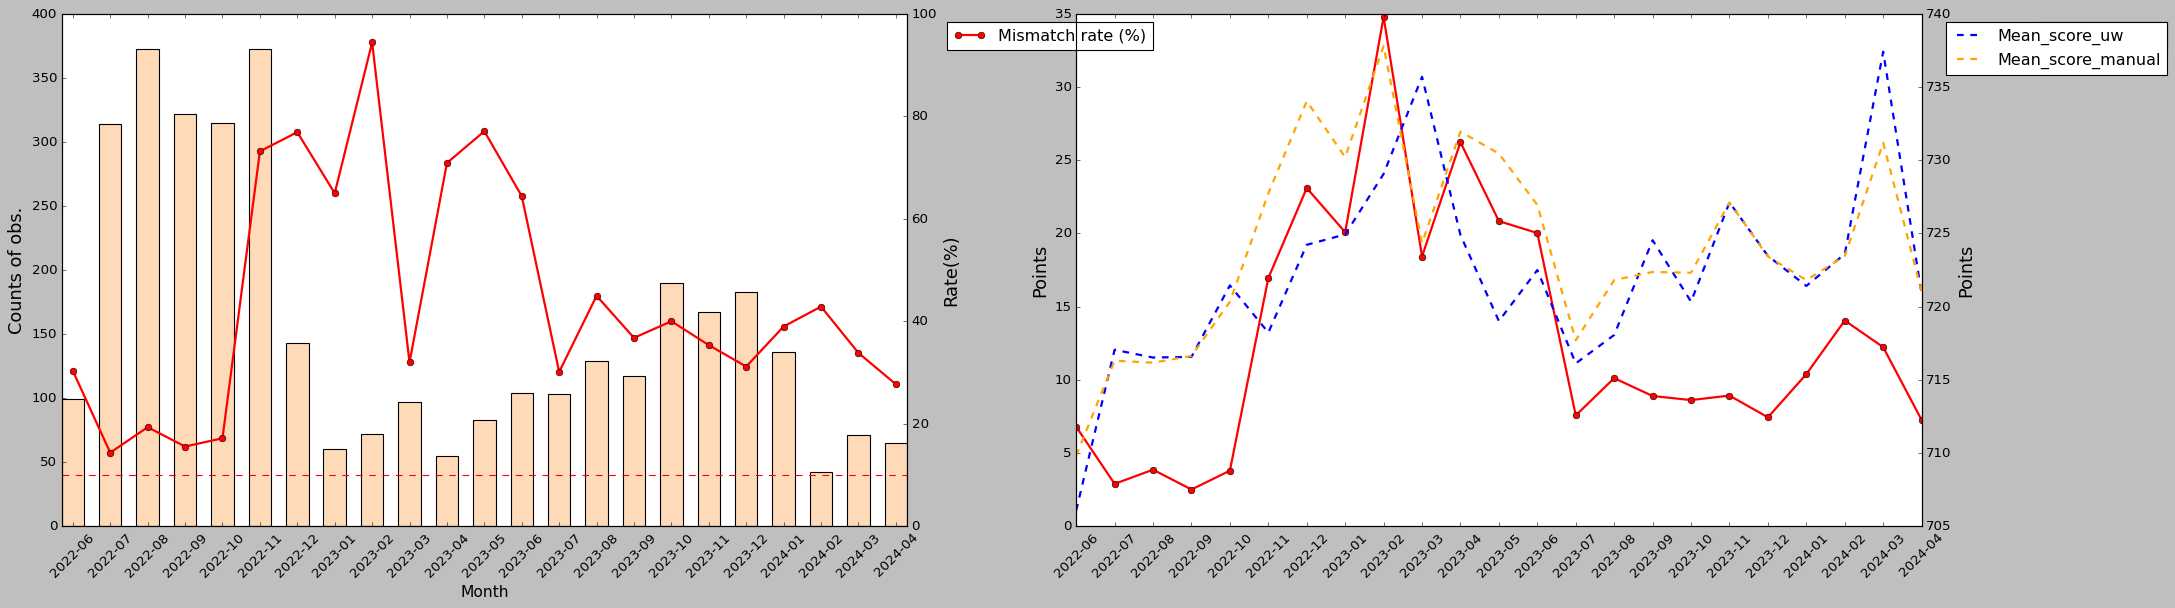

In [108]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [109]:
score_monitoring_segments.append(sc_monitoring_segment)

## 202009AEMPLOYEE	

### StateCard

#### Performance check (KRI1)

In [110]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = '202009AEMPLOYEE',
    score_type_filter = '5. 202009AEMPLOYEE',
    product_segment = 'StateCard',
    sc_script_data_path = None,
    sc_script_score_colname = None,
    warnings = []
)

In [111]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                            
2022-06           730.0  705.602941               431.0            38.0   
2022-07           960.0  704.531111               580.0            51.0   
2022-08          1673.0  729.980601              1016.0            69.0   
2022-09          1573.0  726.109699               930.0            81.0   
2022-10          1600.0  670.566967               784.0            73.0   
2022-11          1056.0  651.110403               466.0            48.0   
2022-12          1126.0  698.536489               541.0            31.0   
2023-01           446.0  716.013477               166.0            12.0   
2023-02           373.0  669.076046                78.0             8.0   
2023-03           533.0  660.037783               143.0            12.0   
2023-04           404.0  681.346278               124.0            17.0   
2023-05           467.0  664.695055               135.0            14.0   
2023-06           498.0  668.046243               119.0             9.0   
2023-07           342.0  656.351695                85.0             8.0   
2023-08           321.0  694.575893                76.0             5.0   
2023-09           172.0  617.658730                42.0             4.0   
2023-10           301.0  675.958716                84.0             6.0   
2023-11           487.0  683.570997               155.0             5.0   
2023-12          1634.0  759.404255               541.0            19.0   
2024-01          1061.0  748.653179               345.0            16.0   
2024-02           222.0  715.539773                 0.0             0.0   
All             15979.0  477.583242              6841.0           526.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-06                    4.164993          10.164725               417.0   
2022-07                   24.185478          20.686460               562.0   
2022-08                   20.859159          19.708308               977.0   
2022-09                   20.090448          20.403089               873.0   
2022-10                   16.349729          13.307516               735.0   
2022-11                   19.268341          20.115630               424.0   
2022-12                   -0.493359           8.861480               465.0   
2023-01                   38.041126          29.437229               151.0   
2023-02                   10.000000          24.642857                70.0   
2023-03                   31.743003          33.206107               122.0   
2023-04                   16.602529          19.186366               112.0   
2023-05                   23.376623          26.623377               122.0   
2023-06                   35.656566          31.717172               109.0   
2023-07                  -35.876623          43.344156                75.0   
2023-08                   14.084507          34.647887                70.0   
2023-09                  -12.500000          30.263158                38.0   
2023-10                    6.837607          21.794872                77.0   
2023-11                   23.200000          36.000000                 0.0   
2023-12                   21.818915          28.201250                 0.0   
2024-01                   12.215046          21.637538                 0.0   
2024-02                         NaN                NaN                 0.0   
All                       18.157715          13.384843              5399.0   

                TARGET_6M_wCIC  Gini TARGET_6M_wCIC  KS TARGET_6M_wCIC  \
Received_Month                                                           
2022-06                   74.0             7.182255           9.128516   
2022-07                   94.0            15.507365          14.279869   
2022-08                  139.0            19.123

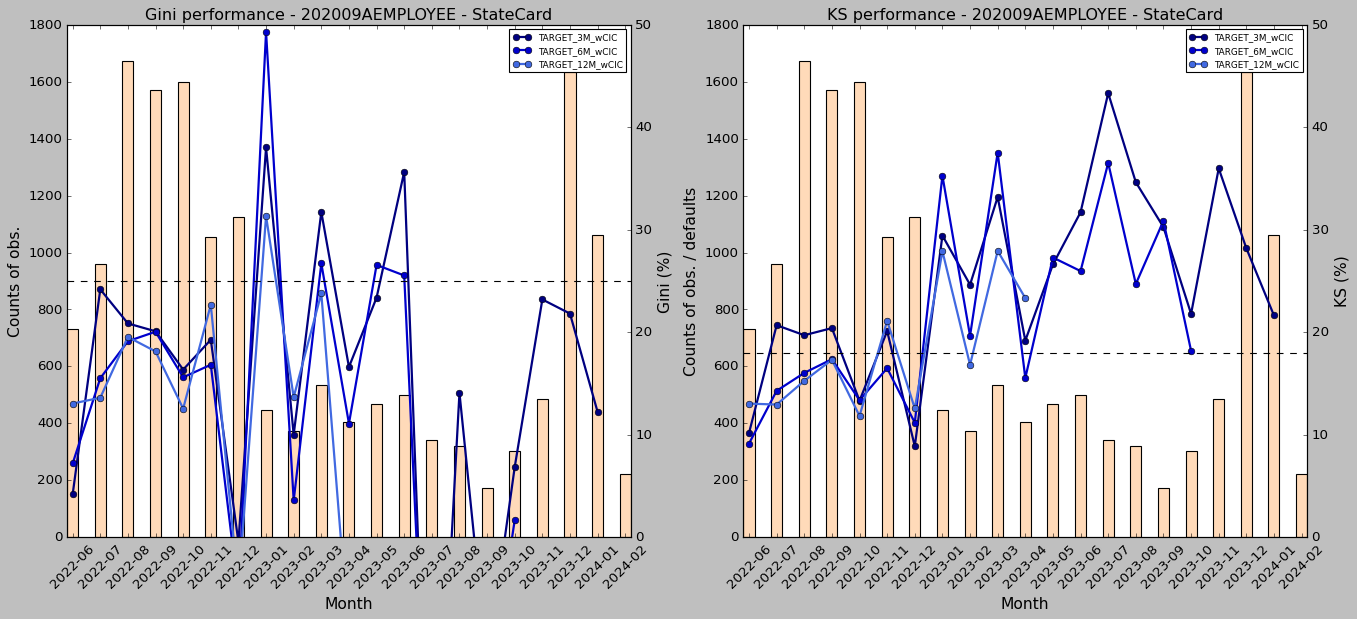

In [112]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [113]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

20.929070929070928

#### Stability check (KRI2)

In [114]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean        mr  (-inf, 457.0]  (457.0, 481.0]  \
Received_Month                                                               
2022-06           730  705.602941  0.068493       0.110294             0.0   
2022-07           960  704.531111  0.062500       0.115556             0.0   
2022-08          1673  729.980601  0.044830       0.086358             0.0   
2022-09          1573  726.109699  0.049587       0.086957             0.0   
2022-10          1600  670.566967  0.099375       0.151284             0.0   
2022-11          1056  651.110403  0.107955       0.174098             0.0   
2022-12          1126  698.536489  0.099467       0.118343             0.0   
2023-01           446  716.013477  0.168161       0.097035             0.0   
2023-02           373  669.076046  0.294906       0.144487             0.0   
2023-03           533  660.037783  0.255159       0.153652             0.0   
2023-04           404  681.346278  0.235149       0.129450             0.0   
2023-05           467  664.695055  0.220557       0.159341             0.0   
2023-06           498  668.046243  0.305221       0.156069             0.0   
2023-07           342  656.351695  0.309942       0.169492             0.0   
2023-08           321  694.575893  0.302181       0.125000             0.0   
2023-09           172  617.658730  0.267442       0.222222             0.0   
2023-10           301  675.958716  0.275748       0.151376             0.0   
2023-11           487  683.570997  0.320329       0.145015             0.0   
2023-12          1634  759.404255  0.165851       0.054292             0.0   
2024-01          1061  748.653179  0.184731       0.063584             0.0   
2024-02           222  715.539773  0.207207       0.113636             0.0   

                (481.0, 505.0]  (505.0, 529.0]  (529.0, 553.0]  \
Received_Month                                                   
2022-06                    0.0             0.0             0.0   
2022-07                    0.0             0.0             0.0   
2022-08                    0.0             0.0             0.0   
2022-09                    0.0             0.0             0.0   
2022-10                    0.0             0.0             0.0   
2022-11                    0.0             0.0             0.0   
2022-12                    0.0             0.0             0.0   
2023-01                    0.0             0.0             0.0   
2023-02                    0.0             0.0             0.0   
2023-03                    0.0             0.0             0.0   
2023-04                    0.0             0.0             0.0   
2023-05                    0.0             0.0             0.0   
2023-06                    0.0             0.0             0.0   
2023-07                    0.0             0.0             0.0   
2023-08                    0.0             0.0             0.0   
2023-09                    0.0             0.0             0.0   
2023-10                    0.0             0.0             0.0   
2023-11                    0.0             0.0             0.0   
2023-12                    0.0             0.0             0.0   
2024-01                    0.0             0.0             0.0   
2024-02                    0.0             0.0             0.0   

                (553.0, 577.0]  (577.0, 601.0]  (601.0, 625.0]  \
Received_Month                                                   
2022-06                    0.0             0.0             0.0   
2022-07                    0.0             0.0             0.0   
2022-08                    0.0             0.0             0.0   
2022-09                    0.0             0.0             0.0   
2022-10                    0.0             0.0             0.0   
2022-11                    0.0             0.0             0.0   
2022-12                    0.0             0.0             0.0   
2023-01                    0.0             0.0             0.0   
2023-02                    0.0            

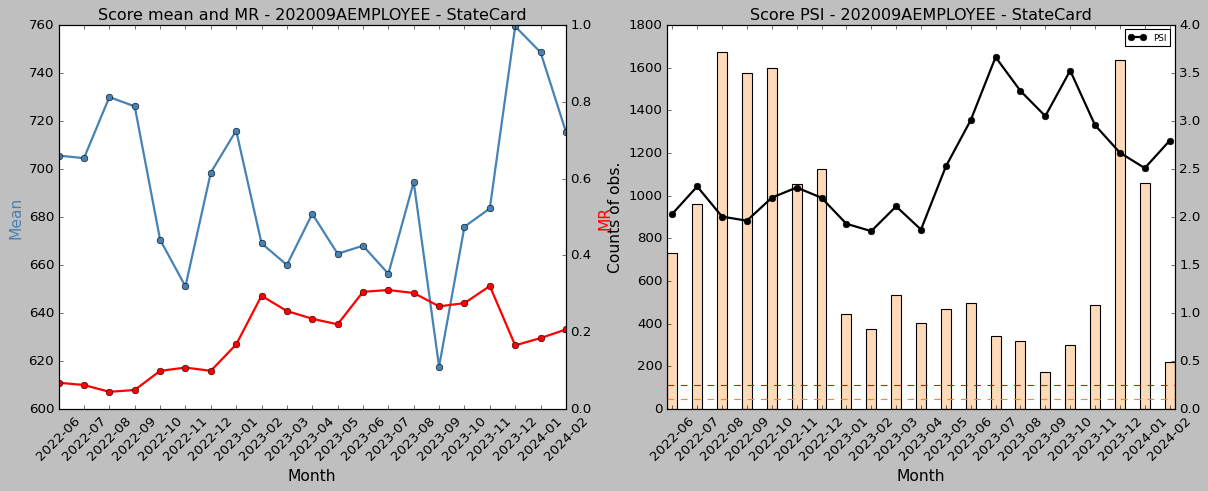

In [115]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [116]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-06           730             460                1          431.0   
2022-07           960             618                0          580.0   
2022-08          1673            1150                6         1016.0   
2022-09          1573            1062                5          930.0   
2022-10          1600             894                2          784.0   
2022-11          1056             511                3          466.0   
2022-12          1126             661                0          541.0   
2023-01           446             217                0          166.0   
2023-02           373              97                1           78.0   
2023-03           533             171                0          143.0   
2023-04           404             138                1          124.0   
2023-05           467             148                0          135.0   
2023-06           498             144                0          119.0   
2023-07           342             105                0           85.0   
2023-08           321             100                0           76.0   
2023-09           172              47                0           42.0   
2023-10           301             109                0           84.0   
2023-11           487             170                0          155.0   
2023-12          1634            1023                0          541.0   
2024-01          1061             639                0          347.0   
2024-02           222             100                0           20.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-06                      431.0            38.0        8.0          8.0   
2022-07                      580.0            51.0       13.0         12.0   
2022-08                     1016.0            69.0       11.0          7.0   
2022-09                      930.0            81.0        8.0          7.0   
2022-10                      784.0            73.0       12.0         11.0   
2022-11                      466.0            48.0       14.0         13.0   
2022-12                      541.0            31.0        5.0          4.0   
2023-01                      166.0            12.0        3.0          3.0   
2023-02                       78.0             8.0        5.0          5.0   
2023-03                      143.0            12.0        4.0          4.0   
2023-04                      124.0            17.0        4.0          3.0   
2023-05                      135.0            14.0        6.0          6.0   
2023-06                      119.0             9.0        2.0          2.0   
2023-07                       85.0             8.0        2.0          2.0   
2023-08                       76.0             5.0        3.0          3.0   
2023-09                       42.0             4.0        0.0          0.0   
2023-10                       84.0             6.0        1.0          1.0   
2023-11                      155.0             5.0        1.0          1.0   
2023-12                      541.0            19.0        1.0          1.0   
2024-01                      345.0            16.0        3.0          3.0   
2024-02                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-06                 433.0               433.0            24.0        3.0   
2022-07                 587.0               587.0            37.0        5.0   
2022-08                1030.0              1030.0            50.0        5.0   
2022-09                 945.0               945.0            54.0        5.0   
2022-10                 802.0               802.0            

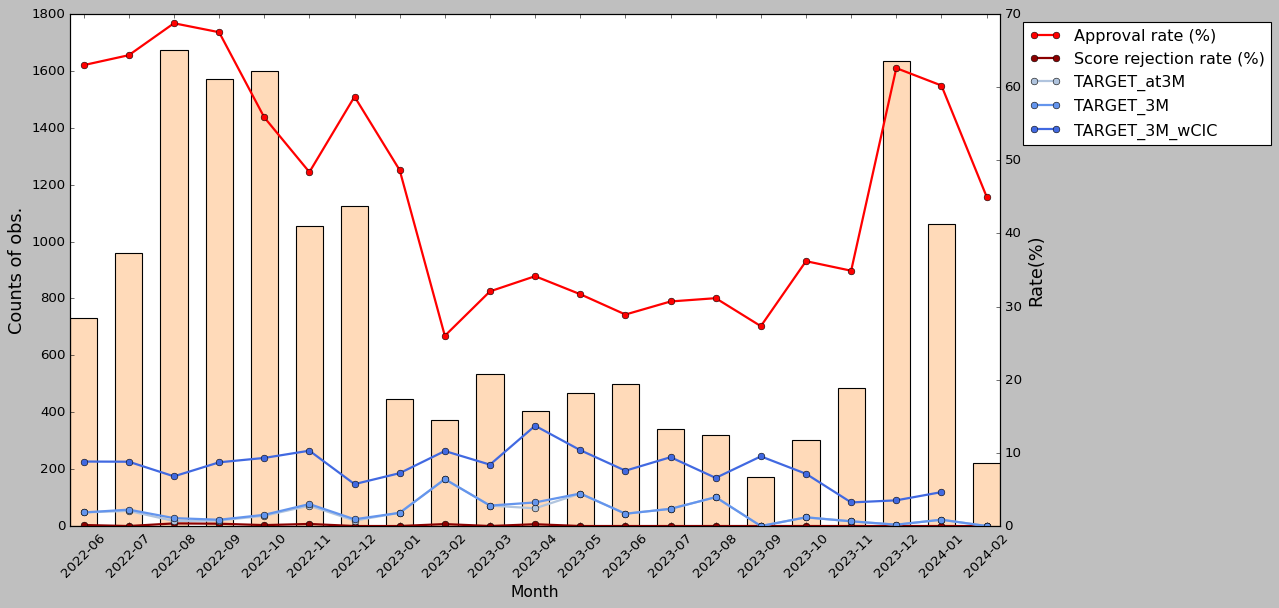

In [117]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [118]:
# sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

In [119]:
# sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [120]:
# score_monitoring_segments.append(sc_monitoring_segment)

## ASTAT122023

### StateCard

#### Performance check (KRI1)

In [121]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'ASTAT122023',
    score_type_filter = '14. ASTAT122023',
    product_segment = 'StateCard',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/astat112023.csv',
    sc_script_score_colname = 'SC_ASTAT112023',
    warnings = []
)

In [122]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                           
2024-03          566.0  738.042222                 0.0             0.0   
2024-04          530.0  713.334129                 0.0             0.0   
All             1096.0  477.583242                 0.0             0.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                             NaN                NaN                 0.0   

                TARGET_6M_wCIC  Gini TARGET_6M_wCIC  KS TARGET_6M_wCIC  \
Received_Month                                                           
2024-03                    0.0                  NaN                NaN   
2024-04                    0.0                  NaN                NaN   
All                        0.0                  NaN                NaN   

                TARGET_12M_wCIC_OBS  TARGET_12M_wCIC  Gini TARGET_12M_wCIC  \
Received_Month                                                               
2024-03                         0.0              0.0                   NaN   
2024-04                         0.0              0.0                   NaN   
All                             0.0              0.0                   NaN   

                KS TARGET_12M_wCIC  
Received_Month                      
2024-03                        NaN  
2024-04                        NaN  
All                            NaN

In [123]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

No data to display!


In [124]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

nan

#### Stability check (KRI2)

In [125]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean        mr  (-inf, 620.0]  (620.0, 632.0]  \
Received_Month                                                               
2024-03           566  738.042222  0.204947       0.075556        0.015556   
2024-04           530  713.334129  0.209434       0.100239        0.007160   

                (632.0, 644.0]  (644.0, 656.0]  (656.0, 668.0]  \
Received_Month                                                   
2024-03               0.002222        0.013333        0.008889   
2024-04               0.002387        0.009547        0.011933   

                (668.0, 681.0]  (681.0, 693.0]  (693.0, 705.0]  \
Received_Month                                                   
2024-03               0.017778        0.022222        0.022222   
2024-04               0.026253        0.019093        0.033413   

                (705.0, 717.0]  (717.0, 730.0]  (730.0, 742.0]  \
Received_Month                                                   
2024-03               0.013333        0.040000        0.017778   
2024-04               0.014320        0.042959        0.031026   

                (742.0, 754.0]  (754.0, 766.0]  (766.0, 778.0]  \
Received_Month                                                   
2024-03               0.020000        0.044444        0.017778   
2024-04               0.047733        0.033413        0.019093   

                (778.0, 791.0]  (791.0, 803.0]  (803.0, 815.0]  \
Received_Month                                                   
2024-03               0.033333        0.077778        0.037778   
2024-04               0.050119        0.047733        0.054893   

                (815.0, 827.0]  (827.0, 840.0]  (840.0, inf]       PSI  
Received_Month                                                          
2024-03               0.193333        0.004444      0.322222  0.772151  
2024-04               0.219570        0.007160      0.221957  0.659849

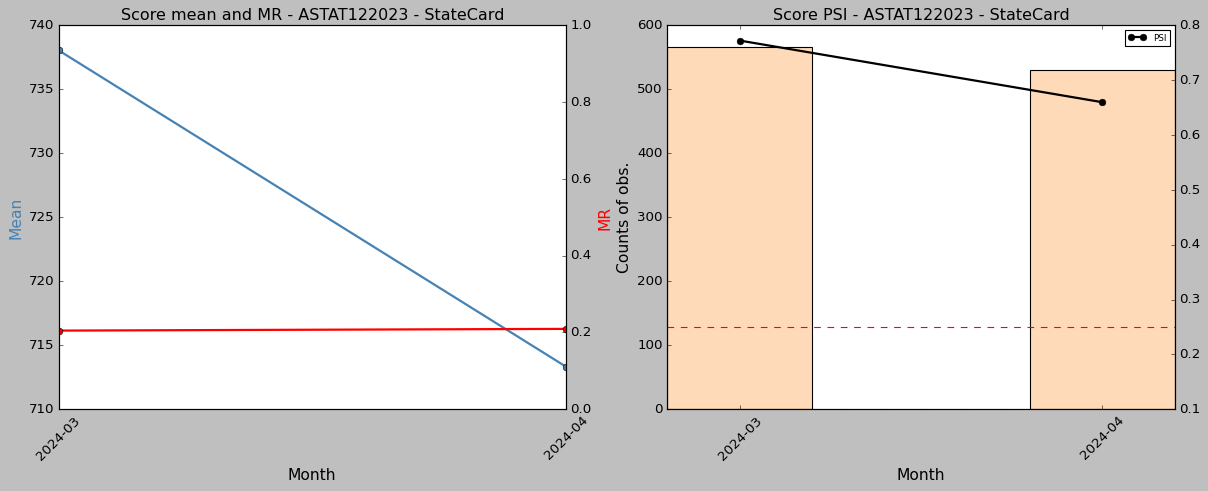

In [126]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [127]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2024-03           566             278               16            0.0   
2024-04           530             246               11            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2024-03                  45.0                 0.0             0.0        0.0   
2024-04                   0.0                 0.0             0.0        0.0   

                TARGET_at2M         AR  SCORE_REJECT  DR_TARGET_3M_wCIC  \
Received_Month                                                            
2024-03                 0.0  49.116608      2.826855                NaN   
2024-04                 0.0  46.415094      2.075472                NaN   

                DR_TARGET_3M  DR_TARGET_at3M  DR_TARGET_2M_wCIC  DR_TARGET_2M  \
Received_Month                                                                  
2024-03                  NaN             NaN                NaN           0.0   
2024-04                  NaN             NaN                NaN           NaN   

                DR_TARGET_at2M  
Received_Month                  
2024-03                    0.0  
2024-04                    NaN

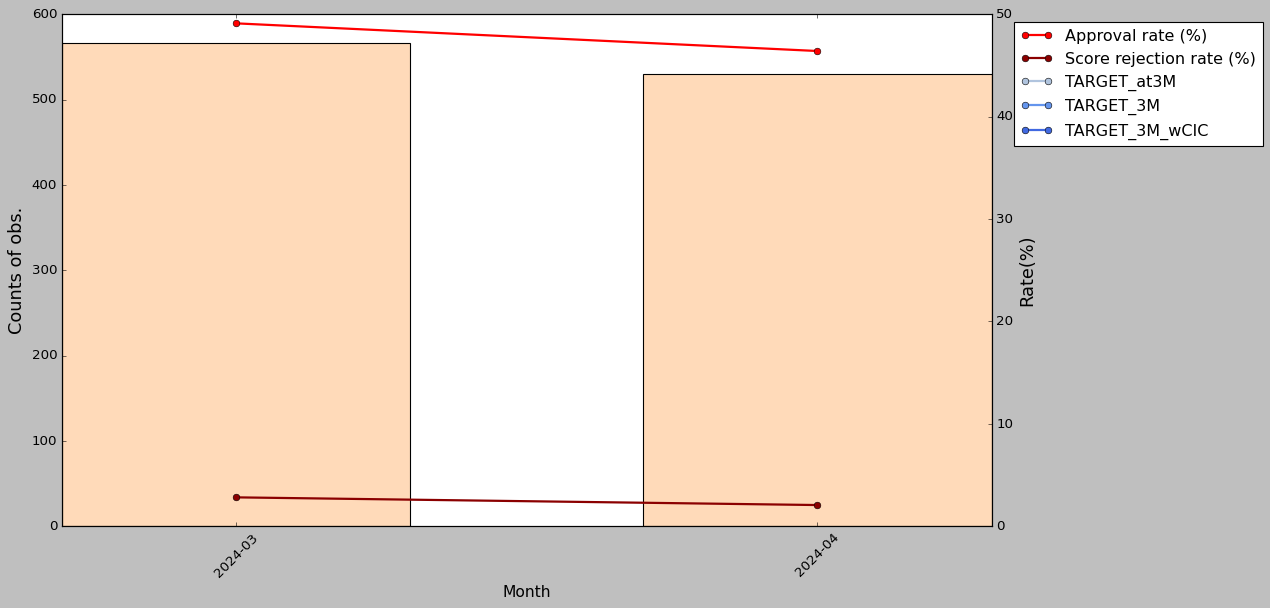

In [128]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [129]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2024-03           416             278               16     798.362981   
2024-04           378             246               11     790.706349   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2024-03                795.500000       2.862981              15   
2024-04                789.275862       1.546419              12   

                Mismatch_rate  
Received_Month                 
2024-03              3.605769  
2024-04              3.174603

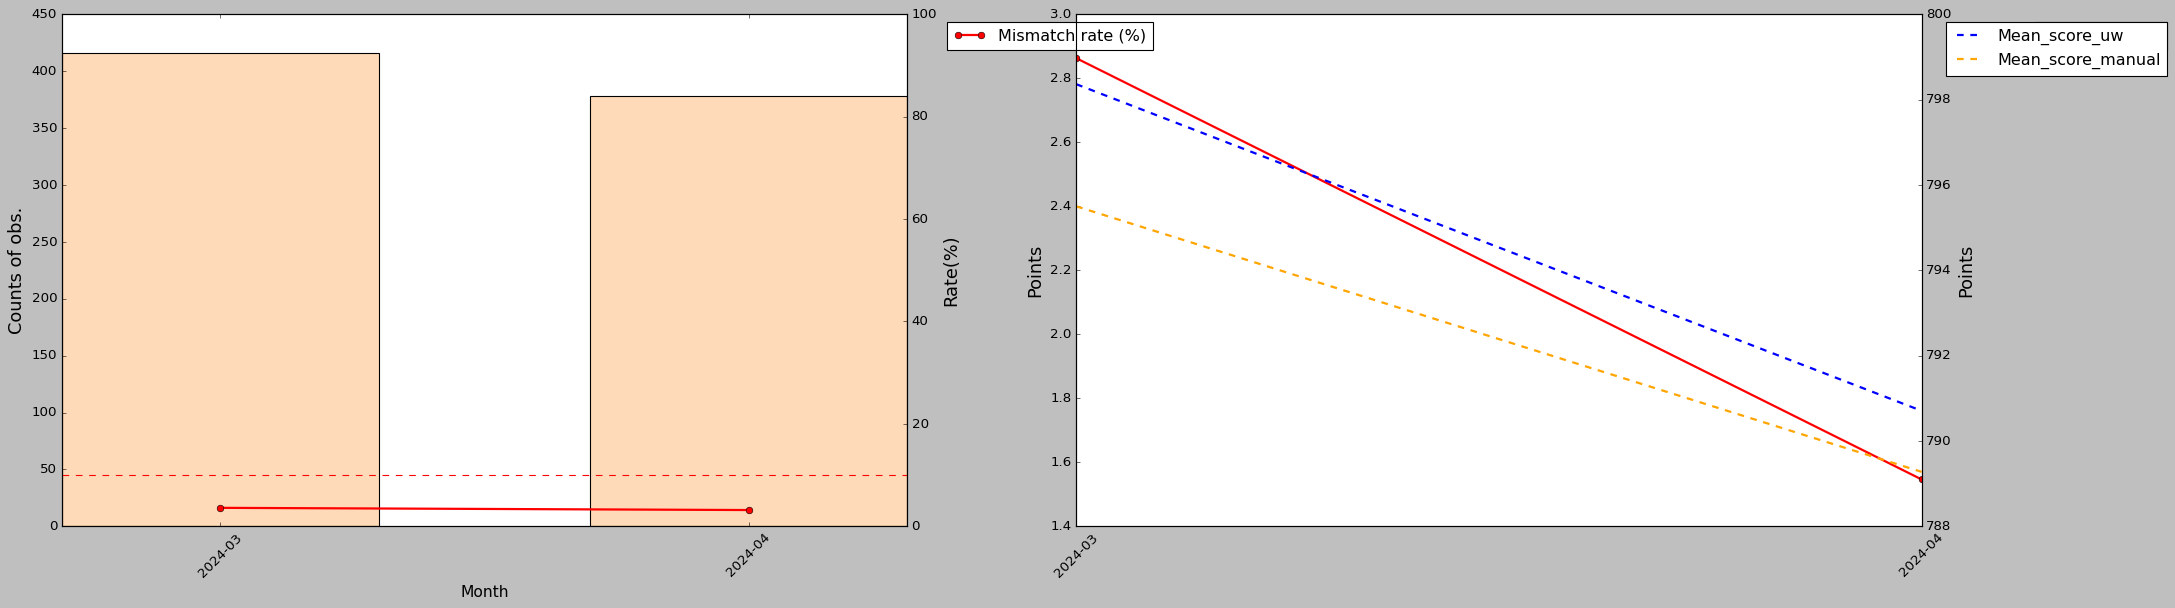

In [130]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [131]:
score_monitoring_segments.append(sc_monitoring_segment)

##  ASTUD122022	

### StudentsCard

#### Performance check (KRI1)

In [132]:
sc_monitoring_segment = ScoreMonitoringSegment(
    name = 'ASTUD122022',
    score_type_filter = '13. ASTUD122022',
    product_segment = 'StudentsCard',
    sc_script_data_path = 'D:/Tan/3. Reports/Data/Scoring script data/astud122022.csv',
    sc_script_score_colname = 'SC_STUD122022',
    warnings = []
)

In [133]:
tbl = sc_monitoring_segment.performance_check_table(targets, sc_monitoring_segment.product_segment)

tbl

count        mean  TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  \
Received_Month                                                            
2022-12             1.0         NaN                 0.0             0.0   
2023-02             7.0  615.333333                 2.0             1.0   
2023-03          1650.0  761.068729               516.0            35.0   
2023-04          1966.0  762.170667               554.0            33.0   
2023-05          1987.0  761.375936               615.0            59.0   
2023-06          1703.0  763.588162               522.0            43.0   
2023-07          1228.0  765.305983               382.0            41.0   
2023-08          1141.0  761.153425               220.0             6.0   
2023-09          1025.0  763.989848               193.0             6.0   
2023-10          1674.0  768.930512               382.0            21.0   
2023-11          2356.0  779.873661               749.0            65.0   
2023-12          2773.0  777.097103              1023.0            58.0   
2024-01          2847.0  767.892050              1017.0            53.0   
2024-02           957.0  773.436409                 0.0             0.0   
2024-03          1986.0  769.723077                 0.0             0.0   
2024-04          1842.0  757.547633                 0.0             0.0   
All             25143.0  477.583242              6175.0           421.0   

                Gini TARGET_3M_wCIC  KS TARGET_3M_wCIC  TARGET_6M_wCIC_OBS  \
Received_Month                                                               
2022-12                         NaN                NaN                 0.0   
2023-02                  100.000000         100.000000                 2.0   
2023-03                   34.434214          29.189189               505.0   
2023-04                   14.593148          18.873960               544.0   
2023-05                   21.183392          20.973052               605.0   
2023-06                   14.152546          12.496966               516.0   
2023-07                   21.135827          19.812603               372.0   
2023-08                   -1.479751          17.445483               209.0   
2023-09                   60.695187          61.942959               182.0   
2023-10                    5.487403          10.130590               347.0   
2023-11                   17.420153          15.814215                 0.0   
2023-12                   26.258710          25.477935                 0.0   
2024-01                   16.172786          18.721131                 0.0   
2024-02                         NaN                NaN                 0.0   
2024-03                         NaN                NaN                 0.0   
2024-04                         NaN                NaN                 0.0   
All                       20.671523          16.768052              3282.0   

                TARGET_6M_wCIC  Gini TARGET_6M_wCIC  KS TARGET_6M_wCIC  \
Received_Month                                                           
2022-12                    0.0                  NaN                NaN   
2023-02                    1.0           100.000000         100.000000   
2023-03                   67.0            28.409323          23.018469   
2023-04                   64.0            22.779948          20.729167   
2023-05                   94.0            22.265479          19.392514   
2023-06                   71.0             4.779237           7.178351   
2023-07                   71.0            22.263815          19.554537   
2023-08                   12.0            -0.253807          12.267343   
2023-09                   18.0            21.714092          17.479675   
2023-10                   36.0             6.672026           9.708825   
2023-11                    0.0                  NaN                NaN   
2023-12                    0.0                  NaN                NaN   
2024-01                    0.0                  NaN                NaN   

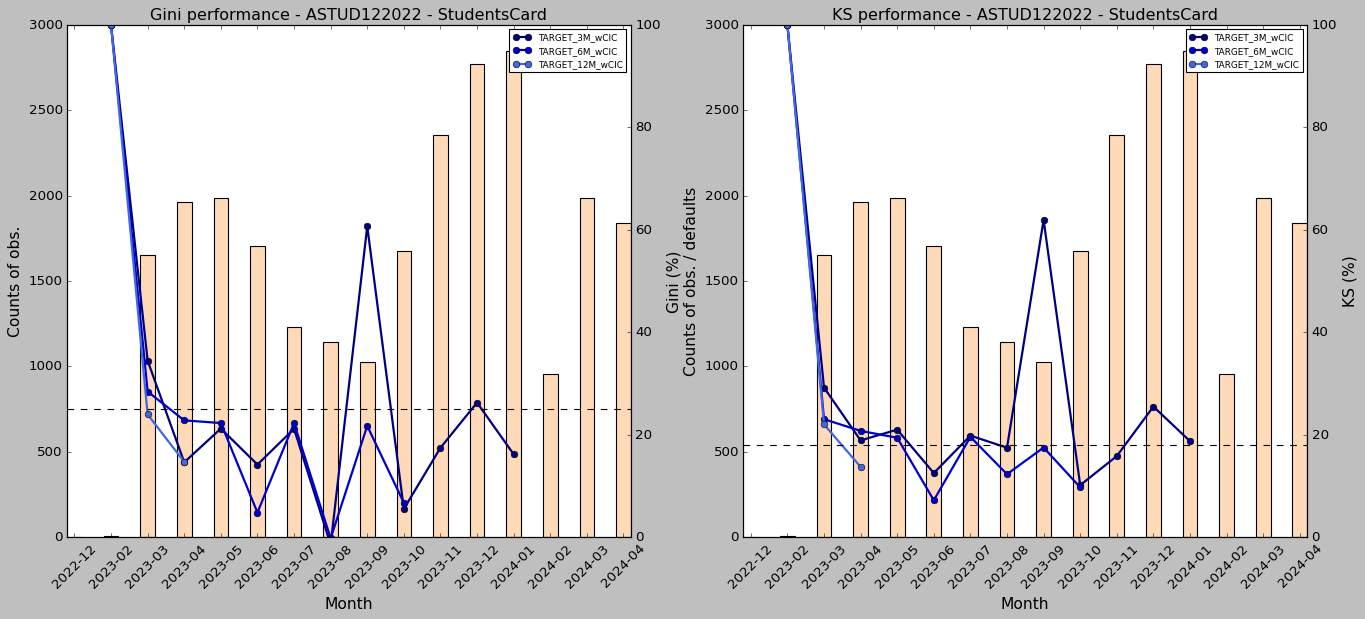

In [134]:
sc_monitoring_segment.performance_check_visualize(targets, sc_monitoring_segment.product_segment)

In [135]:
KS_last_three_months = sc_monitoring_segment.KS_last_three_months(kri_target, sc_monitoring_segment.product_segment)

if KS_last_three_months < KS_threshold:
    sc_monitoring_segment.warnings.append('KRI1')
    
KS_last_three_months

16.960868733256792

#### Stability check (KRI2)

In [136]:
tbl = sc_monitoring_segment.stability_score_table(sc_monitoring_segment.product_segment)

if tbl.loc[tbl.index[-1], 'PSI'] > PSI_threshold:
    sc_monitoring_segment.warnings.append('KRI2')
    
tbl

count        mean        mr  (-inf, 645.0]  (645.0, 657.0]  \
Received_Month                                                               
2022-12             1         NaN  1.000000            NaN             NaN   
2023-02             7  615.333333  0.142857       0.166667        0.000000   
2023-03          1650  761.068729  0.118182       0.022680        0.010997   
2023-04          1966  762.170667  0.046287       0.017600        0.005867   
2023-05          1987  761.375936  0.058883       0.015508        0.012834   
2023-06          1703  763.588162  0.057546       0.019938        0.010592   
2023-07          1228  765.305983  0.047231       0.021368        0.000855   
2023-08          1141  761.153425  0.040316       0.018265        0.000000   
2023-09          1025  763.989848  0.039024       0.016244        0.001015   
2023-10          1674  768.930512  0.054361       0.016425        0.013266   
2023-11          2356  779.873661  0.049236       0.010714        0.010714   
2023-12          2773  777.097103  0.078976       0.014487        0.006656   
2024-01          2847  767.892050  0.098700       0.014419        0.009743   
2024-02           957  773.436409  0.161964       0.004988        0.013716   
2024-03          1986  769.723077  0.116314       0.020513        0.004558   
2024-04          1842  757.547633  0.071118       0.027469        0.006429   

                (657.0, 668.0]  (668.0, 680.0]  (680.0, 692.0]  \
Received_Month                                                   
2022-12                    NaN             NaN             NaN   
2023-02               0.000000        0.000000        0.000000   
2023-03               0.007560        0.013746        0.039863   
2023-04               0.009067        0.019733        0.033600   
2023-05               0.007487        0.014973        0.035294   
2023-06               0.011838        0.020561        0.031153   
2023-07               0.000000        0.006838        0.021368   
2023-08               0.000000        0.004566        0.032877   
2023-09               0.001015        0.012183        0.032487   
2023-10               0.005054        0.025900        0.027795   
2023-11               0.005804        0.013393        0.021429   
2023-12               0.005873        0.019186        0.023884   
2024-01               0.007405        0.022214        0.026111   
2024-02               0.006234        0.019950        0.039900   
2024-03               0.005698        0.013105        0.023362   
2024-04               0.006429        0.027469        0.028054   

                (692.0, 703.0]  (703.0, 715.0]  (715.0, 726.0]  \
Received_Month                                                   
2022-12                    NaN             NaN             NaN   
2023-02               0.333333        0.000000        0.166667   
2023-03               0.028179        0.044674        0.041237   
2023-04               0.040533        0.043733        0.034667   
2023-05               0.043316        0.036364        0.040107   
2023-06               0.034268        0.036760        0.043614   
2023-07               0.036752        0.047863        0.040171   
2023-08               0.044749        0.055708        0.059361   
2023-09               0.040609        0.054822        0.056853   
2023-10               0.024637        0.032849        0.038534   
2023-11               0.020089        0.035714        0.028125   
2023-12               0.023101        0.030149        0.031323   
2024-01               0.030008        0.035853        0.034295   
2024-02               0.033666        0.027431        0.043641   
2024-03               0.033618        0.045014        0.038177   
2024-04               0.037989        0.050263        0.047925   

                (726.0, 738.0]  (738.0, 750.0]  (750.0, 761.0]  \
Received_Month                                                   
2022-12                    NaN             NaN             NaN   
2023-02               0.000000     

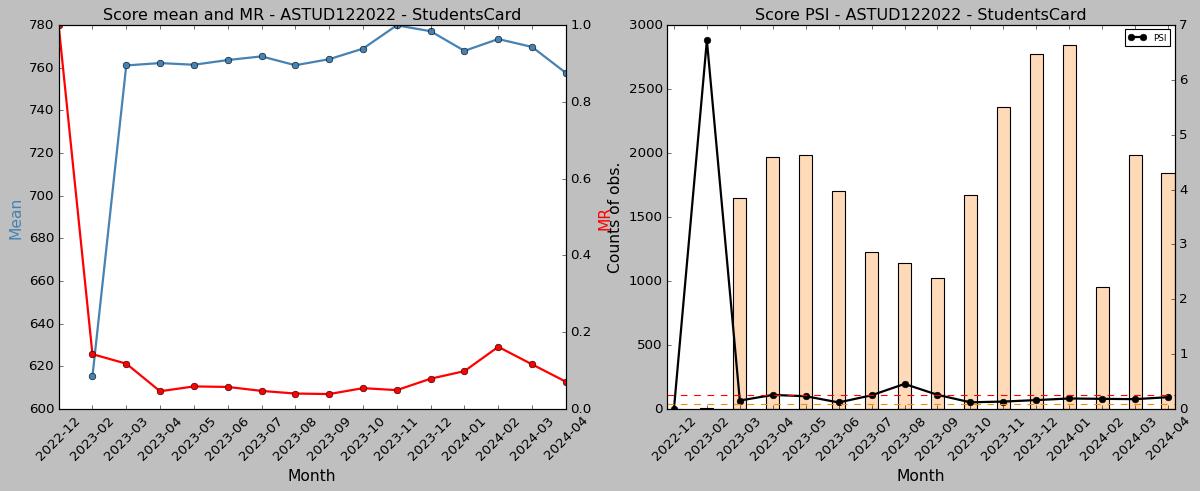

In [137]:
sc_monitoring_segment.stability_score_visualize(sc_monitoring_segment.product_segment)

#### AR and score rejection rate

In [138]:
tbl = sc_monitoring_segment.ar_score_rejection_table(sc_monitoring_segment.product_segment)

    
tbl

Count  Count_approved  Count_score_rej  TARGET_3M_OBS  \
Received_Month                                                          
2022-12             1               0                0            0.0   
2023-02             7               2                1            2.0   
2023-03          1650             535              192          516.0   
2023-04          1966             583              403          554.0   
2023-05          1987             655              423          615.0   
2023-06          1703             561              364          522.0   
2023-07          1228             405              259          382.0   
2023-08          1141             240              297          220.0   
2023-09          1025             213              239          193.0   
2023-10          1674             440              316          382.0   
2023-11          2356             819              371          749.0   
2023-12          2773            1190              449         1023.0   
2024-01          2847            1173              544         1031.0   
2024-02           957             336              184           81.0   
2024-03          1986             775              371            0.0   
2024-04          1842             659              433            0.0   

                TARGET_3M_wCIC_OBS  TARGET_3M_wCIC  TARGET_3M  TARGET_at3M  \
Received_Month                                                               
2022-12                        0.0             0.0        0.0          0.0   
2023-02                        2.0             1.0        0.0          0.0   
2023-03                      516.0            35.0       22.0         22.0   
2023-04                      554.0            33.0       22.0         19.0   
2023-05                      615.0            59.0       40.0         35.0   
2023-06                      522.0            43.0       23.0         22.0   
2023-07                      382.0            41.0       22.0         21.0   
2023-08                      220.0             6.0        3.0          3.0   
2023-09                      193.0             6.0        4.0          3.0   
2023-10                      382.0            21.0       12.0          9.0   
2023-11                      749.0            65.0       31.0         27.0   
2023-12                     1023.0            58.0       36.0         32.0   
2024-01                     1017.0            53.0       38.0         34.0   
2024-02                        0.0             0.0        1.0          1.0   
2024-03                        0.0             0.0        0.0          0.0   
2024-04                        0.0             0.0        0.0          0.0   

                TARGET_2M_OBS  TARGET_2M_wCIC_OBS  TARGET_2M_wCIC  TARGET_2M  \
Received_Month                                                                 
2022-12                   0.0                 0.0             0.0        0.0   
2023-02                   2.0                 2.0             1.0        0.0   
2023-03                 520.0               520.0            28.0       15.0   
2023-04                 564.0               564.0            23.0       14.0   
2023-05                 623.0               623.0            36.0       24.0   
2023-06                 533.0               533.0            25.0       13.0   
2023-07                 385.0               385.0            27.0       11.0   
2023-08                 223.0               223.0             5.0        3.0   
2023-09                 200.0               200.0             4.0        2.0   
2023-10                 414.0               414.0            11.0        7.0   
2023-11                 762.0               762.0            25.0       10.0   
2023-12                1060.0              1060.0            39.0       20.0   
2024-01                1051.0              1051.0            30.0       22.0   
2024-02                 295.0               284.0            12.0       11.0   
2024-03         

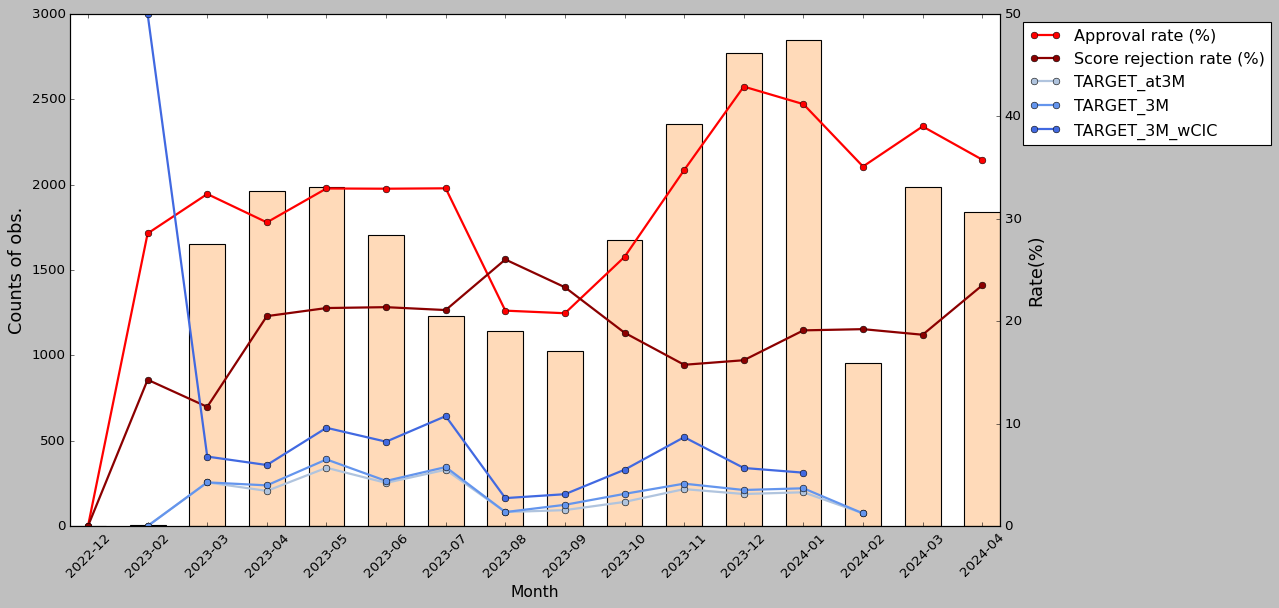

In [139]:
sc_monitoring_segment.ar_score_rejection_visualize(sc_monitoring_segment.product_segment)

#### Mismatch rate

In [140]:
sc_monitoring_segment.mismatch_rate_table(sc_monitoring_segment.product_segment)

Count  Count_approved  Count_score_rej  Mean_score_uw  \
Received_Month                                                          
2023-02             5               2                1     738.400000   
2023-03          1430             534              192     774.367832   
2023-04          1854             583              403     770.803668   
2023-05          1851             655              423     769.191248   
2023-06          1582             561              364     774.689633   
2023-07          1148             405              259     779.972125   
2023-08          1075             240              297     775.314419   
2023-09           970             213              239     775.804124   
2023-10          1562             440              316     779.268246   
2023-11          2221             819              371     786.545250   
2023-12          2529            1190              449     784.778964   
2024-01          2544            1173              544     774.532626   
2024-02           799             336              184     776.340426   
2024-03          1735             775              371     778.595965   
2024-04          1681             659              433     771.067222   

                Mean_score_manual  Mean_mismatch  Count_mismatch  \
Received_Month                                                     
2023-02                738.400000       0.000000               0   
2023-03                774.806993       2.351049             131   
2023-04                775.521036       6.495146             531   
2023-05                774.457050       7.210697             582   
2023-06                779.202908       5.993679             418   
2023-07                780.141986       1.706446              67   
2023-08                776.846512       2.938605             125   
2023-09                775.811340       2.225773              59   
2023-10                778.975032       1.970551              90   
2023-11                785.369653       2.544349             135   
2023-12                785.007513       1.865560             151   
2024-01                774.851415       1.759827             163   
2024-02                776.518148       1.782228              45   
2024-03                778.897983       1.931988             108   
2024-04                771.233992       1.581089              97   

                Mismatch_rate  
Received_Month                 
2023-02              0.000000  
2023-03              9.160839  
2023-04             28.640777  
2023-05             31.442464  
2023-06             26.422250  
2023-07              5.836237  
2023-08             11.627907  
2023-09              6.082474  
2023-10              5.761844  
2023-11              6.078343  
2023-12              5.970739  
2024-01              6.407233  
2024-02              5.632040  
2024-03              6.224784  
2024-04              5.770375

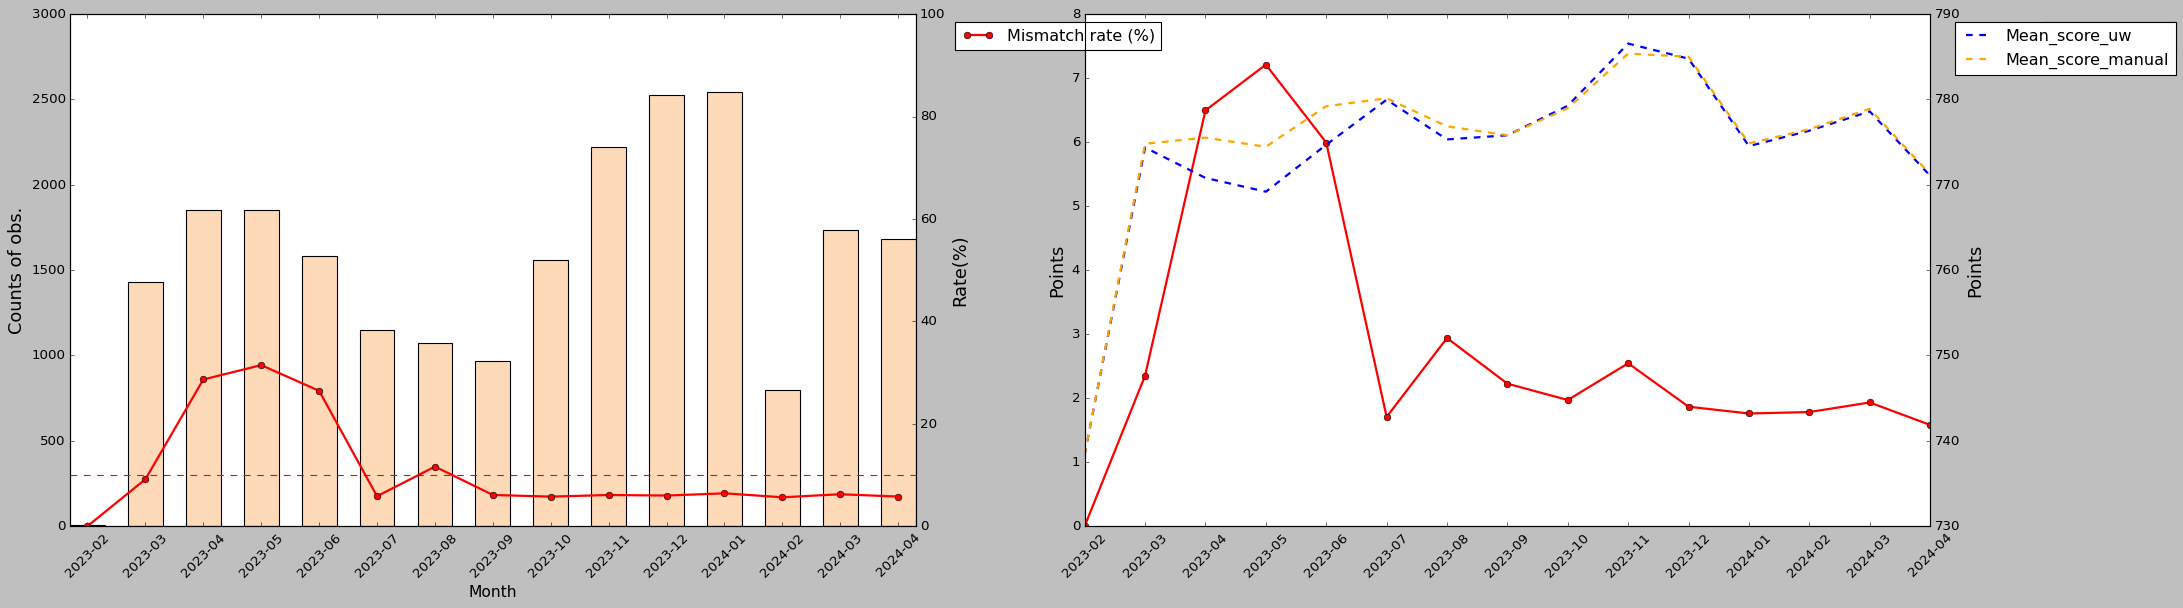

In [141]:
sc_monitoring_segment.mismatch_rate_visualize(sc_monitoring_segment.product_segment)

In [142]:
score_monitoring_segments.append(sc_monitoring_segment)

# KRI1 (Share of production scored by scorecards having KS indicator <= 18%)

In [143]:
monthly_shares = prepare_df(df,
                            index = ['Received_Month', 'Score_Type', 'Card_type_group'],
                            include_NS = False)

In [144]:
kri1 = 0.0
current_month = monthly_shares['Received_Month'].max()

for segment in score_monitoring_segments:
    if 'KRI1' in segment.warnings:
        if segment.product_segment is None:
            print(segment.score_type_filter)
            kri1 += monthly_shares[
                (monthly_shares['Received_Month'] == current_month)
                & (monthly_shares['Score_Type'] == segment.score_type_filter)
            ]['Monthly share'].sum()
        else:
            print(segment.score_type_filter + ', ' + segment.product_segment)
            kri1 += monthly_shares[
                (monthly_shares['Received_Month'] == current_month) 
                & (monthly_shares['Score_Type'] == segment.score_type_filter)
                & (monthly_shares['Card_type_group'] == segment.product_segment)
            ]['Monthly share'].sum()
            

13. ASTUD122022, StudentsCard


In [145]:
print('KRI 1: Share of production scored by scorecards having KS indicator <= 18%')
print('Number of applications scored by scorecards having KS <= 18% / Total number of scored applications')
print('')
print(kri1)

KRI 1: Share of production scored by scorecards having KS indicator <= 18%
Number of applications scored by scorecards having KS <= 18% / Total number of scored applications

52.28


# KRI2 (Share of production scored by scorecards having PSI > 0.25)

In [146]:
kri2 = 0.0
current_month = monthly_shares['Received_Month'].max()

for segment in score_monitoring_segments:
    if 'KRI2' in segment.warnings:
        if segment.product_segment is None:
            print(segment.score_type_filter)
            kri2 += monthly_shares[
                (monthly_shares['Received_Month'] == current_month)
                & (monthly_shares['Score_Type'] == segment.score_type_filter)
            ]['Monthly share'].sum()
        else:
            print(segment.score_type_filter + ', ' + segment.product_segment)
            kri2 += monthly_shares[
                (monthly_shares['Received_Month'] == current_month) 
                & (monthly_shares['Score_Type'] == segment.score_type_filter)
                & (monthly_shares['Card_type_group'] == segment.product_segment)
            ]['Monthly share'].sum()
            

14. ASTAT122023, StateCard


In [147]:
print('KRI 2: Share of production scored by scorecards having PSI > 0.25')
print('Number of applications scored by scorecards having PSI > 0.25 / Total number of scored applications')
print('')
print(kri2)

KRI 2: Share of production scored by scorecards having PSI > 0.25
Number of applications scored by scorecards having PSI > 0.25 / Total number of scored applications

15.04


# KRI3 (Coverage of internal scorecards)

In [148]:
current_month = monthly_shares['Received_Month'].max()

In [149]:
internal_scorecards = ['5. 202009AEMPLOYEE', '6. SEP2020HOUSE', '7. LiteCard', '11. AX062022', '12. AN062022', '13. ASTUD122022', '14. ASTAT122023']

In [150]:
tbl = pd.pivot_table(monthly_shares[monthly_shares['Score_Type'].isin(internal_scorecards)], index='Received_Month', values='Monthly share', aggfunc='sum').reset_index()

In [151]:
print('KRI 3: Coverage of internal scorecards')
print('Number of applications scored by internally developed scorecards / Total number of applications that reach scoring stage')
print('')
print(tbl.loc[tbl['Received_Month'] == current_month, 'Monthly share'].sum())

KRI 3: Coverage of internal scorecards
Number of applications scored by internally developed scorecards / Total number of applications that reach scoring stage

88.07


In [152]:
tbl

Received_Month  Monthly share
0         2022-06          16.16
1         2022-07          40.70
2         2022-08          49.04
3         2022-09          47.84
4         2022-10          50.38
5         2022-11          45.97
6         2022-12          44.23
7         2023-01          37.63
8         2023-02          37.52
9         2023-03          77.55
10        2023-04          82.21
11        2023-05          77.71
12        2023-06          77.69
13        2023-07          79.03
14        2023-08          82.47
15        2023-09          83.22
16        2023-10          83.79
17        2023-11          84.00
18        2023-12          86.46
19        2024-01          86.42
20        2024-02          88.16
21        2024-03          90.06
22        2024-04          88.07

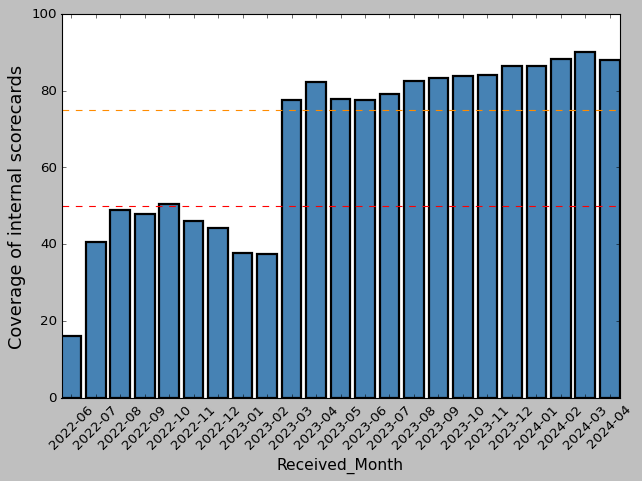

In [153]:
import matplotlib.pyplot as plt
import math

plt.style.use('classic')
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

ax.bar(tbl['Received_Month'], tbl['Monthly share'], color='steelblue', linewidth=2)
ax.set_xticks(tbl['Received_Month'])
ax.set_xticklabels(tbl['Received_Month'], rotation = 45)
ax.set_xlabel('Received_Month', fontsize=14)
ax.set_ylabel('Coverage of internal scorecards', fontsize=16)
ax.axhline(y = 75, color = 'darkorange', linestyle = 'dashed')
ax.axhline(y = 50, color = 'r', linestyle = 'dashed')
ax.set_ylim([0,100])

plt.show()